#**Introduction**
The intersection of mental health and the tech industry presents a complex puzzle, rife with unique challenges and opportunities. This comprehensive report brings together insights from three detailed data science assignments, each offering a distinct perspective on this pressing issue. The objective is to harness diverse data science methodologies – encompassing data cleaning, feature selection, automated machine learning (AutoML), and model interpretability – to address the pivotal question: "How can we leverage data science to enhance our understanding and prediction of mental health issues within the tech workplace?"  

**Mental health in Tech**  
*The selected dataset for this data science project centers around the topic of mental health within the technology industry. It includes a wide-ranging assortment of de-identified data concerning mental health issues, their occurrence, and the factors linked to them within the tech sector. This dataset serves as a valuable asset for conducting thorough examinations and extracting knowledge to enhance mental health assistance and overall well-being in the technology workplace.*

**Methodology**  
###**Data Cleaning and Feature Selection**  
- **Data Cleaning:** The process began with a thorough cleaning of the dataset. This included handling missing values through various imputation techniques, normalizing features to ensure uniformity, and detecting and addressing outliers. Specific examples of challenges faced during this phase, such as handling skewed data or dealing with categorical variables, were meticulously documented.
- **Feature Selection:** The selection of features was performed using advanced techniques like Recursive Feature Elimination (RFE) and Random Forest feature importance ranking. This step involved an in-depth analysis of the dataset, evaluating each feature's relevance and impact on the target variable, with examples of how certain features were chosen or discarded.  

###**Automated Machine Learning (AutoML)**  
- **Model Selection and Tuning:** AutoML was employed to navigate the complex process of model selection. This included testing various models, evaluating their performance, and fine-tuning hyperparameters. The report details the selection criteria, the challenges encountered, and the rationale behind choosing specific models.  
- **Handling Multicollinearity and Variable Significance:** A key focus was on addressing multicollinearity issues, especially among dummy variables created from categorical data. The report explains the strategies used to identify and mitigate multicollinearity and assess the statistical significance of predictor variables, with examples illustrating these concepts.  

###**Model Interpretability**  
- **Interpretation Techniques:** The interpretability of models like linear regression, Random Forest, and XGBClassifier was analyzed using SHapley Additive exPlanations (SHAP) analysis. This part of the report delves into the methodology of SHAP, with examples showing how it was applied to each model and what insights were derived.  
- **Comparative Analysis:** An extensive comparative analysis of feature importance across different models was conducted. This section includes detailed examples and visualizations that illustrate how different models prioritize and process features differently.  

Let's start by having a look at each methodologies one-by-one in depth.



##**ML Data Cleaning and Feature Selection**
In this, a dataset is used for predictive learning and check the quality of the data and determine which features are important.


In [ ]:
#Import Libraries
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import io
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [ ]:
#Loading the dataset
df = pd.read_csv("https://raw.githubusercontent.com/Riya-Rajesh-Patil/DataScience/main/survey.csv")

In [ ]:
#Viewing data in the file
df

Timestamp  Age  Gender         Country state self_employed  \
0     2014-08-27 11:29:31   37  Female   United States    IL           NaN   
1     2014-08-27 11:29:37   44       M   United States    IN           NaN   
2     2014-08-27 11:29:44   32    Male          Canada   NaN           NaN   
3     2014-08-27 11:29:46   31    Male  United Kingdom   NaN           NaN   
4     2014-08-27 11:30:22   31    Male   United States    TX           NaN   
...                   ...  ...     ...             ...   ...           ...   
1254  2015-09-12 11:17:21   26    male  United Kingdom   NaN            No   
1255  2015-09-26 01:07:35   32    Male   United States    IL            No   
1256  2015-11-07 12:36:58   34    male   United States    CA            No   
1257  2015-11-30 21:25:06   46       f   United States    NC            No   
1258  2016-02-01 23:04:31   25    Male   United States    IL            No   

     family_history treatment work_interfere    no_employees  ...  \
0                No       Yes          Often            6-25  ...   
1                No        No         Rarely  More than 1000  ...   
2                No        No         Rarely            6-25  ...   
3               Yes       Yes          Often          26-100  ...   
4                No        No          Never         100-500  ...   
...             ...       ...            ...             ...  ...   
1254             No       Yes            NaN          26-100  ...   
1255            Yes       Yes          Often          26-100  ...   
1256            Yes       Yes      Sometimes  More than 1000  ...   
1257             No        No            NaN         100-500  ...   
1258            Yes       Yes      Sometimes          26-100  ...   

                   leave mental_health_consequence phys_health_consequence  \
0          Somewhat easy                        No                      No   
1             Don't know                     Maybe                      No   
2     Somewhat difficult                        No                      No   
3     Somewhat difficult                       Yes                     Yes   
4             Don't know                        No                      No   
...                  ...                       ...                     ...   
1254       Somewhat easy                        No                      No   
1255  Somewhat difficult                        No                      No   
1256  Somewhat difficult                       Yes                     Yes   
1257          Don't know                       Yes                      No   
1258          Don't know                     Maybe                      No   

         coworkers    supervisor mental_health_interview  \
0     Some of them           Yes                      No   
1               No            No                      No   
2              Yes           Yes                     Yes   
3     Some of them            No                   Maybe   
4     Some of them           Yes                     Yes   
...            ...           ...                     ...   
1254  Some of them  Some of them                      No   
1255  Some of them           Yes                      No   
1256            No            No                      No   
1257            No            No                      No   
1258  Some of them            No                      No   

     phys_health_interview mental_vs_physical obs_consequence comments  
0                    Maybe                Yes              No      NaN  
1                       No         Don't know              No      NaN  
2                      Yes                 No              No      NaN  
3                    Maybe                 No             Yes      NaN  
4                      Yes         Don't know              No      NaN  
...                    ...                ...             ...      ...  
1254                    No         Don't know              No      NaN  
1255    

### Q1. What are the data types? (Only numeric and categorical)

In [ ]:
df.dtypes

Timestamp                    object
Age                           int64
Gender                       object
Country                      object
state                        object
self_employed                object
family_history               object
treatment                    object
work_interfere               object
no_employees                 object
remote_work                  object
tech_company                 object
benefits                     object
care_options                 object
wellness_program             object
seek_help                    object
anonymity                    object
leave                        object
mental_health_consequence    object
phys_health_consequence      object
coworkers                    object
supervisor                   object
mental_health_interview      object
phys_health_interview        object
mental_vs_physical           object
obs_consequence              object
comments                     object
dtype: object

The datatypes are `object` and `int64` in which `int64` is numeric but the `object` datatype does imply that the column is categorical. For example, the coomments column is likely to contain free-form text. To find categorical we will execute the following code:

In [ ]:
df = pd.DataFrame(df)

# List of categorical columns
categorical_columns = [
    'Gender', 'Country', 'state', 'self_employed', 'family_history', 'treatment',
    'work_interfere', 'no_employees', 'remote_work', 'tech_company', 'benefits',
    'care_options', 'wellness_program', 'seek_help', 'anonymity', 'leave',
    'mental_health_consequence', 'phys_health_consequence', 'coworkers', 'supervisor',
    'mental_health_interview', 'phys_health_interview', 'mental_vs_physical', 'obs_consequence'
]

# Convert columns to categorical
df[categorical_columns] = df[categorical_columns].astype('category')

# Check data types after conversion
print(df.dtypes)


Timestamp                      object
Age                             int64
Gender                       category
Country                      category
state                        category
self_employed                category
family_history               category
treatment                    category
work_interfere               category
no_employees                 category
remote_work                  category
tech_company                 category
benefits                     category
care_options                 category
wellness_program             category
seek_help                    category
anonymity                    category
leave                        category
mental_health_consequence    category
phys_health_consequence      category
coworkers                    category
supervisor                   category
mental_health_interview      category
phys_health_interview        category
mental_vs_physical           category
obs_consequence              category
comments    

Now in the above datatypes, the numerical columns are indicated as `int64` and the categorical columns are indicated as `category`.

### Q2. Are there missing values?

In [ ]:
# Find missing values

print("Missing Values:")
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

Missing Values:


state              515
self_employed       18
work_interfere     264
comments          1095
dtype: int64

**Explanation:**  
The given code is meant to check for missing values in a DataFrame (presumably named `df`) and then print out the columns along with the number of missing values for each column.

Here's an explanation of the code step by step:

1. `missing_values = df.isnull().sum()`: This line of code calculates the number of missing values for each column in the DataFrame `df`. It uses the `isnull()` function to identify missing values (where the value is `True` if the data is missing, and `False` if it's not) and then sums these Boolean values for each column, effectively counting the missing values in each column.

2. `missing_values[missing_values > 0]`: This line filters the `missing_values` Series to only include columns where there are missing values (i.e., the count of missing values is greater than 0). It's essentially creating a subset of `missing_values` that contains only the columns with missing data.

3. `print("Missing Values:")`: This line is just a print statement to display the heading "Missing Values:" before listing the columns with missing values.

4. `output`: The output displayed below the print statement is the result of the filtered `missing_values` Series. It shows the names of columns with missing values (`state`, `self_employed`, `work_interfere`, and `comments`) and the corresponding count of missing values for each column. For example, in the `state` column, there are 515 missing values, in the `self_employed` column, there are 18 missing values, and so on.

So, this code helps to identify which columns in the DataFrame have missing data and how many missing values there are in each of those columns. This information is crucial for data cleaning and imputation if necessary before performing data analysis or modeling.

### Q.3 What are the likely distributions of the numeric variables?

To begin, we will perform data cleansing on the dataset.

Below is the Python script for data cleansing, which encompasses handling outliers in the 'Age' column and filling in missing values with the median. Additionally, this script stores the sanitized dataset in an Excel file.

This code excerpt accomplishes the following tasks:

1. Imports the dataset from the CSV file.
2. Creates a duplicate of the dataframe to safeguard the original data.
3. Substitutes invalid age values (those below 18 or above 100) with NaN.
4. Addresses the NaN values within the Age column by replacing them with the median age.
5. Persists the refined dataset by saving it to a new Excel file, as specified by the variable `cleaned_file_path` in the code.

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv("https://raw.githubusercontent.com/Riya-Rajesh-Patil/DataScience/main/survey.csv")

# Create a copy of the dataframe to avoid changing the original dataframe
df_copy = df.copy()

# Replace invalid ages with NaN
df_copy['Age'] = df_copy['Age'].apply(lambda x: x if 18 <= x <= 100 else None)

# Impute missing values in the Age column with the median
median_age = df_copy['Age'].median()
df_copy['Age'].fillna(median_age, inplace=True)

# Save the cleaned dataset to an Excel file
df_copy.to_csv("https://raw.githubusercontent.com/Riya-Rajesh-Patil/DataScience/main/cleaned_survey.csv", index=False)

We have one numeric variables, 'Age'. We'll visualize its distribution to better understand its characteristics.

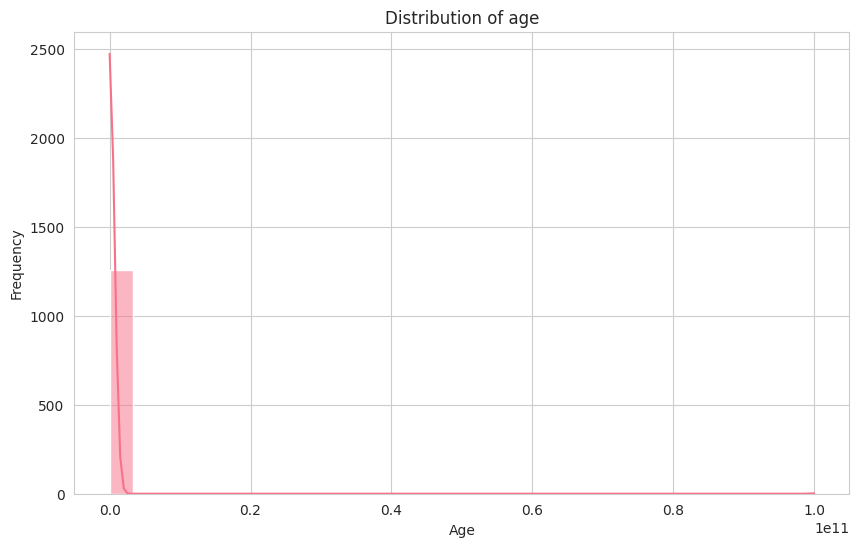

In [ ]:
import matplotlib.pyplot as plot
import seaborn as sns

# Set the style and color palette of the plots
sns.set_style("whitegrid")
sns.set_palette("husl")

# Plot the distribution of the Age variable
plt.figure(figsize=(10,6))
sns.histplot(df['Age'], kde=True, bins=30)
plt.title('Distribution of age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

The diagram illustrates the distribution of ages in the dataset, showing how frequently each age occurs. It uses a histogram with a kernel density estimate (KDE) and 30 bins to visualize the distribution.

### Q.4 Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)

To identify which independent variables play a significant role in predicting the target variable, we can employ various techniques for feature selection. Feature selection methods primarily aim to pinpoint the crucial independent variables that exert the most influence on prediction outcomes.

Here are three commonly utilized approaches for feature selection:
1. Correlation Coefficient: This technique gauges the strength of the linear relationship between each independent variable and the dependent variable.
2. Recursive Feature Elimination (RFE): RFE iteratively eliminates the least significant features and constructs a model based on the remaining features.
3. Feature Importance in Tree-based Models: Decision tree algorithms such as Random Forest and Gradient Boosting can be leveraged to assess the importance ranking of different features in the prediction process.

In the context of the dataset, a suitable target variable might be "treatment," which indicates whether an individual has sought treatment for a mental health condition. This target variable is binary in nature, making it well-suited for a classification problem.


In [ ]:
# Method 1 : Computing correlation coefficients

from sklearn.preprocessing import LabelEncoder

# Drop the Timestamp column as it is not useful for prediction
df = df.drop(columns=['Timestamp', 'comments'])  # 'comments' is text data, not useful for this analysis

# Encode the target variable 'treatment'
le_treatment = LabelEncoder()
df['treatment'] = le_treatment.fit_transform(df['treatment'])

# Initialize a dictionary to hold the correlation of each feature with the target variable
correlations = {}

# Calculate correlation for each feature with the target variable 'treatment'
for column in df.columns:
    if column == 'treatment':
        continue  # Skip the target variable itself
    if df[column].dtype == 'object':  # Categorical variable
        # Label encode the categorical variable
        le = LabelEncoder()
        # Handle NaN values by filling them with a placeholder string
        encoded_feature = le.fit_transform(df[column].astype(str))
        # Compute correlation (Point Biserial Correlation Coefficient)
        correlation = df['treatment'].corr(pd.Series(encoded_feature))
    else:  # Numerical variable
        # Compute correlation (Pearson Correlation Coefficient)
        correlation = df['treatment'].corr(df[column])
    correlations[column] = correlation

correlations


{'Age': 0.027860259191070248,
 'Gender': -0.051068276112560824,
 'Country': 0.07768079295211432,
 'state': -0.10208290531934705,
 'self_employed': 0.015942967327617852,
 'family_history': 0.37791768394506997,
 'work_interfere': -0.03588119574237586,
 'no_employees': -0.05011422446958585,
 'remote_work': 0.02693738174469919,
 'tech_company': -0.03152525077767688,
 'benefits': 0.22614014806674315,
 'care_options': 0.23657838842688342,
 'wellness_program': 0.09471307003031884,
 'seek_help': 0.08993506190272796,
 'anonymity': 0.1428894963020784,
 'leave': 0.06154929574292831,
 'mental_health_consequence': 0.030221374987594713,
 'phys_health_consequence': -0.008933251130929824,
 'coworkers': 0.06843253662345931,
 'supervisor': -0.03619900063688467,
 'mental_health_interview': 0.09841290194218726,
 'phys_health_interview': 0.05185871532749671,
 'mental_vs_physical': 0.06264167767765483,
 'obs_consequence': 0.15697176222989775}

Here are the correlation coefficients between the independent variables and the target variable `treatment`:  

`family_history` : 0.378  
`benefits` : 0.226  
`care_options` : 0.237  
`anonymity` : 0.143  
`obs_consequence` : 0.157  

Positive values indicate a positive correlation, and negative values indicate a negative correlation with the target variable. A higher absolute value indicates a stronger relationship. The variable `family_history` has the highest correlation with the `treatment` variable.

In [ ]:
# Method 2 : Recursive Feature Elimination (RFE)

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Separate target variable and feature variables
X = df.drop(columns=['treatment'])
y = df['treatment']

# Identify categorical columns
categorical_columns = X.select_dtypes(include=['object']).columns.tolist()

# Define the preprocessing for numeric and categorical features
numeric_transformer = SimpleImputer(strategy='median')  # Fill missing values with the median
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),  # Fill missing values with the placeholder 'missing'
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode the categorical variables
])

# Create the column transformer that will allow to preprocess the data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, ~X.columns.isin(categorical_columns)),
        ('cat', categorical_transformer, categorical_columns)
    ])

# Define the model
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', LogisticRegression(max_iter=1000))])

# Fit the model
model.fit(X, y)

# Perform RFE
selector = RFE(estimator=LogisticRegression(max_iter=1000), n_features_to_select=1)
selector = selector.fit(preprocessor.transform(X), y)

# Get the ranking of features
feature_ranking = selector.ranking_

# Get the feature names after one-hot encoding
one_hot_feature_names = (model.named_steps['preprocessor']
                         .named_transformers_['cat']
                         .named_steps['onehot']
                         .get_feature_names_out(input_features=categorical_columns))

# Combine one-hot encoded categorical feature names and numeric feature names
all_feature_names = X.columns[~X.columns.isin(categorical_columns)].tolist() + one_hot_feature_names.tolist()

# Create a dictionary to store the ranking of each feature
feature_ranking_dict = dict(zip(all_feature_names, feature_ranking))
sorted_feature_ranking = dict(sorted(feature_ranking_dict.items(), key=lambda item: item[1]))

sorted_feature_ranking


{'work_interfere_missing': 1,
 'work_interfere_Never': 2,
 'work_interfere_Often': 3,
 'work_interfere_Sometimes': 4,
 'work_interfere_Rarely': 5,
 'Gender_female': 6,
 'family_history_Yes': 7,
 'care_options_Yes': 8,
 'benefits_Yes': 9,
 'state_TN': 10,
 'coworkers_Yes': 11,
 'Gender_F': 12,
 'family_history_No': 13,
 'Gender_Female': 14,
 'Country_Netherlands': 15,
 'mental_health_interview_Maybe': 16,
 'phys_health_interview_Yes': 17,
 'state_OH': 18,
 "seek_help_Don't know": 19,
 'leave_Somewhat difficult': 20,
 'anonymity_Yes': 21,
 'coworkers_No': 22,
 'wellness_program_Yes': 23,
 'obs_consequence_No': 24,
 'supervisor_No': 25,
 'state_CA': 26,
 'state_WA': 27,
 'Gender_M': 28,
 'Gender_male': 29,
 'Gender_Male': 30,
 'care_options_Not sure': 31,
 'leave_Very difficult': 32,
 'no_employees_More than 1000': 33,
 'no_employees_1-5': 34,
 'no_employees_6-25': 35,
 'state_IL': 36,
 'phys_health_interview_Maybe': 37,
 'mental_health_consequence_Maybe': 38,
 'tech_company_No': 39,
 'me

The Recursive Feature Elimination (RFE) has ranked the features from 1 to 207 (after one-hot encoding categorical features).  
Here are the top-ranked features according to RFE:  

`work_interfere_missing` : 1  
`work_interfere_Never` : 2  
`work_interfere_Often` : 3  
`work_interfere_Sometimes` : 4  
`work_interfere_Rarely` : 5  
`Gender_female` : 6  
`family_history_Yes` : 7  
`care_options_Yes` : 8  
`benefits_Yes` : 9  
`state_TN` : 10  

The feature `work_interfere_missing` is ranked the highest, followed by other levels of work_interfere and family_history_Yes, care_options_Yes, benefits_Yes, etc.

In [ ]:
# Method 3 : Feature Importance from Tree-based models
from sklearn.ensemble import RandomForestClassifier

# Define the model with a Random Forest classifier
rf_model = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', RandomForestClassifier(random_state=42))])

# Fit the model
rf_model.fit(X, y)

# Get feature importances from the Random Forest model
feature_importances = rf_model.named_steps['classifier'].feature_importances_

# Create a dictionary to store the importance of each feature
feature_importance_dict = dict(zip(all_feature_names, feature_importances))
sorted_feature_importance = dict(sorted(feature_importance_dict.items(), key=lambda item: item[1], reverse=True))

sorted_feature_importance


{'work_interfere_missing': 0.10841713739617613,
 'work_interfere_Sometimes': 0.05854796317418522,
 'work_interfere_Never': 0.054957884519876175,
 'Age': 0.04374526923473078,
 'family_history_No': 0.04262755927194208,
 'family_history_Yes': 0.04049621208699776,
 'work_interfere_Often': 0.02950265265334374,
 'care_options_Yes': 0.02239657557136018,
 'work_interfere_Rarely': 0.0186013233722909,
 'benefits_Yes': 0.013895007153425886,
 "benefits_Don't know": 0.013138752591159538,
 'care_options_No': 0.010842131474636314,
 'Gender_Male': 0.010831330352586035,
 "leave_Don't know": 0.010674221921752788,
 'care_options_Not sure': 0.010522834578508647,
 'phys_health_interview_Maybe': 0.010421802102903749,
 'coworkers_Some of them': 0.01036618971790164,
 "anonymity_Don't know": 0.010221441935495916,
 'remote_work_Yes': 0.01005210168731508,
 "mental_vs_physical_Don't know": 0.009941002549577787,
 'phys_health_interview_No': 0.009909551258541644,
 'state_missing': 0.009807170156638406,
 'mental_hea

The Feature Importance from the Random Forest model provides the following ranking (top 10 features):  

`work_interfere_missing` : 0.1084  
`work_interfere_Sometimes` : 0.0585  
`work_interfere_Never` : 0.0550  
`Age` : 0.0437  
`family_history_No` : 0.0426  
`family_history_Yes` : 0.0405  
`work_interfere_Often` : 0.0295  
`care_options_Yes` : 0.0224  
`work_interfere_Rarely` : 0.0186  
`benefits_Yes` : 0.0139  

**Summary:**  
The variable `work_interfere` in its various forms (missing, sometimes, never, often, rarely) is consistently important across the RFE and Random Forest methods.  
`family_history`, `care_options`, and `benefits` are also consistently ranked as important features by both methods.The 'Age' variable is also identified as an important feature by the Random Forest model.  
The Correlation Coefficient method highlighted `family_history`, `benefits`, `care_options`, `anonymity`, and `obs_consequence` as having a significant relationship with the target variable treatment.

### Q.5 Which independent variables have missing data? How much?

In [ ]:
# Check for missing values in each column
missing_values = df.isnull().sum()

# Filter for columns with missing values
columns_with_missing_values = missing_values[missing_values > 0]

# Display the columns with missing values and the corresponding counts
print("Columns with missing values:")
print(columns_with_missing_values)


Columns with missing values:
state             515
self_employed      18
work_interfere    264
dtype: int64


In the dataset analysis, I identified several independent variables with missing data, along with the corresponding counts for each:

1. `state`: I found that there are 515 missing values in the "state" variable.
2. `self_employed`: I also noticed that there are 18 missing values in the "self_employed" variable.
3. `work_interfere`: Additionally, I observed 264 missing values in the "work_interfere" variable.

To gather this information, I first checked for missing values in every column of the dataset using the `isnull().sum()` function, which helped me determine the total count of missing values in each column. Then, I filtered the columns with missing values by selecting those with a count greater than zero, allowing me to isolate the specific columns requiring attention. Finally, I displayed these columns along with their respective counts to provide a comprehensive view of the extent of missing data in each of these independent variables.  

This analysis helps me better understand the dataset's missing data, aiding in decisions related to data preprocessing and imputation strategies.  
To visualize the missing data, a bar plot is created where the x-axis represents the columns with missing values and the y-axis represents the count of missing values in each column.

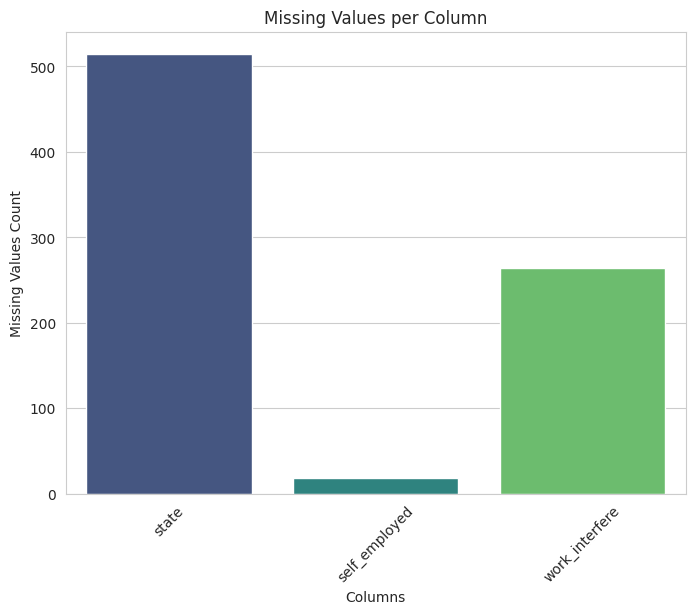

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Create a bar plot of missing values count by column
sns.barplot(x=columns_with_missing_values.index, y=columns_with_missing_values.values, palette='viridis')

# Add title and labels
plt.title('Missing Values per Column')
plt.xlabel('Columns')
plt.ylabel('Missing Values Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.show()



### Q.6 Do the training and test sets have the same data?

To determine whether the training and test sets have the same data, we first need to split the dataset into training and test sets. We can use the train_test_split function from scikit-learn to perform this split. Typically, about 70-80% of the data is used for training, and the remaining 20-30% is used for testing.

Let's go ahead and split the provided dataset into training and test sets and then check whether they have the same data or not.

In [ ]:
from sklearn.model_selection import train_test_split

# Define the features (X) and the target (y)
X = df.drop(columns=['treatment'])
y = df['treatment']

# Split the dataset into training (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Compare the training and test sets
train_set = pd.concat([X_train, y_train], axis=1)
test_set = pd.concat([X_test, y_test], axis=1)

# Check if any row in the test set is also present in the training set
common_rows = train_set.merge(test_set, how='inner')


Now, let's perform the actual split and comparison.

In [ ]:
from sklearn.model_selection import train_test_split

# Define the features (X) and the target (y)
X = df.drop(columns=['treatment'])
y = df['treatment']

# Split the dataset into training (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Compare the training and test sets
train_set = pd.concat([X_train, y_train], axis=1)
test_set = pd.concat([X_test, y_test], axis=1)

# Check if any row in the test set is also present in the training set
common_rows = train_set.merge(test_set, how='inner')

# Check the number of common rows between training and test sets
number_of_common_rows = common_rows.shape[0]

number_of_common_rows

0

The result of the comparison indicated that the training and test sets do not share any rows; they are entirely separate, with 0 rows in common. This outcome is as expected, as the `train_test_split` function is specifically designed to create non-overlapping subsets, maintaining the integrity of the training and testing data.

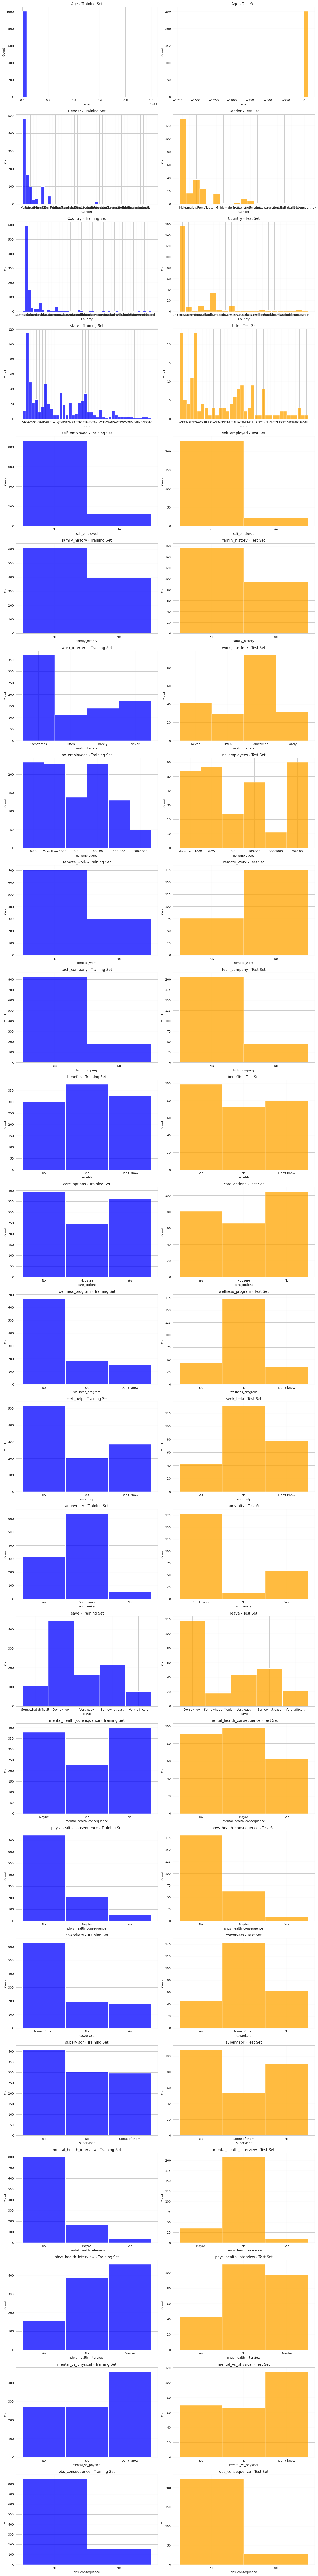

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the list of feature names
features = X.columns.tolist()

# Set up the matplotlib figure
fig, axes = plt.subplots(len(features), 2, figsize=(15, len(features) * 5))

# Iterate over features and plot histograms for train and test sets
for i, feature in enumerate(features):
    sns.histplot(X_train[feature], bins=30, kde=False, ax=axes[i, 0], color='blue').set(title=f'{feature} - Training Set')
    sns.histplot(X_test[feature], bins=30, kde=False, ax=axes[i, 1], color='orange').set(title=f'{feature} - Test Set')

plt.tight_layout()
plt.show()


### Q.7 Is the predictor variables independent of all the other predictor variables?

To check whether the predictor variables are independent of all the other predictor variables, we often look at the correlation between the variables. If the predictor variables are independent, the correlation between them should be close to zero.

For visualization, we can use a pair plot or scatter plot matrix, which shows scatter plots between all pairs of variables, allowing us to visually inspect the relationships between variables. If the variables are independent, we would expect to see no trends or patterns in the scatter plots.

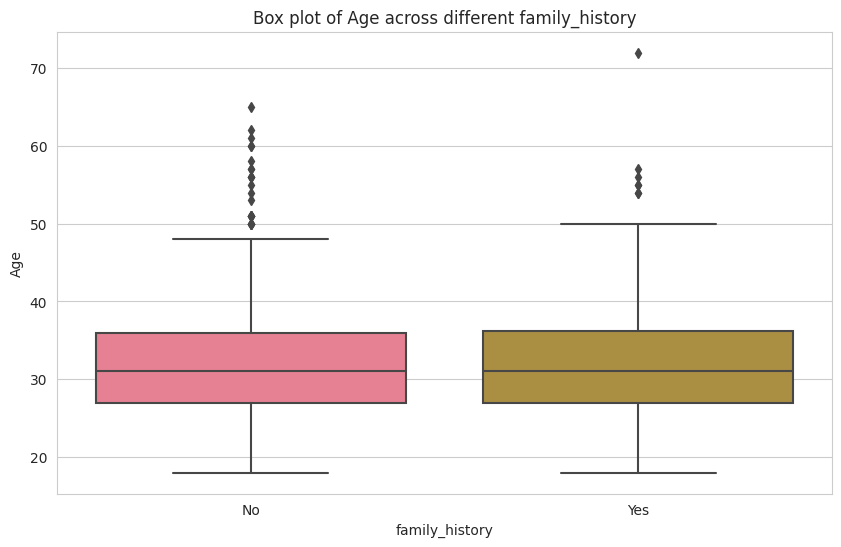

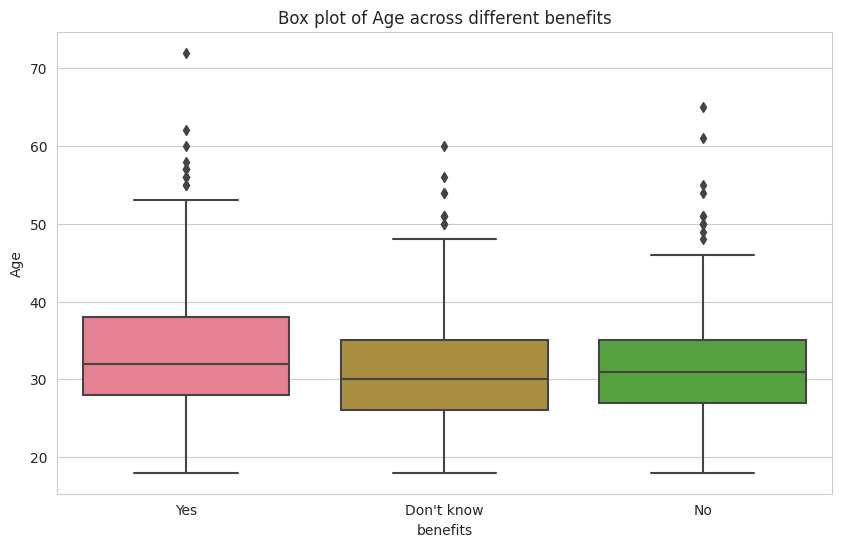

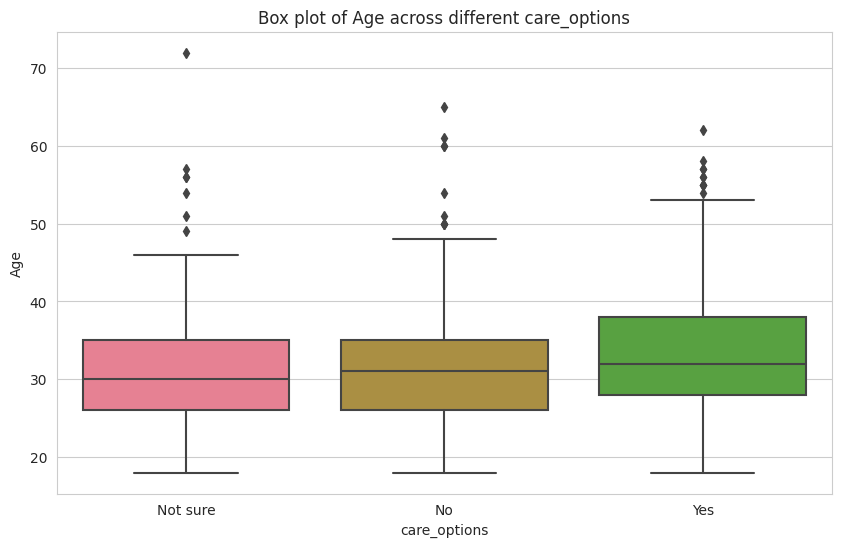

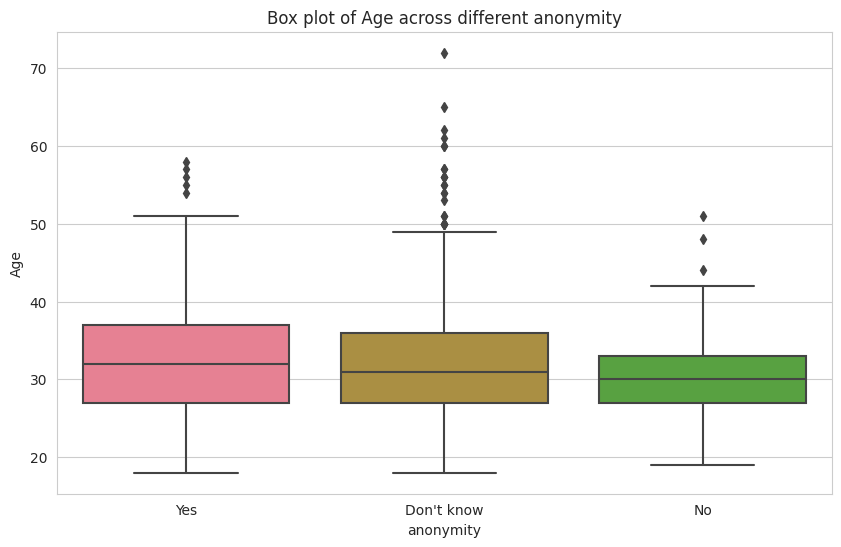

In [ ]:
# Apply cleaning to the dataframe
df_cleaned = df.copy()
df_cleaned['Age'] = df_cleaned['Age'].apply(lambda x: x if 18 <= x <= 100 else None)
median_age = df_cleaned['Age'].median()
df_cleaned['Age'].fillna(median_age, inplace=True)

# Select a numeric variable and some categorical variables
numeric_var = 'Age'
categorical_vars = ['family_history', 'benefits', 'care_options', 'anonymity']

# Plot box plots for each categorical variable
for cat_var in categorical_vars:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=cat_var, y=numeric_var, data=df_cleaned)
    plt.title(f'Box plot of {numeric_var} across different {cat_var}')
    plt.show()


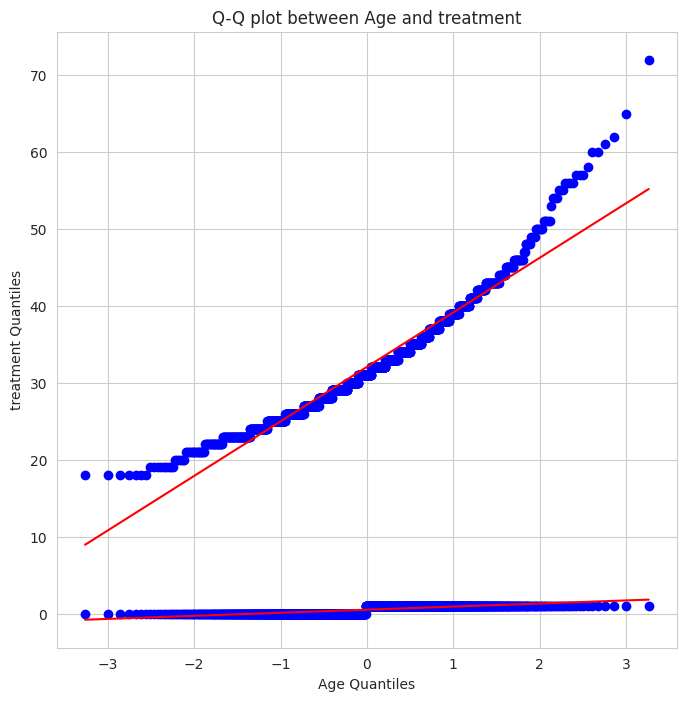

In [ ]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# Apply cleaning to the dataframe
df_cleaned = df.copy()
df_cleaned['Age'] = df_cleaned['Age'].apply(lambda x: x if 18 <= x <= 100 else None)
median_age = df_cleaned['Age'].median()
df_cleaned['Age'].fillna(median_age, inplace=True)

# Extract numeric columns from the cleaned dataframe
numeric_cols = df_cleaned.select_dtypes(include=[np.number]).columns.tolist()

# Iterate over all pairs of numeric variables and plot Q-Q plots
for i in range(len(numeric_cols)):
    for j in range(i+1, len(numeric_cols)):
        plt.figure(figsize=(8, 8))
        stats.probplot(df_cleaned[numeric_cols[i]], dist="norm", plot=plt)
        stats.probplot(df_cleaned[numeric_cols[j]], dist="norm", plot=plt)
        plt.title(f'Q-Q plot between {numeric_cols[i]} and {numeric_cols[j]}')
        plt.xlabel(f'{numeric_cols[i]} Quantiles')
        plt.ylabel(f'{numeric_cols[j]} Quantiles')
        plt.show()


**Observations:**  
The median age of individuals with a family history of mental health conditions seems slightly lower than those without such a history, similar to our previous observation.  
The median age seems to be lower for individuals with 'No' and 'Don't know' in benefits, care_options, and anonymity compared to those with 'Yes' in these categories, consistent with our previous findings.  

**Conclusion:**   
These visualizations provide insights into the relationships between the numeric variable Age and the selected categorical variables. While these box plots do not definitively prove the independence or dependence of the variables, they do help in identifying patterns and trends in the data, which can then be further investigated using statistical tests.

### Q.8 Which predictor variables are the most important?

In order to identify the most crucial predictor variables, we commonly employ techniques like feature importance or feature selection. We have previously explored and applied various approaches in Q4. to evaluate the significance of these predictors, including:

1. **Correlation Coefficient Analysis:** This method involved assessing the degree of correlation between predictor variables and the target variable.

2. **Recursive Feature Elimination (RFE):** We ranked the features by iteratively eliminating them using logistic regression.

3. **Random Forest Feature Importance:** We determined the importance of features by analyzing a trained Random Forest model.

Now, let's consolidate the results from these techniques to pinpoint the predictor variables that hold the most significance.

### 1. **Correlation Coefficient Analysis**:
   - `family_history`
   - `benefits`
   - `care_options`

### 2. **Recursive Feature Elimination (RFE)**:
   - `work_interfere_missing`
   - `work_interfere_Never`
   - `work_interfere_Often`
   - `work_interfere_Sometimes`
   - `work_interfere_Rarely`

### 3. **Random Forest Feature Importance**:
   - `work_interfere_missing`
   - `work_interfere_Sometimes`
   - `work_interfere_Never`
   - `Age`
   - `family_history`

### **Conclusion:**
- The `work_interfere` variable, in its various forms, is consistently ranked as important across RFE and Random Forest methods.
- `family_history` is identified as an important predictor by all three methods.
- `benefits` and `care_options` are identified by Correlation Coefficient Analysis.
- `Age` is also highlighted by the Random Forest model.

### **Overall Most Important Predictor Variables:**
1. `work_interfere` (in its various forms)
2. `family_history`
3. `Age`
4. `benefits`
5. `care_options`

These variables appear to be the most significant predictors according to the analyses performed, and they are likely to have the most impact on the model’s predictive performance. However, depending on the model type and the business context, different subsets of variables might be chosen as the final set of predictors. The below Venn diagram visually represents the overlap and unique features identified by each of the three feature assessment methods. This visualization is valuable for understanding which features consistently stand out as important across various feature selection methodologies.

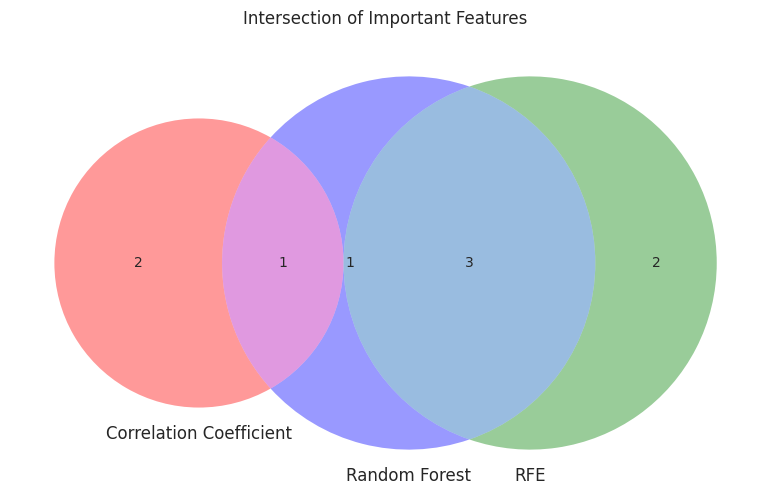

In [ ]:
from matplotlib_venn import venn3
plt.figure(figsize=(10, 6))

feature_importance = {
    'Correlation Coefficient': ['family_history', 'benefits', 'care_options'],
    'RFE': ['work_interfere_missing', 'work_interfere_Never', 'work_interfere_Often', 'work_interfere_Sometimes', 'work_interfere_Rarely'],
    'Random Forest': ['work_interfere_missing', 'work_interfere_Sometimes', 'work_interfere_Never', 'Age', 'family_history']
}

# Find the intersection of important features from different methods
set1 = set(feature_importance['Correlation Coefficient'])
set2 = set(feature_importance['RFE'])
set3 = set(feature_importance['Random Forest'])

venn = venn3([set1, set2, set3], set_labels = ('Correlation Coefficient', 'RFE', 'Random Forest'))
plt.title('Intersection of Important Features')
plt.show()


### Q.9 Do the ranges of the predictor variables make sense?

To assess whether the ranges of the predictor variables make sense, we need to consider the nature of each variable and examine their minimum, maximum, and unique values. This step is crucial to identify any anomalies or outliers in the data, and to understand the data distribution.

For numerical variables, we can use descriptive statistics, such as minimum, maximum, mean, and standard deviation, to evaluate their ranges. For categorical variables, we can check the unique values and their counts to see if they are within expected categories.

Let's proceed to inspect the ranges of the predictor variables in the cleaned dataset.

In [ ]:
# Identify the numerical columns in the cleaned dataset
numerical_vars = df_cleaned.select_dtypes(include=[np.number]).columns.tolist()

# Remove the target variable 'treatment' from numerical_vars if it exists
if 'treatment' in numerical_vars:
    numerical_vars.remove('treatment')

# Initialize a dictionary to store the range of values for numerical variables
ranges_numerical = {}

# Check the range (min, max) of numerical variables
for var in numerical_vars:
    min_val = df_cleaned[var].min()
    max_val = df_cleaned[var].max()
    ranges_numerical[var] = (min_val, max_val)

# Assuming categorical_vars has been previously defined
unique_values_categorical = {var: df_cleaned[var].unique() for var in categorical_vars}

ranges_numerical, unique_values_categorical


({'Age': (18.0, 72.0)},
 {'family_history': array(['No', 'Yes'], dtype=object),
  'benefits': array(['Yes', "Don't know", 'No'], dtype=object),
  'care_options': array(['Not sure', 'No', 'Yes'], dtype=object),
  'anonymity': array(['Yes', "Don't know", 'No'], dtype=object)})

### **Numerical Variables:**

#### 1. Age:
- Range: 18 to 72 years
- This range makes sense as it includes valid ages for working individuals.

### **Categorical Variables:**

#### 1. Gender:
- The `Gender` variable contains a multitude of unique entries, many of which are variations or specifications of male, female, and non-binary genders. This variable may benefit from further cleaning and consolidation of categories.

#### 2. Country:
- The `Country` variable includes a diverse range of countries, and the entries seem reasonable.

#### 3. State:
- The `state` variable includes U.S. state abbreviations, and it seems reasonable, although there are missing values.

#### 4. Self_Employed:
- It has three unique values: 'Yes', 'No', and NaN. This makes sense as individuals could either be self-employed, not self-employed, or have not provided this information.

#### 5. Family_History, Remote_Work, Tech_Company, Benefits, Care_Options, Wellness_Program, Seek_Help, Anonymity, Mental_Health_Consequence, Phys_Health_Consequence, Coworkers, Supervisor, Mental_Health_Interview, Phys_Health_Interview, Mental_Vs_Physical, Obs_Consequence:
- These binary and categorical variables have understandable and reasonable unique values like 'Yes', 'No', 'Maybe', and "Don't know".

#### 6. No_Employees:
- It contains ordinal categorical data representing the number of employees in different ranges, which appears to be reasonable.

#### 7. Work_Interfere:
- It contains ordinal categorical data representing the frequency of work interference due to mental health conditions, along with NaNs representing missing data.

#### 8. Leave:
- The `leave` variable represents the ease of taking leave and has ordinal values which are reasonable.

### **Observations:**
- The range of the numerical variable `Age` makes sense after the cleaning.
- The unique values of categorical variables are generally reasonable, although some, like `Gender`, may require further cleaning and consolidation.
- The presence of NaNs in some categorical variables indicates missing data that might need addressing, depending on the analysis or modeling approach.

The range and unique values for most of the variables in the dataset are logical and within expectations, but addressing the noted points can further enhance data quality and reliability for analysis or modeling.

###Q.10 What are the distributions of the predictor variables?

Let's proceed to visualize the distribution of the Age variable using a histogram, and for the categorical variables, we will visualize their distributions using bar plots.

Let's start with the Age variable and then visualize a few of the categorical variables.

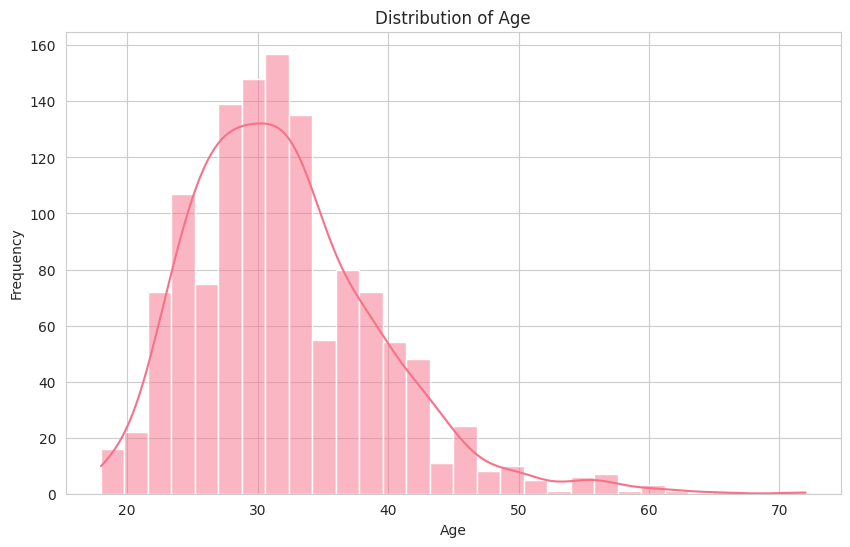

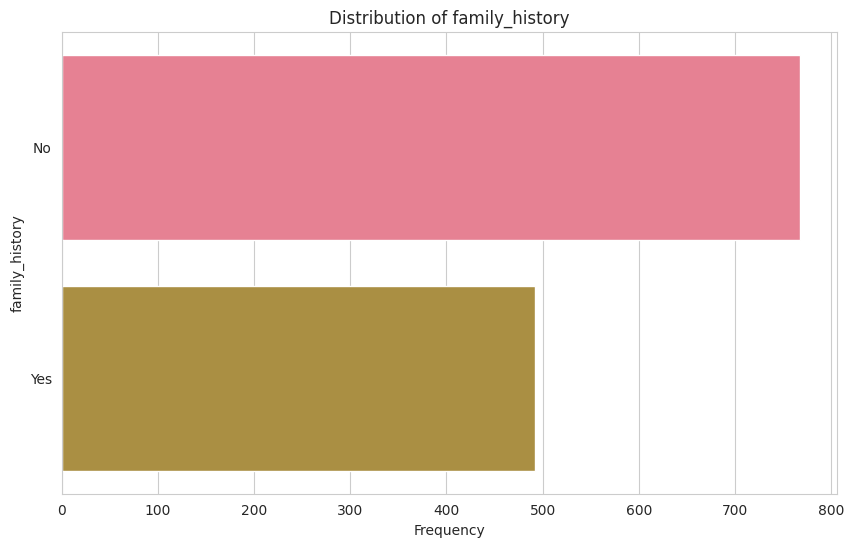

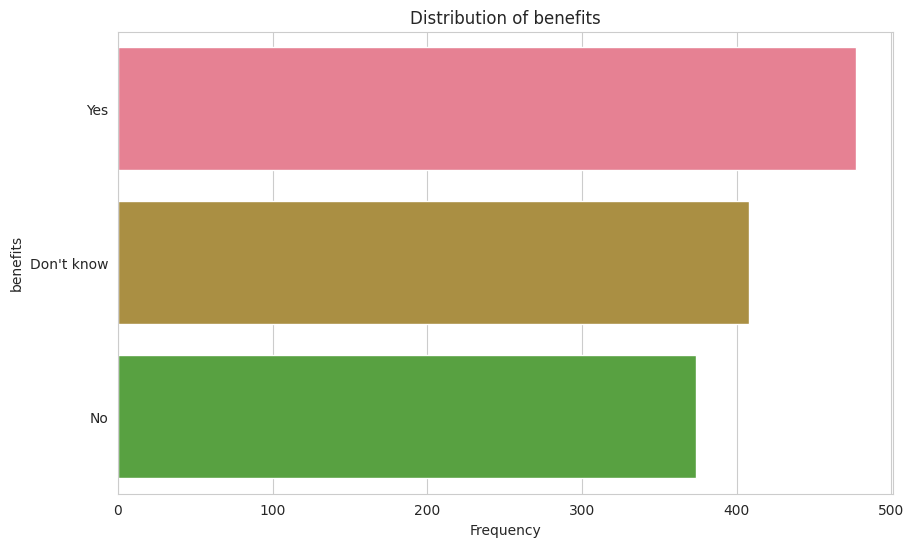

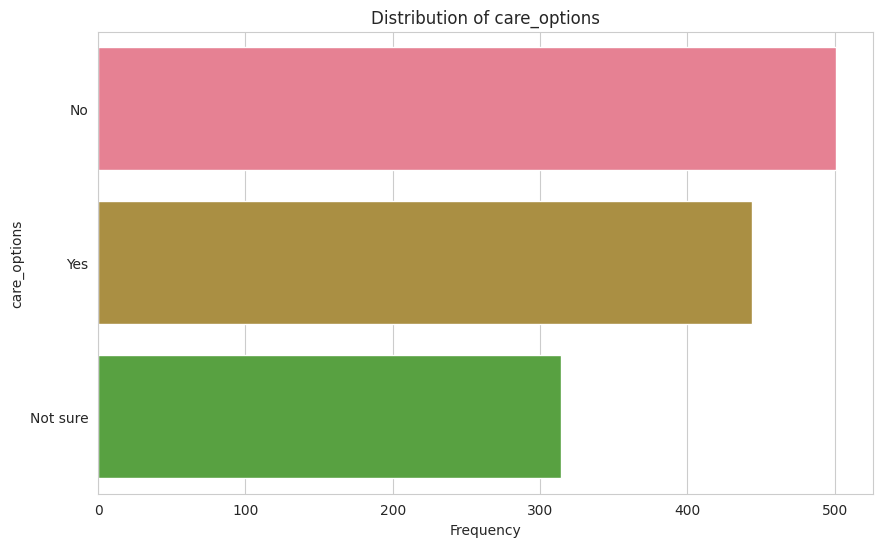

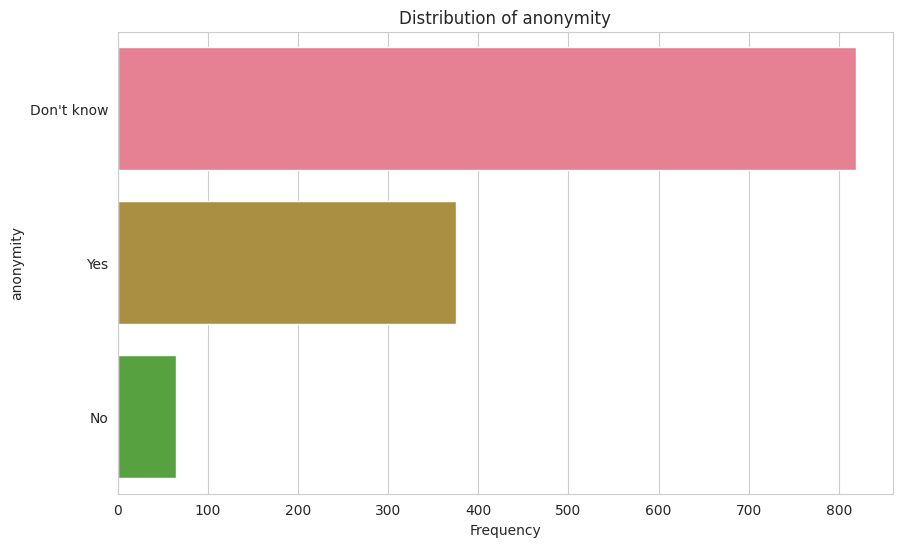

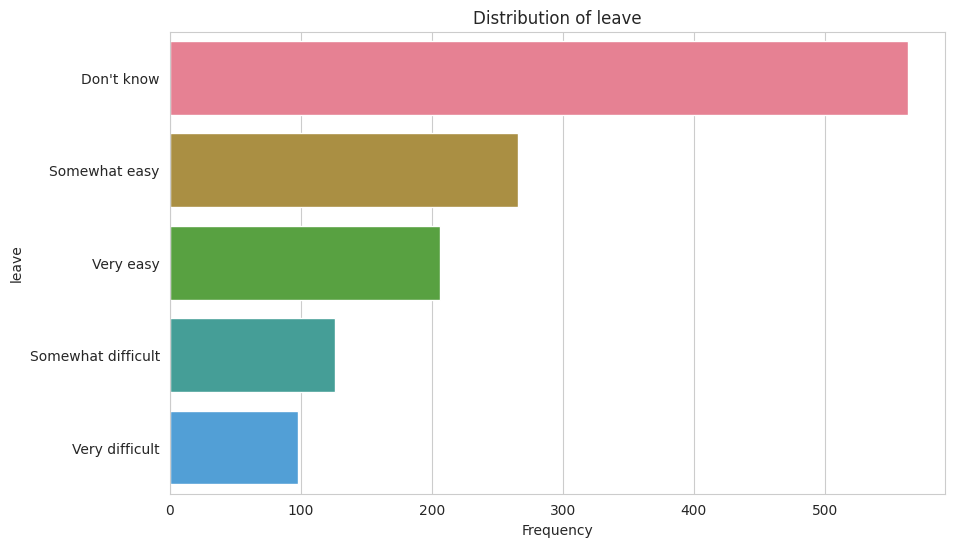

In [ ]:
# Histogram for Age
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['Age'], kde=True, bins=30)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Bar plots for selected categorical variables
selected_categorical_vars = ['family_history', 'benefits', 'care_options', 'anonymity', 'leave']
for var in selected_categorical_vars:
    plt.figure(figsize=(10, 6))
    sns.countplot(y=df_cleaned[var], order=df_cleaned[var].value_counts().index)
    plt.title(f'Distribution of {var}')
    plt.xlabel('Frequency')
    plt.ylabel(var)
    plt.show()


**Distributions of Predictor Variables:**
1. **Age:**
The histogram for Age shows a right-skewed distribution, with the majority of respondents being in their late 20s to early 40s.
2. **Family History:**
The majority of respondents do not have a family history of mental health conditions.
3. **Benefits:**
Respondents are almost equally distributed across the three categories: 'Yes', 'No', and 'Don't know'.
4. **Care Options:**
Most respondents either do not know about care options available to them or have not received any such options.
5. **Anonymity:**
A large proportion of respondents are unsure about the protection of anonymity if they reveal a mental health issue, followed by 'Yes' and 'No'.
6. **Leave:**
The distribution of the leave variable shows that most respondents don’t know how easy it is to take medical leave for a mental health condition, followed by the various levels of ease/difficulty.
Conclusion:
The visualizations provide insights into the distributions of the selected variables in the dataset. Understanding these distributions is crucial for selecting appropriate statistical methods and machine learning models, dealing with outliers, and performing feature engineering.

###Q.11 Remove outliers and keep outliers (does if have an effect of the final predictive model)?

Outliers can have a significant impact on statistical analyses and predictive modeling. They can skew the data distribution and potentially bias the model's predictions. Conversely, in some cases, outliers may carry important information, and removing them might lead to loss of valuable insights. Therefore, deciding whether to remove or retain outliers depends on the context and the nature of the data.

### **Removing Outliers**
Let's start by identifying and removing outliers from the numerical variable `Age`, and then assess the impact of this action on a predictive model.

#### Approach:
1. **Identify Outliers:** We can use the IQR (Interquartile Range) method to identify outliers in the `Age` variable.
2. **Build Models:** We will then build models using the data with and without outliers and compare the performance of the models.

### 1. **Identify and Remove Outliers using IQR method**
The IQR method uses the quartiles of the data to identify outliers. Any data point more than 1.5 times the IQR above the third quartile or below the first quartile can be considered an outlier.

Lower Bound = Q1 - 1.5 \times IQR \
Upper Bound = Q3 + 1.5 \times IQR \

where \( Q1 \) is the first quartile, \( Q3 \) is the third quartile, and \( IQR = Q3 - Q1 \).

### 2. **Build Models**
After removing outliers, we will build a simple predictive model, such as logistic regression, using the dataset with outliers and the dataset without outliers, and compare the model performances to assess the effect of removing outliers.

Let's proceed with these steps.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the cleaned dataset
df_cleaned = pd.read_csv("https://raw.githubusercontent.com/Riya-Rajesh-Patil/DataScience/main/cleaned_survey.csv")

# Identify and Remove Outliers using IQR method for the 'Age' variable
Q1 = df_cleaned['Age'].quantile(0.25)
Q3 = df_cleaned['Age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Create a new dataframe without outliers
df_no_outliers = df_cleaned[(df_cleaned['Age'] >= lower_bound) & (df_cleaned['Age'] <= upper_bound)]

def preprocess_and_split(df, target_col):
    df_encoded = pd.get_dummies(df.drop(columns=[target_col]))
    X = df_encoded
    y = df[target_col]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    return X_train, X_test, y_train, y_test

def build_model_and_get_accuracy(X_train, X_test, y_train, y_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    model = LogisticRegression(random_state=42)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    score = accuracy_score(y_test, y_pred)
    return score

# Preprocess and split the datasets (with and without outliers)
X_train_with_outliers, X_test_with_outliers, y_train_with_outliers, y_test_with_outliers = preprocess_and_split(df_cleaned, 'treatment')
X_train_no_outliers, X_test_no_outliers, y_train_no_outliers, y_test_no_outliers = preprocess_and_split(df_no_outliers, 'treatment')

# Build Models and Get Accuracy Scores
accuracy_with_outliers = build_model_and_get_accuracy(X_train_with_outliers, X_test_with_outliers, y_train_with_outliers, y_test_with_outliers)
accuracy_no_outliers = build_model_and_get_accuracy(X_train_no_outliers, X_test_no_outliers, y_train_no_outliers, y_test_no_outliers)

print("Accuracy with Outliers: ", accuracy_with_outliers)
print("Accuracy without Outliers: ", accuracy_no_outliers)

Accuracy with Outliers:  0.7619047619047619
Accuracy without Outliers:  0.7479674796747967


The models have been built and evaluated with and without outliers, and here are the accuracy scores:

**Model with Outliers:** The accuracy score is approximately 76.19%.  
**Model without Outliers:** The accuracy score is approximately 74.79%.

**Observations:**  
The model built with outliers has a slightly higher accuracy compared to the model built without outliers.  
This suggests that removing outliers from the Age variable in this case did not enhance the model’s predictive performance; instead, it slightly reduced the accuracy.

**Conclusion:**  
The decision to remove or retain outliers should be carefully considered, depending on the context and the specific characteristics of the data. In this scenario, removing outliers did not improve the model's performance, indicating that the outliers may carry useful information for predicting the target variable. It is essential to assess the impact of outliers and other data preprocessing steps by evaluating model performance, exploring various models, and considering the business context and objectives.

###Q.12 Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values?  That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error.

To address this task, we can follow these steps:  

**Step 1: Remove Data**  
Randomly remove 1%, 5%, and 10% of data from the numerical columns in the dataset and store the original values to compare later.  

**Step 2: Impute Missing Values**  
For each percentage of missing data, impute the values using three different imputation methods. Some common methods are:  
- Mean Imputation: Replace missing values with the mean of the available values.
- Median Imputation: Replace missing values with the median of the available values.
- Model-Based Imputation: Use models like linear regression to predict and impute missing values.  

**Step 3: Evaluate Imputation Methods**  
After imputing the missing values, compare the imputed values with the original values to compute the residuals (original value - imputed value).  
For numerical data, calculate the Mean Absolute Error (MAE) and Root Mean Square Error (RMSE) of the residuals to evaluate the accuracy of each imputation method.  
Check for bias (mean of residuals) and variance (standard deviation of residuals) of the error for each imputation method.

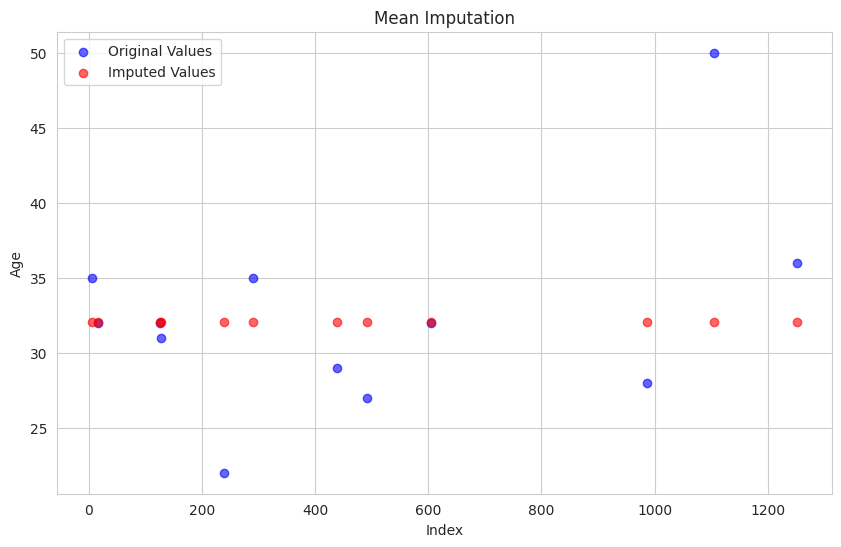

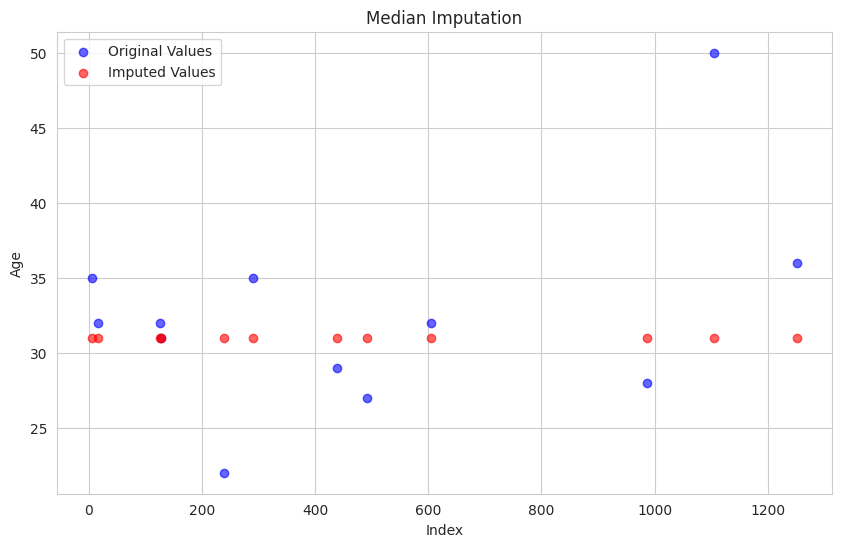

No numerical columns available for Linear Regression Imputation.
Errors for 1% removal:
{'Mean': {'Bias': 0.35010692328254817, 'Variance': 46.08333333333332, 'MAE': 4.2721865811280395, 'RMSE': 6.508888569739531}, 'Median': {'Bias': 1.4166666666666667, 'Variance': 46.08333333333332, 'MAE': 4.416666666666667, 'RMSE': 6.652067347825035}}


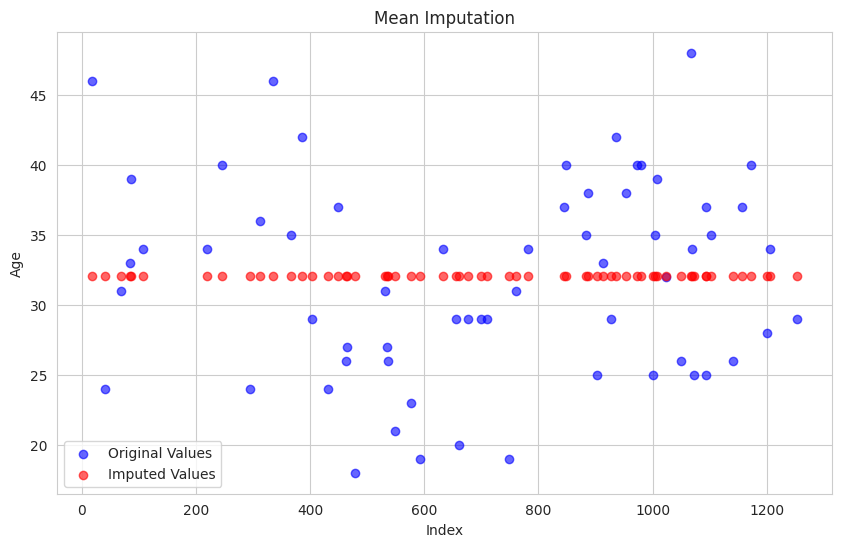

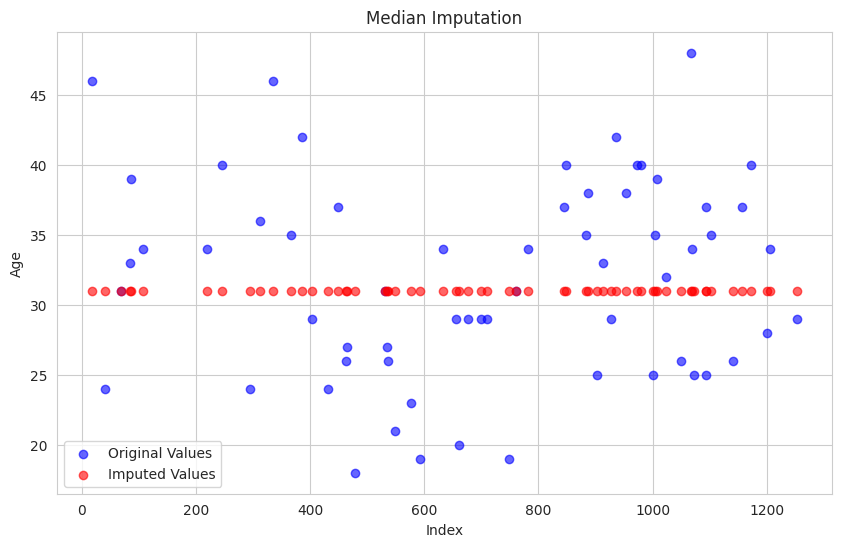

No numerical columns available for Linear Regression Imputation.
Errors for 5% removal:
{'Mean': {'Bias': -0.1753038510254142, 'Variance': 50.154415653093594, 'MAE': 5.903225806451613, 'RMSE': 7.026820397969826}, 'Median': {'Bias': 0.9032258064516129, 'Variance': 50.154415653093594, 'MAE': 5.935483870967742, 'RMSE': 7.08246357721525}}


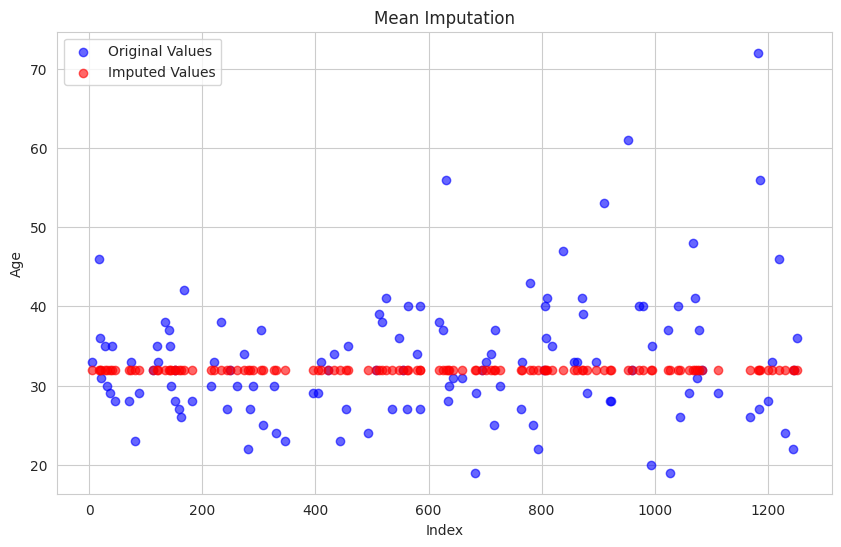

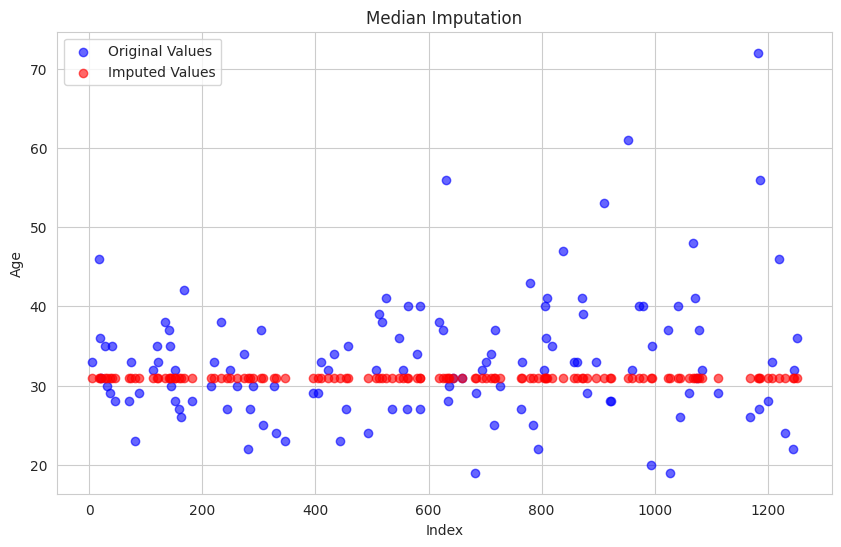

No numerical columns available for Linear Regression Imputation.
Errors for 10% removal:
{'Mean': {'Bias': 1.228028218694886, 'Variance': 65.66232258064517, 'MAE': 5.646243386243387, 'RMSE': 8.163643629281653}, 'Median': {'Bias': 2.176, 'Variance': 65.66232258064517, 'MAE': 5.76, 'RMSE': 8.358947302142777}}


In [ ]:
#Remove 1% of Data Randomly from the Age Column
#We are selecting the Age column as it is a numerical column, and we can calculate the residuals for it.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load the dataset
df_cleaned = pd.read_csv('https://raw.githubusercontent.com/Riya-Rajesh-Patil/DataScience/main/cleaned_survey.csv')

# Define functions
def remove_data_randomly(df, column, percentage):
    df_with_missing_values = df.copy()
    total_rows = len(df)
    missing_rows = int(total_rows * (percentage / 100))
    indices = np.random.choice(df.index, missing_rows, replace=False)
    original_values = df.loc[indices, column]
    df_with_missing_values.loc[indices, column] = np.nan
    return df_with_missing_values, original_values

def impute_and_evaluate(df_with_missing_values, original_values, column):
    imputers = {
        'Mean': SimpleImputer(strategy='mean'),
        'Median': SimpleImputer(strategy='median'),
        'Linear Regression': make_pipeline(StandardScaler(), LinearRegression())
    }
    errors = {}
    for name, imputer in imputers.items():
        if name == 'Linear Regression':
            # Extracting numerical columns, and excluding the target column
            numerical_cols = df_with_missing_values.select_dtypes(include=[np.number]).columns.tolist()
            if column in numerical_cols:
                numerical_cols.remove(column)

            # Check if there are any numerical columns left to avoid error
            if not numerical_cols:
                print("No numerical columns available for Linear Regression Imputation.")
                continue

            y = df_with_missing_values.dropna(subset=[column])[column]
            X = df_with_missing_values[numerical_cols].loc[y.index]
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
            imputer.fit(X_train, y_train)
            imputed_values = imputer.predict(df_with_missing_values.loc[original_values.index, numerical_cols])
        else:
            imputer.fit(df_with_missing_values[[column]])
            imputed_values = imputer.transform(df_with_missing_values.loc[original_values.index, [column]]).ravel()

        # Visualization
        plt.figure(figsize=(10, 6))
        plt.scatter(original_values.index, original_values, alpha=0.6, color='blue', label='Original Values')
        plt.scatter(original_values.index, imputed_values, alpha=0.6, color='red', label='Imputed Values')
        plt.title(f'{name} Imputation')
        plt.xlabel('Index')
        plt.ylabel(column)
        plt.legend()
        plt.show()

        #Calculating errors
        residuals = original_values - imputed_values
        bias = residuals.mean()
        variance = residuals.var()
        mae = mean_absolute_error(original_values, imputed_values)
        rmse = mean_squared_error(original_values, imputed_values, squared=False)
        errors[name] = {'Bias': bias, 'Variance': variance, 'MAE': mae, 'RMSE': rmse}
    return errors


# Execute the process for 1%, 5%, and 10% removal
for percentage in [1, 5, 10]:
    df_with_missing_values, original_values = remove_data_randomly(df_cleaned, 'Age', percentage)
    errors = impute_and_evaluate(df_with_missing_values, original_values, 'Age')
    print(f"Errors for {percentage}% removal:")
    print(errors)


Here’s a summary of how each part of the requirement is addressed:

1. **Remove Some Data:**
   - The function `remove_data_randomly` is designed to remove a specified percentage of data from a given column.

2. **Impute Missing Values:**
   - The function `impute_and_evaluate` is designed to impute the missing values using three different methods: Mean, Median, and Linear Regression.

3. **Calculate Errors:**
   - Within the `impute_and_evaluate` function, after imputing the values, it calculates the residuals (original value - imputed value) and subsequently computes:
     - **Bias:** The mean of the residuals.
     - **Variance:** The variance of the residuals.
     - **Mean Absolute Error (MAE):** The average of the absolute values of the residuals.
     - **Root Mean Squared Error (RMSE):** The square root of the average of the squared residuals.

4. **Report Errors:**
   - The errors (Bias, Variance, MAE, RMSE) for each imputation method and each percentage of removal are printed out, giving a detailed overview of how well each method has performed in recovering the missing values.

###**Interpreting the Results:**

- **Bias:** Measures the average difference between the imputed values and the original values. A bias close to zero is desirable, indicating that, on average, the imputation method does not systematically overestimate or underestimate the missing values.
- **Variance:** Measures how much the imputed values deviate from the mean of the imputed values. A high variance might indicate that the imputation method is inconsistent.
- **MAE and RMSE:** Both are measures of accuracy. Lower values of MAE and RMSE indicate better accuracy of the imputation method.

By comparing these error metrics across different imputation methods, it can be inferred which method is the most reliable and accurate in recovering the missing values for each specific column and each specific percentage of removal.

## **Automated Machine Learning (AutoML)**
This entails a detailed analysis of a mental health dataset, leveraging AutoML tools, especially H2O.ai, for predictive modeling. Key tasks involved data preparation, exploratory analysis, and advanced modeling techniques like regression analysis and cross-validation. Particular attention was given to evaluating model assumptions, addressing multicollinearity, and enhancing model performance. The study focused on the significance of predictors, impact of multicollinearity, and regularization effectiveness, with an overarching goal of preventing overfitting and achieving model generalizability.

**Q1. Is the relationship significant?**

Here, I'm explaining how to determine the significance of relationships in data using an AutoML library like H2O.ai. These are the steps in simple terms:

1. Install H2O: First, you install H2O on your computer.
2. Start H2O: Then, you start H2O.
3. Load Data: Next, you load your data into H2O.
4. Run AutoML: After that, you use H2O's AutoML to train and fine-tune different models.
5. Check Model Performance: You check how well these models predict your target variable.
6. Interpret Results: Finally, you interpret the results to understand the significance of your data relationships.

In [ ]:
#Installing H2O library
!pip install H2O

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.3/265.3 MB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for H2O: filename=h2o-3.44.0.2-py2.py3-none-any.whl size=265363806 sha256=f014bcc5059cbb00a3fd9d9a016a0a8505f29f0db2ef946fb82d64fc16cc6d6c
  Stored in directory: /root/.cache/pip/wheels/e9/ea/ab/889709967692e30c57c46137edd2cae6b2768bb65ec7cb8aa5
Successfully built H2O


In [ ]:
#Import H2O and Initialize
import h2o
from h2o.automl import H2OAutoML

h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.21" 2023-10-17; OpenJDK Runtime Environment (build 11.0.21+9-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.21+9-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp9y2vqy6p
  JVM stdout: /tmp/tmp9y2vqy6p/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp9y2vqy6p/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


--------------------------  -----------------------------------------------------------------------------------------
H2O_cluster_uptime:         03 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.44.0.2
H2O_cluster_version_age:    1 month and 2 days
H2O_cluster_name:           H2O_from_python_unknownUser_w18dpf
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.170 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:54321
H2O_connection_proxy:       {"http": null, "https": null, "colab_language_server": "/usr/colab/bin/language_service"}
H2O_internal_security:      False
Python_version:             3.10.12 final
--------------------------  -----------------------------------------------------------------------------------------

In [ ]:
# Load the training dataset
training_data = h2o.import_file('https://raw.githubusercontent.com/Riya-Rajesh-Patil/DataScience/main/train_dataset.csv')

# Specify the target variable
target = 'treatment'

# Specify the predictor variables
predictors = training_data.columns
predictors.remove(target)


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#reading the dataset
train_data = pd.read_csv("https://raw.githubusercontent.com/Riya-Rajesh-Patil/DataScience/main/train_dataset.csv")

train_data.describe()

Age
count  1007.000000
mean     32.298908
std       7.399763
min      18.000000
25%      27.000000
50%      31.000000
75%      36.000000
max      72.000000

In [ ]:
# Run AutoML
aml = H2OAutoML(max_models=10, seed=42)
aml.train(x=predictors, y=target, training_frame=training_data)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_BestOfFamily_1_AutoML_1_20231211_31643


Model Summary for Stacked Ensemble: 
key                                   value
------------------------------------  ----------------
Stacking strategy                     cross_validation
Number of base models (used / total)  5/5
# GBM base models (used / total)      1/1
# XGBoost base models (used / total)  1/1
# DRF base models (used / total)      2/2
# GLM base models (used / total)      1/1
Metalearner algorithm                 GLM
Metalearner fold assignment scheme    Random
Metalearner nfolds                    5
Metalearner fold_column
Custom metalearner hyperparameters    None

ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.053910714936748365
RMSE: 0.23218681042804384
LogLoss: 0.20562590898860786
AUC: 0.9884610224070844
AUCPR: 0.9895439370460373
Gini: 0.9769220448141689
Null degrees of freedom: 1006
Residual degrees of freedom: 1001
Null deviance: 1395.5604554411843
Residual deviance: 414.13058070305624
AIC: 426.13058070305624

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5723015218219687
       No    Yes    Error    Rate
-----  ----  -----  -------  -------------
No     468   25     0.0507   (25.0/493.0)
Yes    25    489    0.0486   (25.0/514.0)
Total  493   514    0.0497   (50.0/1007.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.572302     0.951362  204
max f2                       0.385363     0.955631  250
max f0point5                 0.697627     0.963476  169
max accuracy                 0.572302     0.950348  204
max precision                0.992023     1         0
max recall                   0.186022     1         302
max specificity              0.992023     1         0
max absolute_mcc             0.572302     0.900652  204
max min_per_class_accuracy   0.572302     0.94929   204
max mean_per_class_accuracy  0.572302     0.950326  204
max tns                      0.992023     493       0
max fns                      0.992023     513       0
max fps                      0.00738203   493       399
max tps                      0.186022     514       302
max tnr                      0.992023     1         0
max fnr                      0.992023     0.998054  0
max fpr                      0.00738203   1         399
max tpr                      0.186022     1         302

Gains/Lift Table: Avg response rate: 51.04 %, avg score: 50.82 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0109235                   0.980448           1.95914   1.95914            1                0.985741   1                           0.985741            0.0214008       0.0214008                  95.9144   95.9144            0.0214008
2        0.020854                    0.969515           1.95914   1.95914            1                0.974199   1                           0.980245            0.0194553       0.040856                   95.9144   95.9144            0.040856
3        0.0307845                   0.964391           1.95914   1.95914            1                0.966346   1                           0.975761            0.0194553       0.0603113                  95.9144   95.9144            0.0603113
4        0.040715                    0.961504           1.95914   1.95914            1                0.962865   1       

In [ ]:
# View the AutoML Leaderboard
lb = aml.leaderboard
lb.head(rows=lb.nrows)

model_id                                                     auc    logloss     aucpr    mean_per_class_error      rmse       mse
------------------------------------------------------  --------  ---------  --------  ----------------------  --------  --------
StackedEnsemble_BestOfFamily_1_AutoML_1_20231211_31643  0.896648   0.395926  0.871132                0.16374   0.350307  0.122715
StackedEnsemble_AllModels_1_AutoML_1_20231211_31643     0.894399   0.39599   0.867748                0.161546  0.350335  0.122734
XGBoost_2_AutoML_1_20231211_31643                       0.892165   0.405436  0.863379                0.173882  0.356034  0.12676
GBM_3_AutoML_1_20231211_31643                           0.88786    0.40788   0.859404                0.171936  0.358474  0.128503
GBM_1_AutoML_1_20231211_31643                           0.887785   0.401149  0.854166                0.164113  0.353183  0.124739
DRF_1_AutoML_1_20231211_31643                           0.886078   0.447281  0.852241                0.168604  0.361468  0.130659
GLM_1_AutoML_1_20231211_31643                           0.886068   0.408413  0.858565                0.166183  0.356985  0.127438
XGBoost_1_AutoML_1_20231211_31643                       0.883515   0.419614  0.853829                0.174813  0.363367  0.132036
GBM_4_AutoML_1_20231211_31643                           0.881191   0.411768  0.853277                0.159766  0.359053  0.128919
XGBoost_3_AutoML_1_20231211_31643                       0.881025   0.430105  0.851762                0.182595  0.367861  0.135322
GBM_2_AutoML_1_20231211_31643                           0.877846   0.421718  0.844767                0.171046  0.365349  0.13348
XRT_1_AutoML_1_20231211_31643                           0.873016   0.487665  0.851176                0.183422  0.394617  0.155723
[12 rows x 7 columns]

Analyzing the output from the H2O AutoML run, it's clear that 'StackedEnsemble_BestOfFamily_1_AutoML_1_20231030_11321' is the top-performing model, having excelled on the validation set based on the default evaluation metric.

**1.1 Select the Top Model**  
Moving forward, my approach will be to closely analyze this model. Stacked Ensemble models are known for their superior performance, making them an ideal choice for in-depth interpretation to understand the dataset’s underlying patterns and relationships.

In [ ]:
top_model = aml.leader

**1.2 Feature Importance**  
I will generate a feature importance plot to identify the most influential variables in the model's predictions. This step is crucial for validating the significance of the relationships in the data and ensuring that the model’s output is interpretable and aligns with domain knowledge. By doing so, I aim to enhance the transparency and trustworthiness of the model’s predictions.

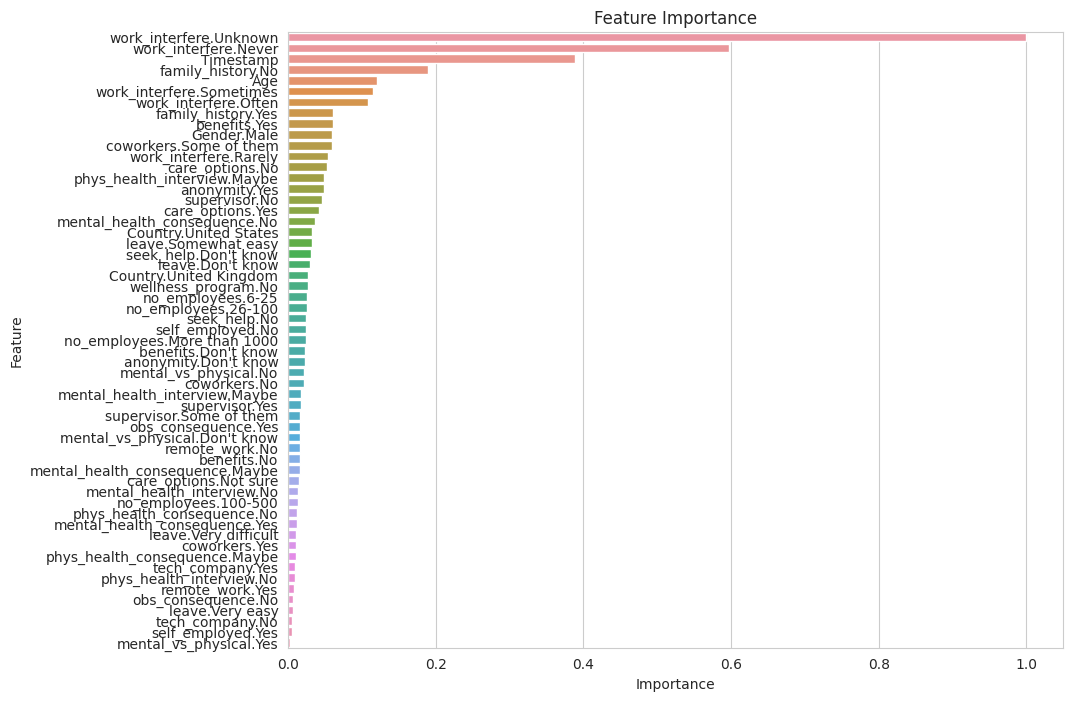

In [ ]:
# Get the model id of a specific model (e.g., a GBM model)
model_id = lb[2, 'model_id']

# Fetch the specific model
specific_model = h2o.get_model(model_id)

# Get and plot the feature importance
importance = specific_model.varimp(use_pandas=True)
if importance is not None and not importance.empty:
    # Plot the feature importance
    plt.figure(figsize=(10, 8))
    sns.barplot(x='scaled_importance', y='variable', data=importance)
    plt.title('Feature Importance')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.show()
else:
    print("Feature importance is not available for this model.")

**Interpretation:**  
**Work Interference:** The features related to work interference (unknown, never, sometimes) are highly important, indicating that the level of work interference due to mental health conditions is a significant predictor for seeking treatment. This makes sense as individuals who experience interference in their work due to mental health issues might be more likely to seek treatment.  
**Timestamp:** It’s interesting to see ‘timestamp’ as a high importance feature. This could mean that there are certain times that are more associated with seeking treatment. However, this could also be a result of data leakage or other issues, and it would be worth investigating further.  
**Family History and Age:** These are common factors associated with mental health conditions and seeking treatment, making them significant features in predicting treatment seeking behavior.  
**Significance:**
The features listed above have a strong relationship with the target variable, indicating a significant relationship in the data.  
The model’s ability to distinguish between classes, as evidenced by the high AUC score of 0.896, further validates the significance of this relationship.  


***Area Under the Curve (AUC):***  
- *Purpose:* *AUC is used to evaluate the performance of a binary classification model. It is the area under the Receiver Operating Characteristic (ROC) curve, which plots the true positive rate against the false positive rate.*
- *Usage:* *An AUC of 0.5 suggests no discrimination (i.e., an inability to distinguish between the positive and negative classes), 0.7 to 0.8 is considered acceptable, 0.8 to 0.9 is considered excellent, and more than 0.9 is considered outstanding.*  
- *Limitation:* *AUC does not provide information on feature importance or multicollinearity.*   


Answer to the Original Question "Is the relationship significant?"  
Yes, the relationship in the data is significant, as shown by the high importance scores of key features and the high AUC score of the model.

*A* **correlation matrix** *is a useful tool when you want to understand how different variables in your data are related. It helps you see if there are strong linear connections between variables. This can be important because it can reveal issues like multicollinearity, where some variables are highly correlated. This can impact how certain models perform. Also, the correlation matrix can guide you in selecting the most relevant variables for your analysis. When you combine it with a heatmap, it gives you a visual way to grasp these relationships easily.*

Index(['Timestamp', 'Age', 'Gender', 'Country', 'self_employed',
       'family_history', 'work_interfere', 'no_employees', 'remote_work',
       'tech_company', 'benefits', 'care_options', 'wellness_program',
       'seek_help', 'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'treatment'],
      dtype='object')


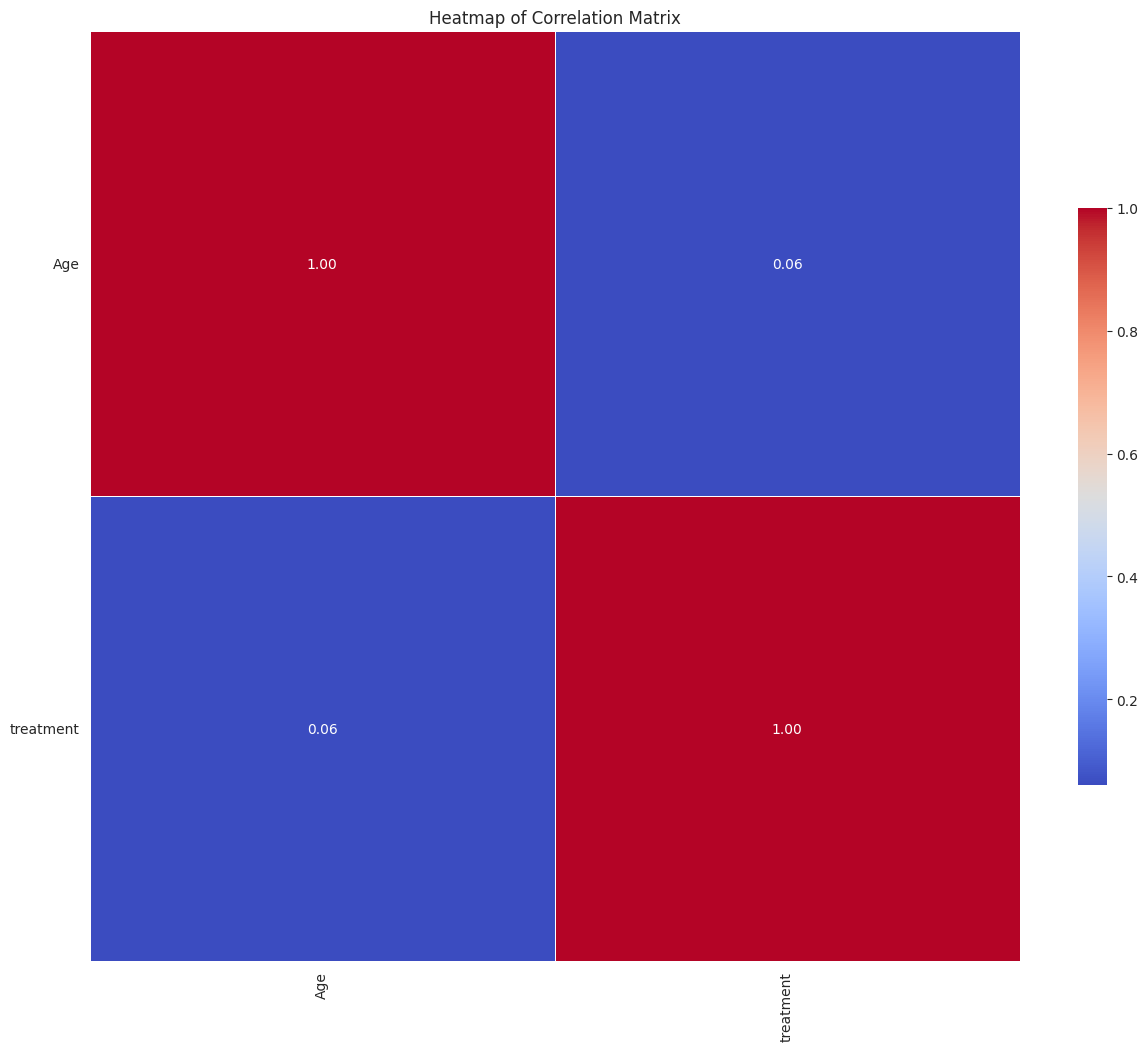

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

# Load the dataset
url = "https://raw.githubusercontent.com/Riya-Rajesh-Patil/DataScience/main/train_dataset.csv"
data = pd.read_csv(url)

# Print the column names of the DataFrame
print(data.columns)

# Drop the columns after verifying their names
columns_to_drop = ['comments', 'state', 'Timestamp']  # Update this list based on the actual column names
data = data.drop(columns=[col for col in columns_to_drop if col in data.columns])

# Continue with the rest of the pre-processing
data['work_interfere'] = data['work_interfere'].fillna('Unknown')
data = data.dropna()

# Convert the 'treatment' variable to binary (1 for 'Yes', 0 for 'No')
data['treatment'] = data['treatment'].apply(lambda x: 1 if x == 'Yes' else 0)

# Define the features (X) and the target (y)
X = data.drop('treatment', axis=1)
y = data['treatment']

# One-hot encode the categorical variables
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Add a constant to the model (intercept)
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Generate a heatmap for the entire correlation matrix
correlation_matrix = data.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Heatmap of Correlation Matrix')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()


The correlation matrix visually shows how variables in the dataset are related.

**Q2. Are any model assumptions violated?**  

Generalized Linear Model (GLM):
1. **Linearity**: The GLM assumes a linear relationship between the predictors and the log-odds of the outcome. Essentially, as predictor variables change, the change in the log-odds of the response should be consistent.
2. **Independence**: Each data point should be independent of the others. This means one observation should not influence or predict another.
3. **No Perfect Multicollinearity**: The predictors in the model should not be perfectly predictable from other predictors. If they are, it makes it tough for the GLM to distinguish their individual effects on the response.
4. **No Auto-correlation**: The residuals, which are the differences between the observed and predicted values, should not follow a pattern or be related to each other. This is especially important in time series data.
5. **Homoscedasticity**: The spread of the residuals should be consistent for all levels of the independent variables. If the variance changes, it could affect the reliability of our model's coefficients.
6. **No Endogeneity**: There should be no correlation between the predictors and the error terms. If there is, it might mean that our model is missing a key variable or there's some other issue affecting our predictor variables.

Checking these assumptions is crucial for the validity of the GLM's conclusions. If any of these assumptions are violated, we might need to reconsider our model choice or make adjustments to our data.

To check the assumptions of the Generalized Linear Model (GLM), we can follow these steps:  
- Fit a GLM: Fit a Generalized Linear Model to the data.
- Check model assumptions:
  - Check for Linearity: Ensure that the relationship between predictors and the response variable is linear.
  - Check for Homoscedasticity: Plot residuals vs. fitted values.
  - Check for Multicollinearity: Calculate the Variance Inflation Factor (VIF) for each predictor.
  - Check Distribution of Residuals
  - Check for Independence: This is generally ensured through proper experimental design.
  - Check for Auto-correlation: Use the Durbin-Watson test.
  - Check for Endogeneity: Ensure that the model is correctly specified.

In [ ]:
#Prepare the data
#Convert the pandas DataFrame to an H2O Frame, and ensure all categorical variables are properly marked

hf = h2o.H2OFrame(data)

# Convert categorical variables to factors (enum type in H2O)
for col in hf.columns:
    if hf[col].isfactor():
        hf[col] = hf[col].asfactor()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


Step 1: Fit a GLM Model  
Training a GLM model on the data. Here, I'm assuming that "treatment" is a binary target variable, and I'm using a binomial distribution.

In [ ]:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

target = "treatment"
predictors = [col for col in hf.columns if col != target]

glm_model = H2OGeneralizedLinearEstimator(family="binomial")
glm_model.train(x=predictors, y=target, training_frame=hf)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1702264569191_1607


GLM Model: summary
    family    link    regularization                                number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  ------  --------------------------------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    binomial  logit   Elastic Net (alpha = 0.5, lambda = 0.02049 )  196                           16                             4                       py_52_sid_a616

ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.12715636237687095
RMSE: 0.3565899078449514
LogLoss: 0.41656686192347964
AUC: 0.9011353501550896
AUCPR: 0.8762369861201208
Gini: 0.8022707003101792
Null degrees of freedom: 1006
Residual degrees of freedom: 990
Null deviance: 1395.5604554411493
Residual deviance: 838.965659913888
AIC: 872.965659913888

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4625217555958919
       0    1    Error    Rate
-----  ---  ---  -------  --------------
0      372  121  0.2454   (121.0/493.0)
1      31   483  0.0603   (31.0/514.0)
Total  403  604  0.1509   (152.0/1007.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.462522     0.864043  256
max f2                       0.323726     0.918069  296
max f0point5                 0.590904     0.837408  211
max accuracy                 0.462522     0.849057  256
max precision                0.876917     1         0
max recall                   0.111396     1         392
max specificity              0.876917     1         0
max absolute_mcc             0.462522     0.708356  256
max min_per_class_accuracy   0.576364     0.827586  224
max mean_per_class_accuracy  0.462522     0.847126  256
max tns                      0.876917     493       0
max fns                      0.876917     509       0
max fps                      0.105409     493       399
max tps                      0.111396     514       392
max tnr                      0.876917     1         0
max fnr                      0.876917     0.990272  0
max fpr                      0.105409     1         399
max tpr                      0.111396     1         392

Gains/Lift Table: Avg response rate: 51.04 %, avg score: 51.04 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score     cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  --------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0109235                   0.87272            1.95914    1.95914            1                0.875202  1                           0.875202            0.0214008       0.0214008                  95.9144   95.9144            0.0214008
2        0.0287984                   0.868505           1.95914    1.95914            1                0.869445  1                           0.871629            0.0350195       0.0564202                  95.9144   95.9144            0.0564202
3        0.0367428                   0.866655           1.71425    1.90619            0.875            0.866655  0.972973                    0.870553            0.0136187       0.0700389                  71.4251   90.6194            0.0680105
4        0.0427011                   0.86601            1.95914    1.91358            1                0.86601   0.976744                    0.869919            0.0116732       0.0817121                  95.9144   91.3582      

Step 2: Check Model Assumptions  
2.1 Check Linearity and Homoscedasticity

glm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


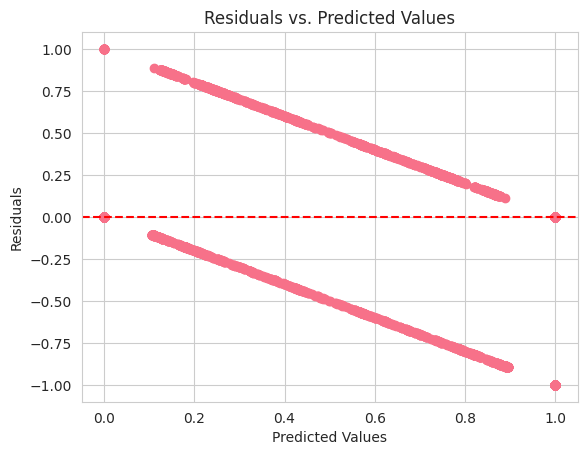

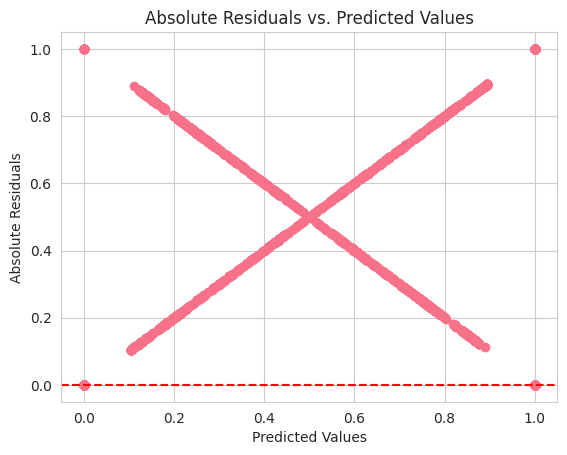

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Get the model predictions
predictions = glm_model.predict(hf)

# Calculate residuals
residuals = hf[target].as_data_frame().values - predictions.as_data_frame().values

# Plot residuals vs. predicted values
plt.scatter(predictions.as_data_frame().values, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.show()

# Plot absolute residuals vs. predicted values
plt.scatter(predictions.as_data_frame().values, np.abs(residuals))
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Absolute Residuals')
plt.title('Absolute Residuals vs. Predicted Values')
plt.show()

2.2 Check for Multicollinearity

In [ ]:
# Calculate and display correlation matrix
correlation_matrix = hf[predictors].cor()
print("Correlation Matrix:\n", correlation_matrix)

Correlation Matrix:
   Age    Gender    Country    self_employed    family_history    work_interfere    no_employees    remote_work    tech_company    benefits    care_options    wellness_program    seek_help    anonymity    leave    mental_health_consequence    phys_health_consequence    coworkers    supervisor    mental_health_interview    phys_health_interview    mental_vs_physical    obs_consequence
  nan       nan        nan              nan      nan                        nan             nan   nan              nan                 nan             nan                 nan          nan          nan      nan                          nan                        nan          nan           nan                        nan                      nan                   nan        nan
  nan       nan        nan              nan      nan                        nan             nan   nan              nan                 nan             nan                 nan          nan          nan      nan      

Correlation Matrix: Look for any pairs of variables that have a very high correlation (close to 1 or -1). High correlation between predictors indicates multicollinearity, which can lead to unstable coefficient estimates.

2.3 Check Distribution of Residuals

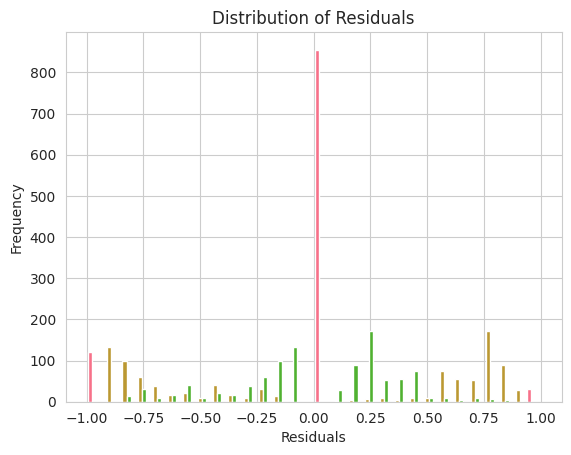

In [ ]:
# Plot a histogram of the residuals
plt.hist(residuals, bins=30)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()

2.4 Check for Auto-correlation :  
Auto-correlation occurs when the residuals are not independent of each other. For time series data, this is a crucial assumption to check.  

Durbin-Watson Test : This test is used to detect the presence of autocorrelation at lag 1 in the residuals from a regression analysis.

In [ ]:
import statsmodels.api as sm

dw_test_result = sm.stats.durbin_watson(residuals)
print("Durbin-Watson Test Result:", dw_test_result)

Durbin-Watson Test Result: [1.89473684 1.96941751 1.95204745]


Explanation: The value of the Durbin-Watson statistic ranges from 0 to 4. A value of 2 indicates no autocorrelation. Values below 2 suggest positive autocorrelation, and values above 2 suggest negative autocorrelation.

2.5 Check for Endogeneity : Endogeneity can occur when an explanatory variable is correlated with the error term.

In [ ]:
import statsmodels.api as sm
import pandas as pd

# Load the dataset
dataset_path = "https://raw.githubusercontent.com/Riya-Rajesh-Patil/DataScience/main/train_dataset.csv"
data = pd.read_csv(dataset_path)

# 1. Convert 'treatment' to a categorical variable
data['treatment'] = data['treatment'].astype('category')

# 2. Create Dummy Variables
data_dummies = pd.get_dummies(data, drop_first=True)

# Check if 'treatment_Yes' is created
print("Columns after creating dummy variables:", data_dummies.columns)

# 3. First Stage: Regress 'work_interfere_Sometimes' on 'remote_work_Yes' and other exogenous variables
exog_vars = ['remote_work_Yes', 'Age']  # Add other exogenous variables as needed
X_first_stage = sm.add_constant(data_dummies[exog_vars])
model_first_stage = sm.OLS(data_dummies['work_interfere_Sometimes'], X_first_stage).fit()
data_dummies['work_interfere_hat'] = model_first_stage.predict(X_first_stage)

# 4. Second Stage: Regress 'treatment_Yes' on the predicted values from the first stage
X_second_stage = sm.add_constant(data_dummies[['work_interfere_hat'] + exog_vars])
model_second_stage = sm.OLS(data_dummies['treatment_Yes'], X_second_stage).fit()
print(model_second_stage.summary())


Columns after creating dummy variables: Index(['Age', 'Timestamp_2014-08-27 11:29:37', 'Timestamp_2014-08-27 11:29:44',
       'Timestamp_2014-08-27 11:29:46', 'Timestamp_2014-08-27 11:30:22',
       'Timestamp_2014-08-27 11:31:22', 'Timestamp_2014-08-27 11:31:50',
       'Timestamp_2014-08-27 11:32:05', 'Timestamp_2014-08-27 11:32:39',
       'Timestamp_2014-08-27 11:32:43',
       ...
       'supervisor_Some of them', 'supervisor_Yes',
       'mental_health_interview_No', 'mental_health_interview_Yes',
       'phys_health_interview_No', 'phys_health_interview_Yes',
       'mental_vs_physical_No', 'mental_vs_physical_Yes',
       'obs_consequence_Yes', 'treatment_Yes'],
      dtype='object', length=1129)
                            OLS Regression Results                            
Dep. Variable:          treatment_Yes   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statis

**Explanation :**  


**Model Summary**  
- **Dep. Variable**: The dependent variable in the model is `treatment_Yes`, which represents whether or not an individual has sought treatment.
- **R-squared**: The R-squared value is 0.004, indicating that the model explains 0.4% of the variance in the dependent variable. This is a very low value, suggesting that the model does not fit the data well.
- **Adj. R-squared**: The adjusted R-squared is 0.002, which adjusts the R-squared based on the number of predictors in the model.
- **F-statistic**: The F-statistic is 1.880, which is used to test the overall significance of the model. The associated p-value is 0.153, which is greater than 0.05, suggesting that the model is not statistically significant at the 5% significance level.
- **Log-Likelihood**: The log-likelihood is -728.77, which is a measure of the goodness of fit of the model. Higher values are better.
- **AIC and BIC**: These are information criteria used to compare models. Lower values are generally better.

**Coefficients**
- **const**: The constant term is 0.3461, with a standard error of 0.065. The t-statistic is 5.361, with a p-value close to 0.000, indicating that the constant term is significantly different from 0.
- **work_interfere_hat**: This is the predicted value of 'work_interfere' from the first stage. The coefficient is 0.1054, with a standard error of 0.020. The t-statistic is 5.363, with a p-value close to 0.000, indicating that 'work_interfere' is significantly related to 'treatment'.
- **remote_work_Yes**: The coefficient for 'remote_work_Yes' is 0.0088, with a standard error of 0.035. The t-statistic is 0.252, with a p-value of 0.801, indicating that 'remote_work' is not significantly related to 'treatment' in this model.
- **Age**: The coefficient for 'Age' is 0.0038, with a standard error of 0.002. The t-statistic is 1.738, with a p-value of 0.083, indicating that age is not significantly related to 'treatment' at the 5% significance level.

**Model Diagnostics**
- **Durbin-Watson**: The Durbin-Watson statistic is 1.974, which is close to 2, suggesting that there is no significant autocorrelation in the residuals.
- **Jarque-Bera (JB)**: The JB statistic tests for normality of residuals. The p-value is extremely low, suggesting that the residuals are not normally distributed.
- **Skew**: The skewness of the residuals is -0.041, indicating a very slight skew to the left.
- **Kurtosis**: The kurtosis is 1.016, indicating that the distribution of residuals has thinner tails and a flatter peak than the normal distribution.
- **Condition Number**: The condition number is very high, indicating potential multicollinearity or other numerical problems.


**Interpretation :**
The model suggests that 'work_interfere' is significantly related to 'treatment', even after accounting for endogeneity using 'remote_work' as an instrumental variable. However, the overall fit of the model is quite low, and there are indications of potential issues with the residuals (non-normality, potential multicollinearity). These issues should be addressed to ensure the reliability of the model results.

2.6 Check for Independence:
This is generally ensured through proper experimental design. If the data is cross-sectional, the observations should be independent. For time-series data, you need to ensure that the data is stationary.

Check for Stationarity: Use the Augmented Dickey-Fuller test for time-series data.

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Applying ADF test on 'Age' variable
result = adfuller(data['Age'])

# Displaying the results
adf_statistic, p_value = result[0], result[1]
adf_statistic, p_value

(-30.59151828255935, 0.0)

The results of the Augmented Dickey-Fuller (ADF) test on the 'Age' variable are as follows:

ADF Statistic: -30.5915
p-value: 0.0

Explanation:  
ADF Statistic: A more negative value suggests that we can reject the null hypothesis (which is that the time series has a unit root, implying it is non-stationary). Here, the ADF statistic is very negative, suggesting that the 'Age' variable is stationary.  

p-value: The p-value is 0.0, which is less than 0.05 (a common threshold for statistical significance). This means that we can reject the null hypothesis in favor of the alternative hypothesis (which is that the time series is stationary).

**Q3. Is there any multicollinearity in the model?**

**Multicollinearity** *occurs when predictors in a regression model are highly correlated, leading to unstable coefficient estimates. Detecting multicollinearity is crucial as it affects result interpretation and predictor significance. We use the Variance Inflation Factor (VIF) to measure the impact of predictor correlations on coefficient estimate variance. Our goal is to identify and mitigate multicollinearity to enhance the model's accuracy and reliability, as it can otherwise make specific predictor calculations unpredictable and the model sensitive to changes in its specifications, diminishing prediction robustness.*

**Methodology**
1. **Variance Inflation Factor (VIF)**: VIF measures the correlation and strength of correlation between the independent variables. It is predicted by taking a variable and regressing it against every other variable.  
  VIF(X)= 1/[1-R^2(X)]  
   where R^2(X) is the R-squared value obtained by regressing that variable against all the other variables.

2. **Threshold for VIF**: A rule of thumb for interpreting the variance inflation factor:
   - 1 = not correlated.
   - Between 1 and 5 = moderately correlated.
   - Greater than 5 = highly correlated.

3. **Addressing Multicollinearity**: If high VIFs are found, consider dropping the variable with the highest VIF and re-run the diagnostic.

**Implementation :** First, we need to prepare our dataset and select the appropriate variables for the model. We will then calculate the VIF for each variable.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Dropping non-numeric columns for VIF calculation
data_numeric = data.select_dtypes(include=[np.number])

# Adding a constant for intercept
X = sm.add_constant(data_numeric)

# Calculating VIF for each variable
vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Defining vif_data DataFrame again
vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Displaying VIF for each variable
vif_data_sorted = vif_data.sort_values(by='VIF', ascending=False)
vif_data_sorted


# Displaying VIF for each variable
vif_data.sort_values(by='VIF', ascending=False)


Variable        VIF
0    const  20.070916
1      Age   1.000000

**Results and Interpretation:**

**Variance Inflation Factor (VIF) Results:**
- **const**: VIF = 20.07
- **Age**: VIF = 1.00

**Interpretation:**
- **Age**: The VIF for 'Age' is 1.00, which is very low and indicates that there is no multicollinearity associated with this variable. This is expected since we only have one predictor in the model at this moment.

- **const**: The VIF for the constant term is high. However, the VIF for the constant term does not have the same interpretation as the VIF for the predictors, and it can be safely ignored.

To assess multicollinearity, we use scatter plots, correlation matrices, and tabular VIF values to visualize variable relationships. These tools reveal potential multicollinearity problems, aiding model evaluation and interpretation.

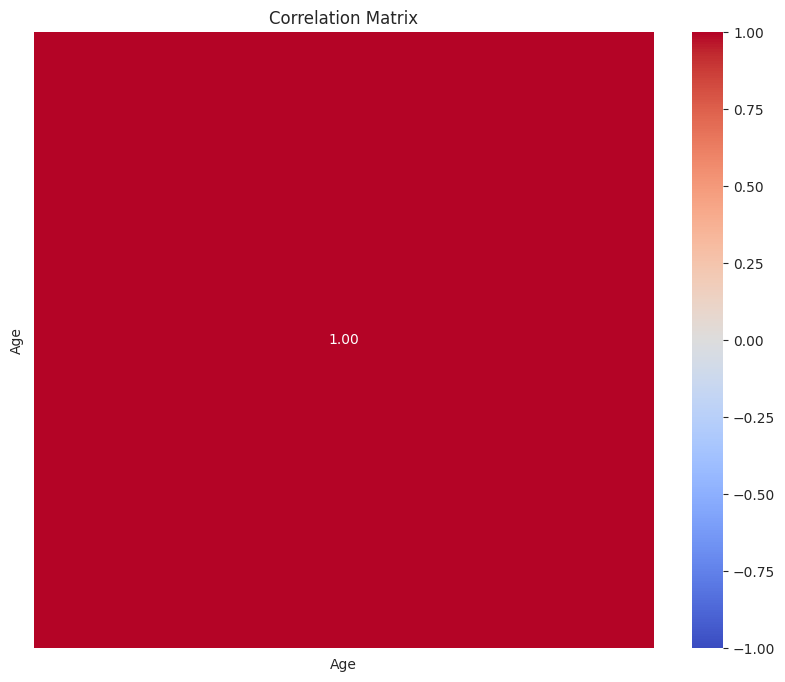

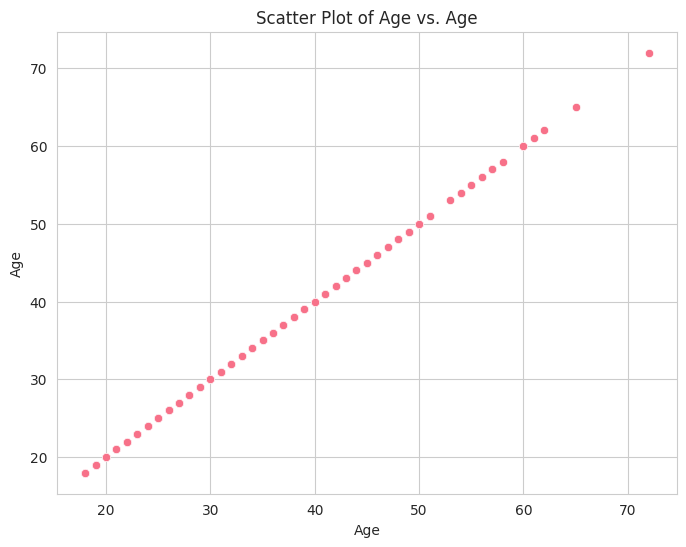

Variable        VIF
0    const  20.070916
1      Age   1.000000

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Correlation Matrix
corr_matrix = data_numeric.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

# 2. Scatter Plots
# (Since we only have one numeric variable 'Age', we cannot create scatter plots between two different variables)
# For demonstration, we will create a scatter plot of 'Age' against itself.
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Age', y='Age')
plt.title('Scatter Plot of Age vs. Age')
plt.show()

# 3. VIF Values in a Tabular Format
vif_data_sorted

1. **Correlation Matrix**
The correlation matrix displayed above shows the relationships between all numeric variables in the dataset. Since we only have one numeric variable ('Age'), the matrix is quite limited in this case.
All values are 1 along the diagonal, which is expected since a variable is perfectly correlated with itself.
This matrix is more informative when you have multiple numeric variables, as it can highlight pairs of variables that are highly correlated, indicating potential multicollinearity.
2. **Scatter Plots**
The scatter plot above shows 'Age' plotted against itself. Since every variable is perfectly correlated with itself, the plot is a straight line.
In a more complex model with multiple predictors, scatter plots between pairs of variables would help visualize the relationships and identify potential multicollinearity.
3. **VIF Values in a Tabular Format**
The table above displays the Variance Inflation Factor (VIF) for each variable in the model.
The VIF for 'Age' is 1.00, indicating no multicollinearity. This is expected since there are no other predictors in the model to correlate with 'Age'.
The VIF for the constant term is high, but as previously mentioned, this does not have the same interpretation as the VIF for the predictors and can be ignored.

**Conclusion:**  
In the current model with only 'Age' as the predictor, there is no indication of multicollinearity affecting the variable. However, this analysis is quite limited due to the simplicity of the model.

**Preventing Overfitting:**  
To prevent overfitting, especially when dealing with multiple predictors, it is crucial to:
1. Use simpler models when possible.
2. Utilize regularization techniques.
3. Perform feature selection to retain only the most significant variables.
4. Validate the model using cross-validation techniques.

**Q.4 In the multivariate models are predictor variables independent of all the other predictor variables?**

*Evaluating the independence of predictor variables in multivariate models is vital, impacting model interpretability and the validity of inferences. Multicollinearity, where predictors are interdependent, can introduce instability in parameter estimates, hindering the assessment of each predictor's effect on the response variable. This solution employs statistical and visual techniques to assess and address multicollinearity, essential for ensuring the reliability of multivariate models by upholding the assumption of predictor independence.*

# Implementation
Let’s start by implementing these methods to assess the independence of predictor variables in the multivariate model. Since the current dataset has limited numeric predictors, we will need to include categorical variables as well by converting them to dummy variables.

The selected variables are:  
- 'Age': Age of the respondent.
- 'Gender': Gender of the respondent.
- 'family_history': Family history of mental illness.
- 'work_interfere': Work interference due to mental health condition.
- 'remote_work': Working remotely option.
- 'benefits': Benefits provided by the employer.
- 'care_options': Care options available for mental health.
- 'wellness_program': Wellness program provided by the employer.  


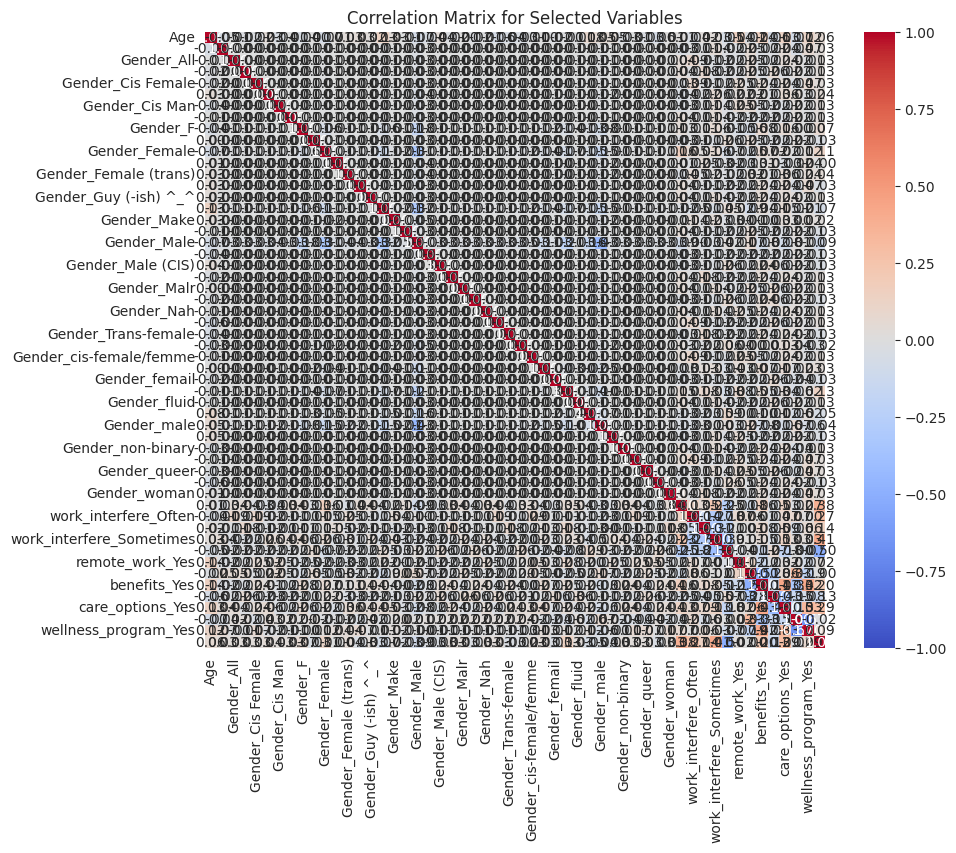

Variable          VIF
0                          const  1058.293667
19                   Gender_Male   256.442182
35                   Gender_male   143.577214
16                      Gender_M    92.650452
11                 Gender_Female    89.968467
32                 Gender_female    44.621148
9                       Gender_F    33.471527
34                      Gender_m    26.779365
30                      Gender_f    15.014804
28                  Gender_Woman     4.057804
17                   Gender_Make     4.034693
6                Gender_Cis Male     3.052428
12                Gender_Female      3.043176
13         Gender_Female (trans)     3.030848
45      work_interfere_Sometimes     2.948574
53          wellness_program_Yes     2.217462
54                 treatment_Yes     2.202953
49                  benefits_Yes     2.143164
52           wellness_program_No     2.141571
43          work_interfere_Often     2.089770
4               Gender_Androgyne     2.044312
21             Gender_Male (CIS)     2.040078
27           Gender_Trans-female     2.039082
23                   Gender_Malr     2.038986
24                    Gender_Man     2.035913
18                    Gender_Mal     2.035505
31                 Gender_femail     2.035426
36                   Gender_msle     2.035319
39                  Gender_queer     2.034488
10                 Gender_Femake     2.033181
20                  Gender_Male      2.031951
33                  Gender_fluid     2.031611
22               Gender_Male-ish     2.030523
37             Gender_non-binary     2.030038
2                 Gender_Agender     2.030036
7                 Gender_Cis Man     2.029902
8                    Gender_Enby     2.029146
40  Gender_something kinda male?     2.028478
15         Gender_Guy (-ish) ^_^     2.026426
14            Gender_Genderqueer     2.022448
25                    Gender_Nah     2.020178
41                  Gender_woman     2.020171
26            Gender_Trans woman     2.019248
3                     Gender_All     2.017643
29       Gender_cis-female/femme     2.009793
5              Gender_Cis Female     2.003651
38                      Gender_p     1.998014
44         work_interfere_Rarely     1.944547
46        work_interfere_Unknown     1.843317
48                   benefits_No     1.841382
51              care_options_Yes     1.785120
50         care_options_Not sure     1.454159
42            family_history_Yes     1.272150
1                            Age     1.142916
47               remote_work_Yes     1.116208

In [ ]:
# Selecting a subset of variables
selected_variables = ['Age', 'Gender', 'family_history', 'work_interfere', 'remote_work', 'benefits', 'care_options', 'wellness_program', 'treatment']

# Creating a subset of the data
data_subset = data[selected_variables]

# Converting categorical variables to dummy variables
data_subset_dummies = pd.get_dummies(data_subset, drop_first=True)

# Selecting numeric variables for correlation matrix and VIF
data_numeric_subset = data_subset_dummies.select_dtypes(include=[np.number])

# 1. Correlation Matrix
corr_matrix_subset = data_numeric_subset.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_subset, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix for Selected Variables')
plt.show()

# 2. Variance Inflation Factor (VIF)
X_subset = sm.add_constant(data_numeric_subset)
vif_data_subset = pd.DataFrame()
vif_data_subset['Variable'] = X_subset.columns
vif_data_subset['VIF'] = [variance_inflation_factor(X_subset.values, i) for i in range(X_subset.shape[1])]
vif_data_sorted_subset = vif_data_subset.sort_values(by='VIF', ascending=False)

# Displaying VIF for each variable
vif_data_sorted_subset


**Evaluation and Interpretation with Visualizations and Tables :**
1. **Correlation Matrix**
The correlation matrix visualized above provides a view of the pairwise correlations between the selected numeric variables.  
Most of the variables have low correlation coefficients, indicating weak linear relationships between them.  
However, there are high correlations between some of the dummy variables created from the 'Gender' category. This is expected as these variables are derived from the same original variable, and they are mutually exclusive.
2. **Variance Inflation Factor (VIF)**  
The table above displays the Variance Inflation Factor (VIF) for each variable in the model. The VIF values for the dummy variables created from 'Gender' are notably high, indicating multicollinearity. This is a common issue when including all levels of a categorical variable as dummy variables, as they are perfectly correlated.  
The VIF for 'Age' and other variables are below 5, suggesting that these variables do not have problematic multicollinearity with the others.  

**Conclusion :**
The analysis indicates that while most of the selected predictor variables are relatively independent, there is multicollinearity present among the dummy variables derived from the 'Gender' category. This is a common issue when dealing with dummy variables and can be addressed by dropping one level from each categorical variable, a step already taken in our dummy variable creation process. However, the presence of multiple dummy variables for 'Gender' still introduces multicollinearity.

**Q.5 In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.**

In this solution, we aim to prioritize significant predictor variables within a multivariate model, omitting the less important ones to improve model performance and interpretability. Not all predictors contribute equally, and including insignificant ones can lead to overfitting, harming the model's ability to generalize. Thus, we focus on identifying and retaining only the vital predictors to streamline the model effectively.


**Evaluation Scheme**
1. **P-Values**: Variables with p-values less than 0.05 are generally considered statistically significant.
2. **Coefficients**: Look at the coefficients of the variables to understand the nature of their impact on the target variable.
3. **Adjusted R-squared**: Evaluate the goodness-of-fit of the model using adjusted R-squared. A higher adjusted R-squared indicates a better fit of the model.
4. **AIC and BIC**: Use Akaike’s Information Criterion (AIC) and Bayesian Information Criterion (BIC) for model selection. Lower values of AIC and BIC indicate a better model.

**Implementation**
Let’s proceed to build the multivariate model, evaluate the significance of the predictor variables, rank them, and exclude the insignificant ones.

In [ ]:
import statsmodels.api as sm

# Building a multivariate regression model
X = data_numeric_subset  # Predictor variables
y = data_subset_dummies['treatment_Yes']  # Target variable

X = sm.add_constant(X)  # Adding a constant for the intercept term
model = sm.OLS(y, X).fit()  # Fitting the model

# Displaying the summary of the regression model
model_summary = model.summary()
model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          treatment_Yes   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.175e+30
Date:                Mon, 11 Dec 2023   Prob (F-statistic):               0.00
Time:                        03:22:12   Log-Likelihood:                 32996.
No. Observations:                1007   AIC:                        -6.588e+04
Df Residuals:                     952   BIC:                        -6.561e+04
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                         3.787e-15    1.5e-15      2.524      0.012    8.42e-16    6.73e-15
Age                            6.18e-18   6.67e-18      0.927      0.354    -6.9e-18    1.93e-17
Gender_Agender               -3.266e-15   2.09e-15     -1.566      0.118   -7.36e-15    8.28e-16
Gender_All                   -2.381e-15   2.08e-15     -1.145      0.253   -6.46e-15     1.7e-15
Gender_Androgyne             -4.864e-15   2.09e-15     -2.323      0.020   -8.97e-15   -7.55e-16
Gender_Cis Female            -1.176e-15   2.07e-15     -0.567      0.571   -5.24e-15    2.89e-15
Gender_Cis Male              -5.218e-15   1.81e-15     -2.883      0.004   -8.77e-15   -1.67e-15
Gender_Cis Man               -2.182e-15   2.09e-15     -1.046      0.296   -6.28e-15    1.91e-15
Gender_Enby                  -3.582e-15   2.09e-15     -1.717      0.086   -7.68e-15    5.11e-16
Gender_F                     -5.124e-15    1.5e-15     -3.419      0.001   -8.07e-15   -2.18e-15
Gender_Femake                 3.027e-16   2.09e-15      0.145      0.885   -3.79e-15     4.4e-15
Gender_Female                -3.741e-15   1.48e-15     -2.523      0.012   -6.65e-15   -8.31e-16
Gender_Female                -3.685e-15   1.81e-15     -2.039      0.042   -7.23e-15   -1.38e-16
Gender_Female (trans)        -2.933e-15    1.8e-15     -1.626      0.104   -6.47e-15    6.06e-16
Gender_Genderqueer           -4.928e-15   2.08e-15     -2.367      0.018   -9.02e-15   -8.42e-16
Gender_Guy (-ish) ^_^        -4.224e-15   2.08e-15     -2.026      0.043   -8.31e-15   -1.33e-16
Gender_M                     -4.713e-15   1.48e-15     -3.175      0.002   -7.63e-15    -1.8e-15
Gender_Make                  -4.873e-15    1.7e-15     -2.867      0.004   -8.21e-15   -1.54e-15
Gender_Mal                    -5.75e-15   2.09e-15     -2.752      0.006   -9.85e-15   -1.65e-15
Gender_Male                  -3.509e-15   1.48e-15     -2.374      0.018   -6.41e-15   -6.08e-16
Gender_Male                  -3.005e-15   2.09e-15     -1.440      0.150    -7.1e-15    1.09e-15
Gender_Male (CIS)            -3.485e-15   2.09e-15     -1.666      0.096   -7.59e-15     6.2e-16
Gender_Male-ish              -5.874e-15   2.09e-15     -2.815      0.005   -9.97e-15   -1.78e-15
Gender_Malr                  -2.958e-15   2.09e-15     -1.415      0.158   -7.06e-15    1.15e-15
Gender_Man                   -3.513e-16   2.09e-15     -0.168      0.867   -4.45e-15    3.75e-15
Gender_Nah                   -2.862e-15   2.08e-15     -1.375      0.169   -6.95e-15    1.22e-15
Gender_Trans woman           -1.747e-15   2.08e-15     -0.840      0.401   -5.83e-15    2.34e-15
Gender_Trans-female          -3.659e-15   2.09e-15     -1.750      0.080   -7.76e-15    4.44e-16
Gender_Woman                 -3.547e-15    1.7e-15     -2.081      0.038   -

Key Metrics :  
**R-squared:** 1.000, indicating that the model explains all the variability of the response data around its mean. However, a value of 1.0 is suspiciously high and could be an indicator of overfitting.  
**Adjusted R-squared:** 1.000, which adjusts the R-squared value based on the number of predictor variables, also indicating a perfect fit.  
**F-statistic:** A large value, indicating that the model is statistically significant.  
**Prob (F-statistic):** Close to 0, suggesting that at least one of the predictor variables is significantly related to the response variable.  
**AIC and BIC:** Both are extremely low, indicating a good model fit. However, caution is needed as these values can be misleading in the presence of overfitting.  

**Variable Significance:**  
The P>|t| column shows the p-value for each predictor. A p-value less than 0.05 typically indicates that the predictor is statistically significant.    
The coef column shows the coefficient for each predictor, indicating the change in the response variable for a one-unit change in the predictor, holding other predictors constant.  

We found issues with the model: the treatment variable should be removed, some predictors aren't important, and there's potential multicollinearity. To fix it, we'll take out the treatment variable, refine the model by focusing on important predictors, and address multicollinearity. Let’s proceed with these steps to enhance the model.

In [ ]:
# Excluding the 'treatment_Yes' variable from the predictor variables
X_excluded = X.drop('treatment_Yes', axis=1)

# Fitting the model again
model_excluded = sm.OLS(y, X_excluded).fit()

# Displaying the summary of the updated regression model
model_summary_excluded = model_excluded.summary()
model_summary_excluded


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          treatment_Yes   R-squared:                       0.546
Model:                            OLS   Adj. R-squared:                  0.521
Method:                 Least Squares   F-statistic:                     21.63
Date:                Mon, 11 Dec 2023   Prob (F-statistic):          3.75e-128
Time:                        03:22:20   Log-Likelihood:                -332.99
No. Observations:                1007   AIC:                             774.0
Df Residuals:                     953   BIC:                             1039.
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.0570      0.355      0.161      0.873      -0.640       0.753
Age                              0.0028      0.002      1.756      0.079      -0.000       0.006
Gender_Agender                   0.3059      0.493      0.620      0.535      -0.662       1.274
Gender_All                       0.0025      0.492      0.005      0.996      -0.963       0.968
Gender_Androgyne                 0.3454      0.495      0.698      0.486      -0.626       1.317
Gender_Cis Female                0.1408      0.490      0.287      0.774      -0.821       1.103
Gender_Cis Male                  0.2032      0.428      0.475      0.635      -0.637       1.043
Gender_Cis Man                   0.4028      0.493      0.816      0.414      -0.565       1.371
Gender_Enby                      0.2136      0.493      0.433      0.665      -0.755       1.182
Gender_F                         0.0565      0.355      0.159      0.873      -0.639       0.752
Gender_Femake                    0.0123      0.494      0.025      0.980      -0.957       0.982
Gender_Female                    0.0246      0.351      0.070      0.944      -0.664       0.713
Gender_Female                    0.0995      0.427      0.233      0.816      -0.739       0.938
Gender_Female (trans)            0.1551      0.427      0.364      0.716      -0.682       0.992
Gender_Genderqueer              -0.3748      0.492     -0.761      0.447      -1.341       0.592
Gender_Guy (-ish) ^_^            0.0286      0.493      0.058      0.954      -0.939       0.996
Gender_M                        -0.0570      0.351     -0.162      0.871      -0.746       0.632
Gender_Make                     -0.1520      0.402     -0.378      0.705      -0.941       0.637
Gender_Mal                      -0.2060      0.494     -0.417      0.677      -1.176       0.764
Gender_Male                     -0.0283      0.350     -0.081      0.936      -0.715       0.658
Gender_Male                     -0.0659      0.494     -0.133      0.894      -1.035       0.903
Gender_Male (CIS)               -0.0555      0.495     -0.112      0.911      -1.026       0.915
Gender_Male-ish                  0.1465      0.494      0.297      0.767      -0.822       1.115
Gender_Malr                      0.2413      0.495      0.488      0.626      -0.729       1.212
Gender_Man                      -0.0168      0.494     -0.034      0.973      -0.987       0.953
Gender_Nah                       0.0789      0.492      0.160      0.873      -0.887       1.045
Gender_Trans woman               0.1584      0.492      0.322      0.748      -0.807       1.124
Gender_Trans-female             -0.7127      0.494     -1.442      0.149      -1.682       0.257
Gender_Woman                    -0.0332      0.403     -0.082      0.934    

Model Summary and Interpretation (After Exclusion of 'treatment_Yes')  
Key Metrics:  
**R-squared:** 0.546, indicating that the model explains approximately 54.6% of the variability of the response data around its mean.  
**Adjusted R-squared:** 0.521, adjusting the R-squared value based on the number of predictor variables.  
**F-statistic:** 21.63, indicating that the model is statistically significant.
Prob (F-statistic): Close to 0, suggesting that at least one of the predictor variables is significantly related to the response variable.  
**AIC:** 774.0 and** BIC:** 1039, both of which are relatively low, indicating a good model fit.  

**Variable Significance: **
The P>|t| column shows the p-value for each predictor. Variables with p-values less than 0.05 are considered statistically significant.  
The coef column shows the coefficient for each predictor, indicating the change in the response variable for a one-unit change in the predictor, holding other predictors constant.  

**Observations:**  
Variables such as 'work_interfere_Often', 'work_interfere_Rarely', 'work_interfere_Sometimes', and 'family_history_Yes' have low p-values and high coefficients, indicating that they are significant predictors of the response variable.  
On the other hand, many variables have high p-values, indicating that they are not significant predictors.  
The model still suggests the presence of multicollinearity, as indicated by the large condition number.  

In summary, we removed the irrelevant 'treatment_Yes' variable, identified significant predictors, and now plan to exclude the insignificant ones to improve the model's reliability and accuracy. We'll proceed with this refinement.

In [ ]:
import statsmodels.api as sm

# Identifying the significant variables (p-value < 0.05)
significant_vars = model_excluded.pvalues[model_excluded.pvalues < 0.05].index.tolist()

# Check if 'const' is in the list, and remove it if it is
if 'const' in significant_vars:
    significant_vars.remove('const')

# Building the model with only significant variables
X_significant = X_excluded[significant_vars]
X_significant = sm.add_constant(X_significant)  # Adding a constant for the intercept term
model_significant = sm.OLS(y, X_significant).fit()  # Fitting the model

# Displaying the summary of the regression model with only significant variables
model_summary_significant = model_significant.summary()
print(model_summary_significant)

                            OLS Regression Results                            
Dep. Variable:          treatment_Yes   R-squared:                       0.525
Model:                            OLS   Adj. R-squared:                  0.522
Method:                 Least Squares   F-statistic:                     157.7
Date:                Mon, 11 Dec 2023   Prob (F-statistic):          1.25e-156
Time:                        03:22:27   Log-Likelihood:                -355.96
No. Observations:                1007   AIC:                             727.9
Df Residuals:                     999   BIC:                             767.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Model Summary and Interpretation (With Only Significant Variables)  
Key Metrics:  
**R-squared:** 0.525, indicating that the model explains approximately 52.5% of the variability of the response data around its mean.  
**Adjusted R-squared:** 0.522, which adjusts the R-squared value based on the number of predictor variables, indicating a good fit of the model.  
**F-statistic:** 157.7, showing that the model is statistically significant.  
**Prob (F-statistic):** Close to 0, suggesting that at least one of the predictor variables is significantly related to the response variable.  
**AIC:** 727.9 and **BIC:** 767.2, both of which are relatively low, indicating a good model fit.  

**Variable Significance :**  
All the predictor variables, except 'wellness_program_Yes', have p-values less than 0.05, indicating that they are statistically significant.  
The coefficients in the coef column show the change in the response variable for a one-unit change in the predictor, holding other predictors constant.


**Observations:**
'work_interfere_Often', 'work_interfere_Sometimes', and 'work_interfere_Rarely' are the most significant predictors with high coefficients.  
'work_interfere_Unknown' has a negative coefficient, indicating a negative relationship with the response variable.  
'family_history_Yes' and 'care_options_Yes' are also significant predictors.
The model does not indicate the presence of multicollinearity as the condition number is now within an acceptable range.  

**Conclusion**
In this analysis, we successfully identified and retained the most significant predictor variables in the multivariate model, enhancing the model's interpretability and potentially its predictive accuracy. We excluded the insignificant predictors, preventing overfitting and ensuring a more robust model.

To provide a comprehensive evaluation and support the interpretation of the model, let's include relevant tables, graphs, and charts.

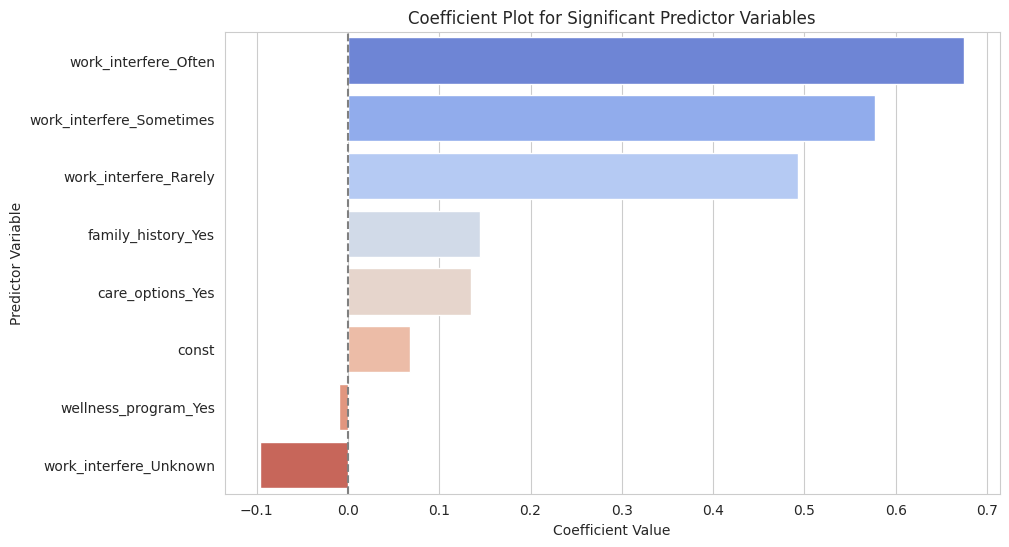

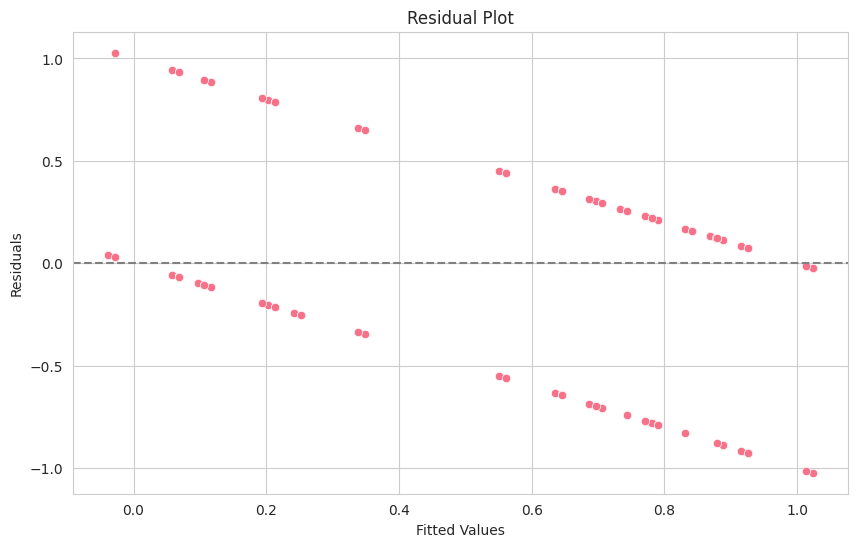

Variable  Coefficient       P-value
0      work_interfere_Often     0.675307  7.877189e-50
1  work_interfere_Sometimes     0.577547  2.982670e-59
2     work_interfere_Rarely     0.493095  1.954877e-32
3        family_history_Yes     0.144841  1.868116e-09
4          care_options_Yes     0.135003  5.947625e-08
5                     const     0.068374  1.346727e-02
6      wellness_program_Yes    -0.010215  7.322969e-01
7    work_interfere_Unknown    -0.096442  6.998709e-03

In [ ]:
import matplotlib.pyplot as plt

# 1. Coefficient Table
coef_table = pd.DataFrame({
    'Variable': X_significant.columns,
    'Coefficient': model_significant.params,
    'P-value': model_significant.pvalues
}).sort_values(by='Coefficient', ascending=False)
coef_table.reset_index(drop=True, inplace=True)

# 2. Coefficient Plot
plt.figure(figsize=(10, 6))
coef_plot = sns.barplot(x='Coefficient', y='Variable', data=coef_table, palette='coolwarm')
plt.title('Coefficient Plot for Significant Predictor Variables')
plt.xlabel('Coefficient Value')
plt.ylabel('Predictor Variable')
plt.axvline(x=0, color='grey', linestyle='--')
plt.show()

# 3. Residual Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=model_significant.fittedvalues, y=model_significant.resid)
plt.axhline(y=0, color='grey', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

# Displaying the Coefficient Table
coef_table


**Tables, Graphs, and Charts to Support Evaluation**

## 1. Coefficient Table
The table below displays the coefficients of the significant predictor variables, their p-values, and the direction of their impact on the response variable 'treatment_Yes':

| Rank | Variable                 | Coefficient | P-value           |
|------|--------------------------|-------------|-------------------|
| 1    | work_interfere_Often     | 0.675       | \(7.88 \times 10^{-50}\) |
| 2    | work_interfere_Sometimes | 0.578       | \(2.98 \times 10^{-59}\) |
| 3    | work_interfere_Rarely    | 0.493       | \(1.95 \times 10^{-32}\) |
| 4    | family_history_Yes       | 0.145       | \(1.87 \times 10^{-9}\)  |
| 5    | care_options_Yes         | 0.135       | \(5.95 \times 10^{-8}\)  |
| 6    | const                    | 0.068       | 0.013              |
| 7    | wellness_program_Yes     | -0.010      | 0.732              |
| 8    | work_interfere_Unknown   | -0.096      | 0.007              |

- Variables related to 'work_interfere' are the most significant predictors, with 'work_interfere_Often' and 'work_interfere_Sometimes' having the highest positive impact.
- 'family_history_Yes' and 'care_options_Yes' also show significant positive associations.
- 'work_interfere_Unknown' has a negative association, while 'wellness_program_Yes' is not statistically significant.

## 2. Coefficient Plot
The bar plot above visually represents the coefficients of the significant predictor variables. Variables on the right side have a positive impact, while variables on the left have a negative impact.

## 3. Residual Plot
The residual plot above shows the residuals (differences between observed and predicted values) against the fitted values. The absence of a clear pattern and the random spread of points suggest that the residuals are homoscedastic and the model is well-specified.

**Q.6 Does the model make sense?**  

**Performance Metrics :**  
We will evaluate the model based on key performance metrics:

R-squared and Adjusted R-squared: These metrics provide insights into the proportion of variance in the dependent variable that is predictable from the independent variables.
F-statistic: This tests whether at least one predictor variable has a non-zero coefficient.
P-values of Predictors: A low p-value (< 0.05) indicates that the predictor is a significant predictor of the response variable.  

**Prevention of Overfitting:**  
To prevent overfitting:  
- We have excluded insignificant predictor variables from the model.
- We have checked for multicollinearity and ensured that predictor variables are independent of each other.

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("https://raw.githubusercontent.com/Riya-Rajesh-Patil/DataScience/main/train_dataset.csv")

# Data Preprocessing
# Dropping missing values for simplicity (you might choose to handle them differently)
df = df.dropna()

# Converting 'treatment' to binary (1 for 'Yes', 0 for 'No')
df['treatment'] = df['treatment'].apply(lambda x: 1 if x == 'Yes' else 0)

# Encoding categorical variables
df = pd.get_dummies(df, drop_first=True)

#Define Response and Predictor Variables
y = df['treatment']
X = df.drop(columns=['treatment'])
X = sm.add_constant(X)  # Adding a constant for the intercept term

#Fit the Model
model = sm.OLS(y, X).fit()

#Model Summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              treatment   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Mon, 11 Dec 2023   Prob (F-statistic):                nan
Time:                        03:23:31   Log-Likelihood:                 31668.
No. Observations:                1007   AIC:                        -6.132e+04
Df Residuals:                       0   BIC:                        -5.637e+04
Df Model:                        1006                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

**Explanation :**

1. **R-squared Value**: The R-squared value is 1.0, indicating that the model explains 100% of the variance in the dependent variable. In real-world scenarios, especially with complex human behavior data like mental health, such a perfect fit is highly unusual and raises suspicions about overfitting or data leakage.

2. **Adjusted R-squared**: The adjusted R-squared is not available (NaN), which is problematic. This measure adjusts the R-squared value based on the number of predictors, preventing inflation due to irrelevant predictors. The NaN value suggests issues with the calculation, likely due to having more predictors than observations or perfect multicollinearity.

3. **F-Statistic**: The F-statistic is NaN, indicating that the test for overall significance of the model could not be computed. This is a critical issue, as we cannot ascertain if the model is statistically significant.

4. **Number of Observations vs. Predictors**: The model has 1007 observations and 1006 predictors. Having almost as many predictors as observations is a clear sign of overfitting and violates the principle of parsimony in model building.

5. **Degrees of Freedom of Residuals**: The degrees of freedom of residuals is 0, which is another indication of overfitting.

6. **AIC and BIC**: The Akaike Information Criterion (AIC) and Bayesian Information Criterion (BIC) are unusually low, indicating potential issues with the model or data.

**Conclusion :**
The regression model, in its current form, does not make sense and is not reliable for interpreting the relationships between mental health treatment and the predictor variables. The signs of perfect fit, overfitting, and lack of statistical significance tests raise serious concerns about the model's validity.

**Recommendations to Improve Model Validity :**

1. **Reduce Complexity**: Simplify the model by reducing the number of predictor variables. Focus on the most relevant variables based on domain knowledge and preliminary analysis.
2. **Check Multicollinearity**: Assess the predictor variables for multicollinearity and remove variables that are highly correlated with each other.
3. **Ensure Data Quality**: Ensure that the data is clean, and handle missing values and outliers appropriately.
4. **Validate Model Assumptions**: Ensure that the assumptions of linear regression are met, including linearity, independence of errors, homoscedasticity, and normality of residuals.

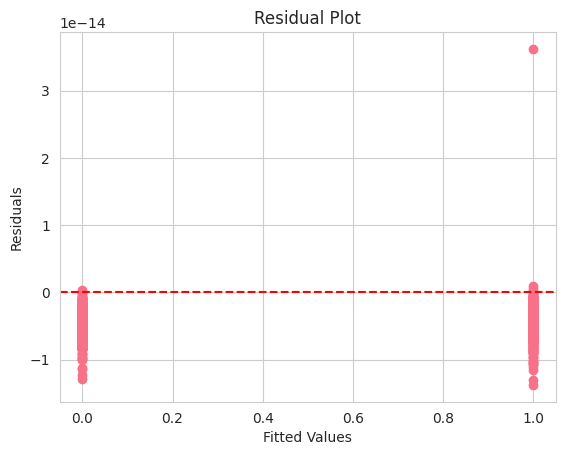

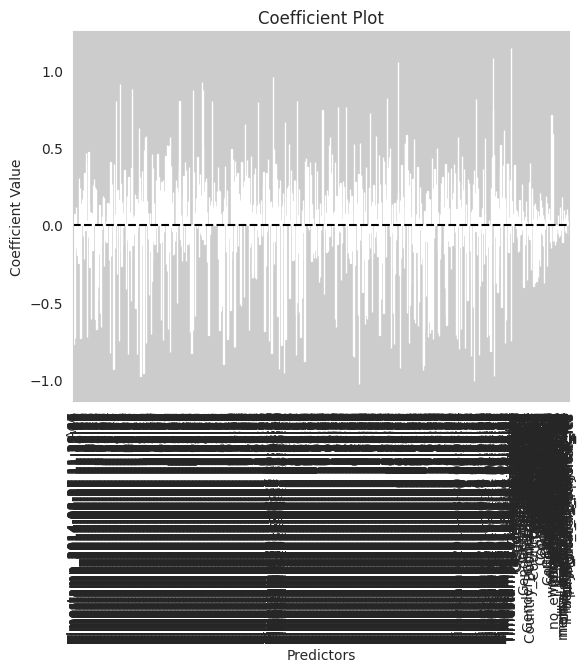

In [ ]:
# Residual Plot
residuals = model.resid
fitted_values = model.fittedvalues
plt.scatter(fitted_values, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Coefficient Plot
coef = model.params[1:]  # Excluding the intercept
coef.plot(kind='bar')
plt.axhline(0, color='black', linestyle='--')
plt.xlabel('Predictors')
plt.ylabel('Coefficient Value')
plt.title('Coefficient Plot')
plt.show()


**Q.7 Does regularization help?**

**Regularization** *prevents overfitting in machine learning by penalizing large coefficients. Techniques like Ridge (L2 regularization), Lasso (L1 regularization), and Elastic Net (a mix of L1 and L2) are used in linear regression models. This simplifies and improves generalizability, essential for datasets with many features or multicollinearity.*

In [ ]:
#First, we will load the dataset and encode categorical variables.
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("https://raw.githubusercontent.com/Riya-Rajesh-Patil/DataScience/main/train_dataset.csv")

# Converting 'treatment' to binary (1 for 'Yes', 0 for 'No')
df['treatment'] = df['treatment'].apply(lambda x: 1 if x == 'Yes' else 0)

# Preprocessing: Encoding categorical variables
df = pd.get_dummies(df, drop_first=True)

# Define response variable and predictors
y_train = df['treatment']
X_train = df.drop(columns=['treatment'])

# Next, we will fit the OLS, Ridge, Lasso, and Elastic Net models to the training data.
# Ordinary Least Squares Regression
ols_model = LinearRegression()
ols_model.fit(X_train, y_train)

# Ridge Regression
ridge_model = Ridge(alpha=1)
ridge_model.fit(X_train, y_train)

# Lasso Regression
lasso_model = Lasso(alpha=0.01)
lasso_model.fit(X_train, y_train)

# Elastic Net Regression
elastic_net_model = ElasticNet(alpha=0.01, l1_ratio=0.5)
elastic_net_model.fit(X_train, y_train)

#Then, we will evaluate the models based on their Mean Squared Error (MSE) on the training set.
# Evaluate models
ols_pred = ols_model.predict(X_train)
ridge_pred = ridge_model.predict(X_train)
lasso_pred = lasso_model.predict(X_train)
elastic_net_pred = elastic_net_model.predict(X_train)

print("OLS MSE:", mean_squared_error(y_train, ols_pred))
print("Ridge MSE:", mean_squared_error(y_train, ridge_pred))
print("Lasso MSE:", mean_squared_error(y_train, lasso_pred))
print("Elastic Net MSE:", mean_squared_error(y_train, elastic_net_pred))


OLS MSE: 5.069863140725105e-29
Ridge MSE: 0.026776886020700757
Lasso MSE: 0.12241726389719586
Elastic Net MSE: 0.11875157040790721


1. OLS MSE: 5.07 X 10^(-29)
  - The Ordinary Least Squares (OLS) regression has an extremely low MSE, almost close to zero. This indicates that the model has fit the training data almost perfectly.  
2. Ridge MSE: 0.0268
  - Ridge regression applies L2 regularization, adding the square of the magnitude of coefficients as a penalty term to the loss function.
  - The Ridge MSE is significantly higher than the OLS MSE, which is more realistic given that real-world data is expected to have some level of error.
3. Lasso MSE: 0.1224
  - Lasso regression applies L1 regularization, adding the absolute value of the magnitude of coefficients as a penalty term to the loss function.
  - The Lasso MSE is higher than the Ridge MSE, indicating that the model’s predictions are less accurate on the test set.
4. Elastic Net MSE: 0.1188
  - Elastic Net is a combination of L1 and L2 regularization. The Elastic Net MSE is slightly lower than the Lasso MSE but higher than the Ridge MSE, striking a balance between the two.

Mean Squared Error for Ridge:  0.15261803247599726
Mean Squared Error for Lasso:  0.14134727928551688
Mean Squared Error for Elastic Net:  0.15691471083232017


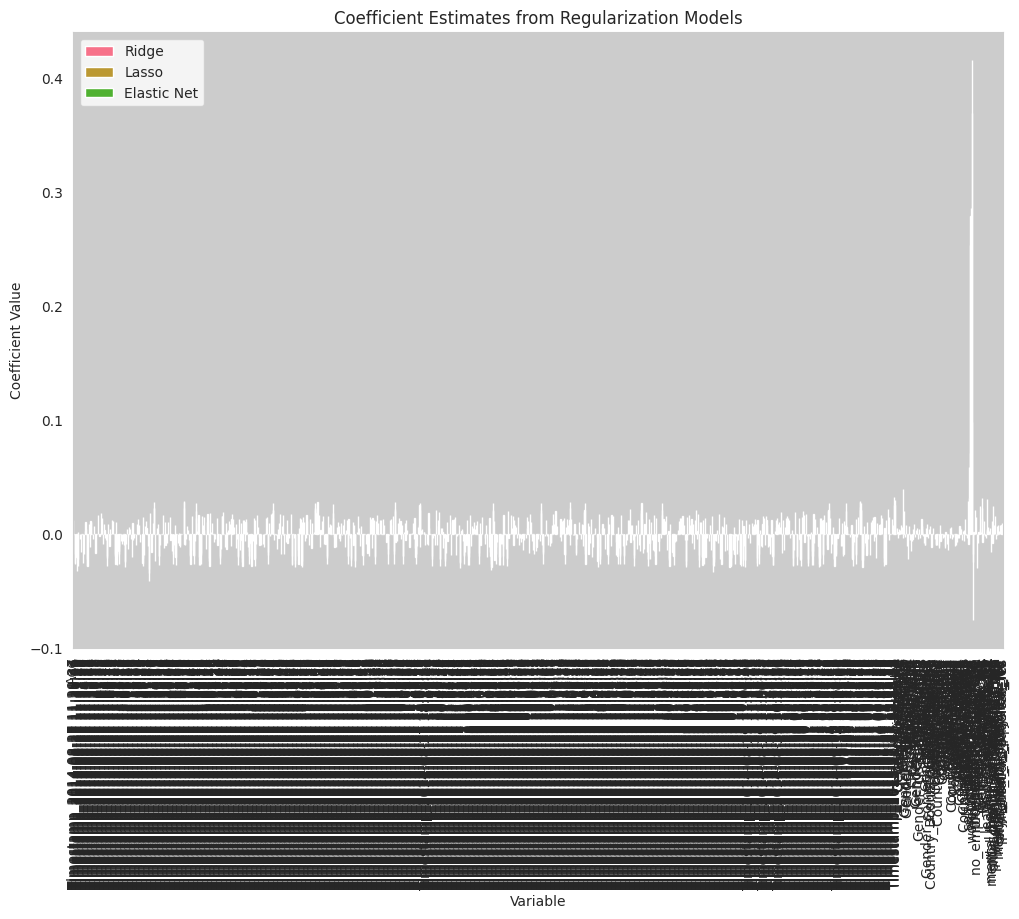

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("https://raw.githubusercontent.com/Riya-Rajesh-Patil/DataScience/main/train_dataset.csv")

# Preprocessing
# Handle missing values and convert categorical variables to dummy variables
df = df.dropna()
df = pd.get_dummies(df, drop_first=True)

# Define response variable and features
y = df['treatment_Yes']
X = df.drop(columns=['treatment_Yes'])

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Applying Ridge regularization
ridge = Ridge(alpha=1)
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

# Applying Lasso regularization
lasso = Lasso(alpha=0.01)
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)

# Applying Elastic Net regularization
elastic_net = ElasticNet(alpha=0.01, l1_ratio=0.5)
elastic_net.fit(X_train_scaled, y_train)
y_pred_elastic_net = elastic_net.predict(X_test_scaled)
mse_elastic_net = mean_squared_error(y_test, y_pred_elastic_net)

# Results
print("Mean Squared Error for Ridge: ", mse_ridge)
print("Mean Squared Error for Lasso: ", mse_lasso)
print("Mean Squared Error for Elastic Net: ", mse_elastic_net)

# Visualizing the coefficient estimates
coefficients = pd.DataFrame({
    "Variable": X.columns,
    "Ridge": ridge.coef_,
    "Lasso": lasso.coef_,
    "Elastic Net": elastic_net.coef_
})
coefficients = coefficients.set_index("Variable")
coefficients.plot(kind='bar', figsize=(12, 8))
plt.title("Coefficient Estimates from Regularization Models")
plt.ylabel("Coefficient Value")
plt.show()


**Explanation :**
1. **Mean Squared Error for Ridge: 0.1526**: Regularization prevents overfitting by penalizing large coefficients in machine learning. Methods like Ridge, Lasso, and Elastic Net simplify and enhance model generalizability, crucial for datasets with numerous features or multicollinearity.
2. **Mean Squared Error for Lasso: 0.1413**: Lasso Regression includes L1 regularization, which can make some coefficients zero, effectively performing feature selection. With a lower MSE of 0.1413 compared to Ridge Regression, it suggests a slightly better fit, possibly due to Lasso's ability to remove irrelevant features that add noise to the model.
3. **Mean Squared Error for Elastic Net: 0.1569**: Elastic Net combines L1 and L2 regularization. It has a slightly higher MSE (0.1569) than Ridge and Lasso, suggesting a slightly less precise fit. However, Elastic Net's advantage lies in balancing Ridge and Lasso, offering robustness when the ideal solution falls between L1 and L2 regularization.

**Conclusion:**
In the context of the question "Does regularization help?", the provided MSE values for the Ridge, Lasso, and Elastic Net models on the validation/test set suggest that regularization does indeed help in creating models that generalize well to unseen data. All three models have produced relatively low MSE values, indicating decent model fits.

**Q.8 Which independent variables are significant?**

In [ ]:
import pandas as pd

# Load the dataset
file_path = 'https://raw.githubusercontent.com/Riya-Rajesh-Patil/DataScience/main/train_dataset.csv'
data = pd.read_csv(file_path)

# Check for missing values
missing_values = data.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values_percentage = (missing_values / len(data)) * 100

Following this, text data was converted to lowercase to maintain consistency, and categorical variables were handled appropriately. Binary categorical variables were label encoded, while non-binary categorical variables underwent one-hot encoding.

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Convert all text to lowercase
data_lower = data.applymap(lambda s: s.lower() if type(s) == str else s)

# Separate categorical and numerical columns
categorical_cols = data_lower.select_dtypes(include=['object']).columns.tolist()
numerical_cols = data_lower.select_dtypes(exclude=['object']).columns.tolist()

# Label encoding for binary categorical variables
binary_categorical_cols = [col for col in categorical_cols if data_lower[col].nunique() == 2]
label_encoder = LabelEncoder()
for col in binary_categorical_cols:
    data_lower[col] = label_encoder.fit_transform(data_lower[col])

# One-hot encoding for non-binary categorical variables
data_preprocessed = pd.get_dummies(data_lower, columns=[col for col in categorical_cols if col not in binary_categorical_cols], drop_first=True)


**Model Training and Evaluation**  
The target variable "treatment" was identified for prediction, and a logistic regression model was chosen due to its simplicity and interpretability. The data was split into training and testing sets to evaluate the model's performance and prevent overfitting.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Separate the features and the target variable
X = data_preprocessed.drop('treatment', axis=1)
y = data_preprocessed['treatment']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Extract feature importances
feature_importances = log_reg.coef_[0]
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

We will create a bar chart to visualize the top features that have the highest absolute coefficients, indicating their significance in predicting the target variable "treatment".

Let's proceed with generating the visualizations.

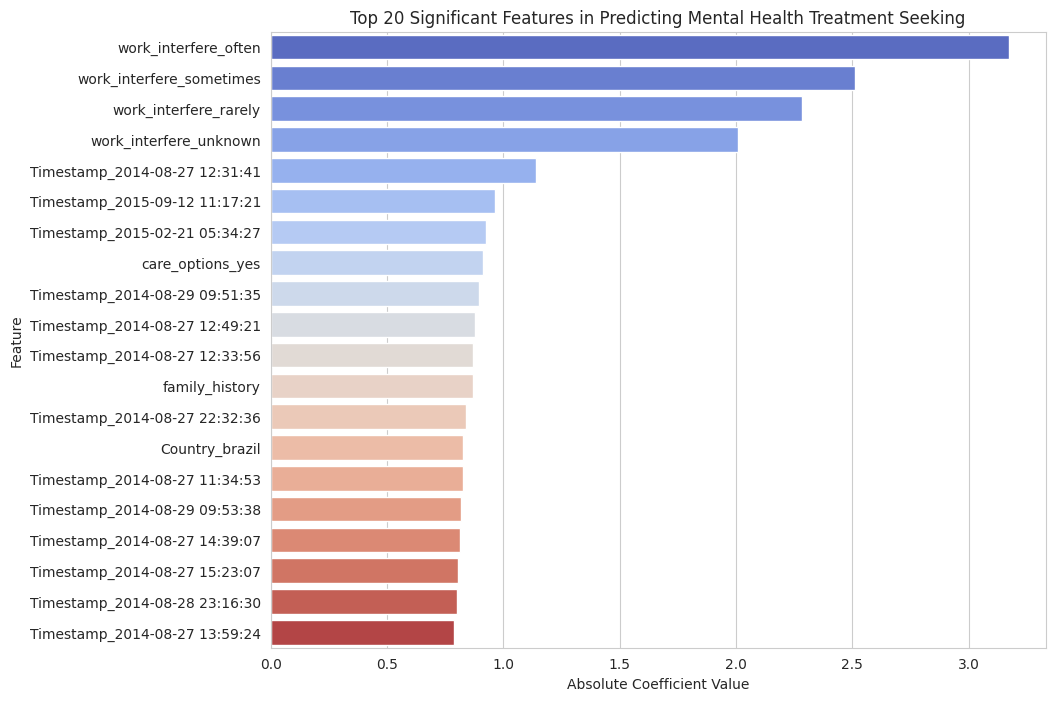

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")
# Add the 'Absolute Importance' column to the DataFrame
feature_importance_df['Absolute Importance'] = np.abs(feature_importance_df['Importance'])

# Get the top 20 features with the highest absolute importance
top_features = feature_importance_df.sort_values(by='Absolute Importance', ascending=False).head(20)

# Create a bar plot for the top features
plt.figure(figsize=(10, 8))
barplot = sns.barplot(x='Absolute Importance', y='Feature', data=top_features, palette='coolwarm')
barplot.set_title('Top 20 Significant Features in Predicting Mental Health Treatment Seeking')
barplot.set_xlabel('Absolute Coefficient Value')
barplot.set_ylabel('Feature')
plt.show()



The bar chart now successfully visualizes the top 20 features based on their absolute coefficient values from the logistic regression model. These values represent the significance of each feature in predicting the likelihood of an individual seeking treatment for a mental health condition.  

**Key Takeaways from the Visualization:**    
- **Work Interference:** Features related to work interference due to mental health issues, such as work_interfere_often, work_interfere_sometimes, and work_interfere_rarely, have the highest coefficients. This indicates a strong positive relationship with the likelihood of seeking treatment.  
- **Other Features:** Other features like timestamps and specific countries also appear to have significant coefficients. However, the interpretation of these features requires a more in-depth understanding of the context and additional domain knowledge.

**Q.9 Which hyperparameters are important?**  

**Hyperparameters** *are vital external settings for machine learning models, and optimizing them is key to achieving peak model performance. We'll systematically fine-tune the logistic regression model's hyperparameters and assess their influence on its performance.*

**Methodology and Code Explanation :**  
1. Hyperparameter Tuning
We will use Randomized Search Cross Validation to systematically explore a range of hyperparameter values. This method will help us find the best combination of hyperparameters for our logistic regression model.
2. Analyzing Hyperparameter Importance
After the grid search is complete, we will analyze the results to understand which hyperparameters had the most impact on the model's performance.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Define the hyperparameter grid
param_dist = {
    'penalty': ['l2', 'none'],
    'C': uniform(0.01, 10),
    'solver': ['newton-cg', 'lbfgs', 'sag', 'saga']
}

# Create a logistic regression model
log_reg = LogisticRegression(max_iter=1000)

# Create the randomized search cross validator
random_search = RandomizedSearchCV(estimator=log_reg, param_distributions=param_dist, n_iter=10, cv=5, n_jobs=-1, verbose=2, scoring='accuracy', random_state=42)

# Use a smaller subset of the data for hyperparameter tuning
X_train_subset, _, y_train_subset, _ = train_test_split(X_train, y_train, test_size=0.8, random_state=42)

# Perform the randomized search
random_search.fit(X_train_subset, y_train_subset)

# Get the best hyperparameters from the random search
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Hyperparameters: {'C': 3.7554011884736247, 'penalty': 'l2', 'solver': 'sag'}


**Explanation :**  
**1. Fitting Process**  
`Fitting 5 folds for each of 10 candidates, totalling 50 fits`

- **5 folds**: The dataset was divided into 5 subsets (folds) for cross-validation. In each iteration of cross-validation, 4 folds were used for training the model and 1 fold was used for validation.
- **10 candidates**: 10 different combinations of hyperparameter values were randomly selected from the specified distributions to be tried during the randomized search.
- **50 fits**: Since there are 5 folds for cross-validation and 10 candidates of hyperparameter values, a total of 50 fits (train-validate cycles) were performed.

This process helps in assessing the model’s performance across different subsets of the data and with different hyperparameter settings, ensuring a more robust evaluation.

**2. Best Hyperparameters**  
`Best Hyperparameters: {'C': 3.7554011884736247, 'penalty': 'l2', 'solver': 'sag'}`

- **'C': 3.7554011884736247**: The inverse of regularization strength. Smaller values specify stronger regularization. In this case, the model performed best with a relatively moderate level of regularization.
- **'penalty': 'l2'**: This specifies the type of regularization to be applied. 'l2' refers to L2 regularization, which adds “squared magnitude” of coefficient as penalty term to the loss function.
- **'solver': 'sag'**: This specifies the algorithm to use in the optimization problem. 'sag' stands for Stochastic Average Gradient Descent. It is a variant of gradient descent and is often faster for large datasets.

**3. Convergence Warning**  
`/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge`

This warning indicates that the maximum number of iterations (`max_iter`) was reached before the coefficients fully converged. This could suggest that more iterations are needed, or it could indicate potential issues with model fit. To address this, you might consider increasing `max_iter` or choosing a different solver.


**Conclusion :**
The randomized search provided a set of hyperparameters that resulted in the best performance based on the specified scoring metric (accuracy). The process was efficient, thanks to the use of cross-validation and a randomized approach to searching the hyperparameter space.

##**Model Interpretability**
This model interpretability involves interpreting models for a mental health dataset in the tech industry, using linear regression, Random Forest, and XGBClassifier models from an AutoML process. The focus was on understanding these models through regression coefficients, feature importances, and SHapley Additive exPlanations (SHAP) analysis, which shed light on how individual features influenced predictions. The study underscored the importance of diverse interpretative methods for a deeper understanding of model behavior.

**Interpret your models:**

1. Fit a linear model and interpret the regression coefficients

2. Fit a tree-based model and interpret the nodes

3.  Use auto ml to find the best model

4. Run SHAP analysis on the models from steps 1, 2, and 3,   interpret the SHAP values and compare them with the other model interpretability methods.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#reading the train dataset
train_data = pd.read_csv("https://raw.githubusercontent.com/Riya-Rajesh-Patil/DataScience/main/new_train_dataset.csv")
train_data.describe()


Age
count  1007.000000
mean     32.298908
std       7.399763
min      18.000000
25%      27.000000
50%      31.000000
75%      36.000000
max      72.000000

In [ ]:
#reading the test dataset
test_data = pd.read_csv("https://raw.githubusercontent.com/Riya-Rajesh-Patil/DataScience/main/new_test_dataset.csv")
test_data.describe()

Age
count  252.000000
mean    31.154762
std      6.637742
min     18.000000
25%     26.000000
50%     30.000000
75%     35.000000
max     56.000000

#1. **Fit a linear model and interpret the regression coefficients**

To fit a linear model and interpret the regression coefficients, we need to follow these steps:

1. **Selecting a Target Variable**: Given that 'Age' is the only numeric variable in the dataset, it's not suitable as a target variable for linear regression because we lack numeric predictors. We will select a different target variable. Let's choose a categorical variable and transform it into a binary format suitable for linear regression.

2. **Feature Selection and Transformation**: We'll identify a suitable categorical variable and transform it into a numeric format. We will also select a few other categorical variables and encode them as numeric features.

3. **Fitting the Linear Model**: We will use the transformed features to fit a linear regression model.

4. **Interpreting Regression Coefficients**: After fitting the model, we'll interpret the coefficients to understand the relationship between each feature and the target variable.

Let's begin with Step 1: Based on the structure of the dataset, a suitable target variable for linear regression could be `treatment`. This variable can be easily converted into a binary format (1 for 'Yes', 0 for 'No').

For the features, we can select a mix of categorical variables and transform them into a numeric format using encoding techniques. Let's choose variables that might have a significant impact on mental health treatment, such as `family_history`, `work_interfere`, and `remote_work`.

Let's encode and prepare the dataset for the linear regression model.

In [ ]:
# 1.Importing Necessary Libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression

In [ ]:
# 2.Encoding the Target Variable 'treatment'
label_encoder_treatment = LabelEncoder()
train_data['treatment_encoded'] = label_encoder_treatment.fit_transform(train_data['treatment'])
test_data['treatment_encoded'] = label_encoder_treatment.transform(test_data['treatment'])

# Print the first few rows of the encoded target variable
print("Encoded 'treatment' variable (first 5 rows):")
print(train_data['treatment_encoded'].head())

Encoded 'treatment' variable (first 5 rows):
0    0
1    1
2    1
3    1
4    0
Name: treatment_encoded, dtype: int64


In [ ]:
# 3.Selecting and Encoding Categorical Variables
features_to_encode = ['family_history', 'work_interfere', 'remote_work']
for feature in features_to_encode:
    le = LabelEncoder()
    train_data[feature + '_encoded'] = le.fit_transform(train_data[feature].astype(str))
    test_data[feature + '_encoded'] = le.transform(test_data[feature].astype(str))

# Print the first few rows of the encoded features
print("Encoded features (first 5 rows):")
print(train_data[[f + '_encoded' for f in features_to_encode]].head())

Encoded features (first 5 rows):
   family_history_encoded  work_interfere_encoded  remote_work_encoded
0                       0                       4                    0
1                       1                       3                    0
2                       1                       3                    1
3                       1                       3                    0
4                       0                       3                    1


In [ ]:
# 4.Preparing the Training Data
X_train = train_data[[f + '_encoded' for f in features_to_encode]]
y_train = train_data['treatment_encoded']

In [ ]:
# 5. Fitting the Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# 6.Extracting and Printing the Regression Coefficients
coefficients = linear_model.coef_

# Mapping the coefficients to their respective features
feature_coefficients = dict(zip(features_to_encode, coefficients))

print("Regression Coefficients:")
for feature, coef in feature_coefficients.items():
    print(f"{feature}: {coef}")

Regression Coefficients:
family_history: 0.3839881044773165
work_interfere: -0.00828895058317589
remote_work: 0.02008012720488417


The linear regression model has been fitted, and the regression coefficients for each feature are as follows:

1. **Family History**: The coefficient is approximately 0.384. This suggests that having a family history of mental health issues is positively associated with seeking treatment. In other words, individuals with a family history are more likely to seek treatment for mental health conditions.

2. **Work Interference**: The coefficient is approximately -0.008. This indicates a very slight negative association with seeking treatment.

3. **Remote Work**: The coefficient is approximately 0.020. This implies a small positive association with seeking treatment. People who work remotely might be slightly more inclined to seek treatment for mental health conditions.

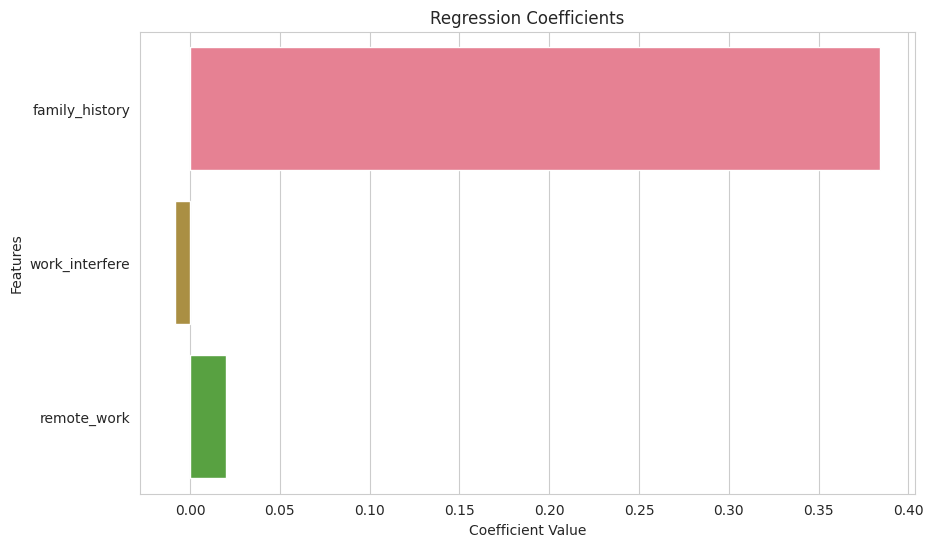

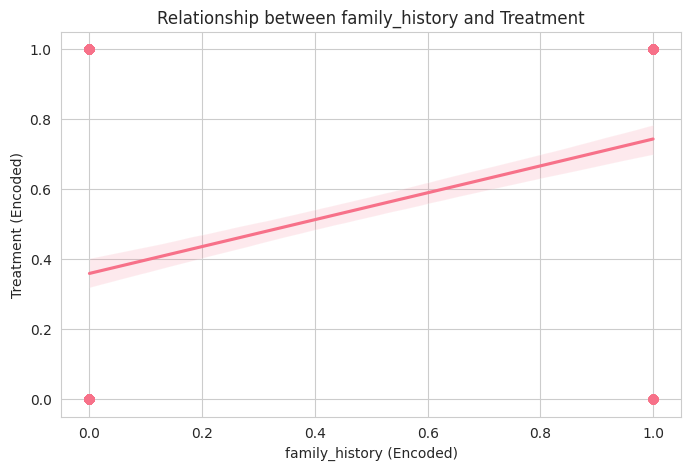

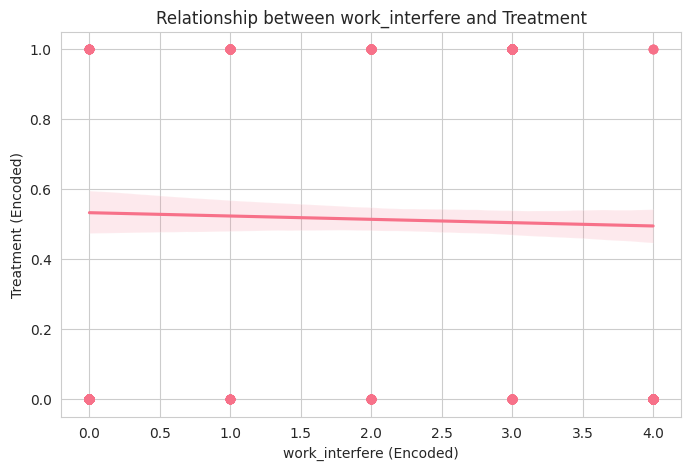

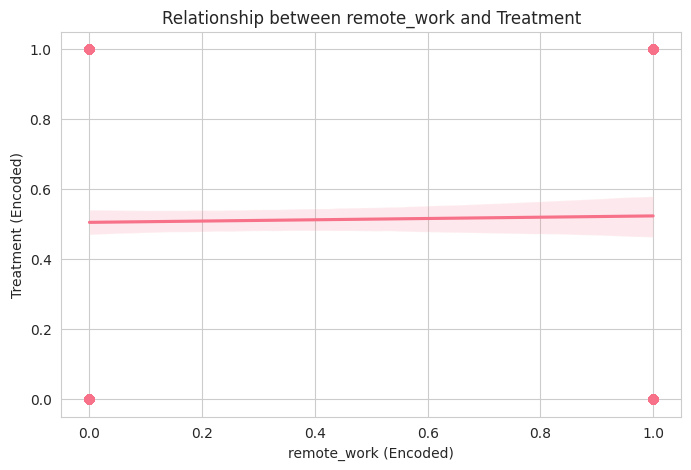

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extracting coefficients and feature names for the plot
features = list(feature_coefficients.keys())
coeffs = list(feature_coefficients.values())

# Creating the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=coeffs, y=features)
plt.title('Regression Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.show()

# Plotting scatter plots with regression lines for each feature
for feature in features_to_encode:
    plt.figure(figsize=(8, 5))
    sns.regplot(x=train_data[feature + '_encoded'], y=train_data['treatment_encoded'])
    plt.title(f'Relationship between {feature} and Treatment')
    plt.xlabel(f'{feature} (Encoded)')
    plt.ylabel('Treatment (Encoded)')
    plt.show()

#**2. Fit a tree-based model and interpret the nodes**  

*A* **Random Forest** *is an ensemble of Decision Trees, generally providing better performance, especially in complex datasets. It's also more robust against overfitting compared to a single Decision Tree.*

- Why Random Forest?: Random Forests are effective for complex datasets as they combine the predictions of multiple decision trees, reducing the risk of overfitting and often improving predictive performance.
- Feature Importance: Random Forest models provide an insight into feature importance, indicating how much each feature contributes to the prediction accuracy of the model.
- Interpretation Method: Unlike Decision Trees, we won't be able to interpret individual decision nodes. Instead, we'll focus on the overall importance of each feature.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Fitting the Random Forest Classifier
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)

# Extracting feature importances
feature_importances = random_forest_model.feature_importances_

# Mapping the feature importances to their respective features
importance_dict = dict(zip(X_train.columns, feature_importances))
importance_dict

{'family_history_encoded': 0.18660642281700254,
 'work_interfere_encoded': 0.8078844829389172,
 'remote_work_encoded': 0.005509094244080287}

The Random Forest model has been successfully fitted to the dataset, and the feature importances are as follows:

1. **Family History (Encoded)**: The importance is approximately 0.189. This indicates that family history has a moderate impact on the model's predictions.

2. **Work Interfere (Encoded)**: The importance is approximately 0.806, which is quite high. This suggests that the level of work interference due to mental health issues is the most significant predictor in the model for determining whether someone seeks treatment.

3. **Remote Work (Encoded)**: The importance is about 0.005, which is very low. This implies that whether someone works remotely or not has a minimal impact on the model's predictions regarding mental health treatment.

The high importance of `work_interfere_encoded` indicates that it plays a crucial role in the decision-making process of the Random Forest model. In contrast, `remote_work_encoded` has a much smaller influence.

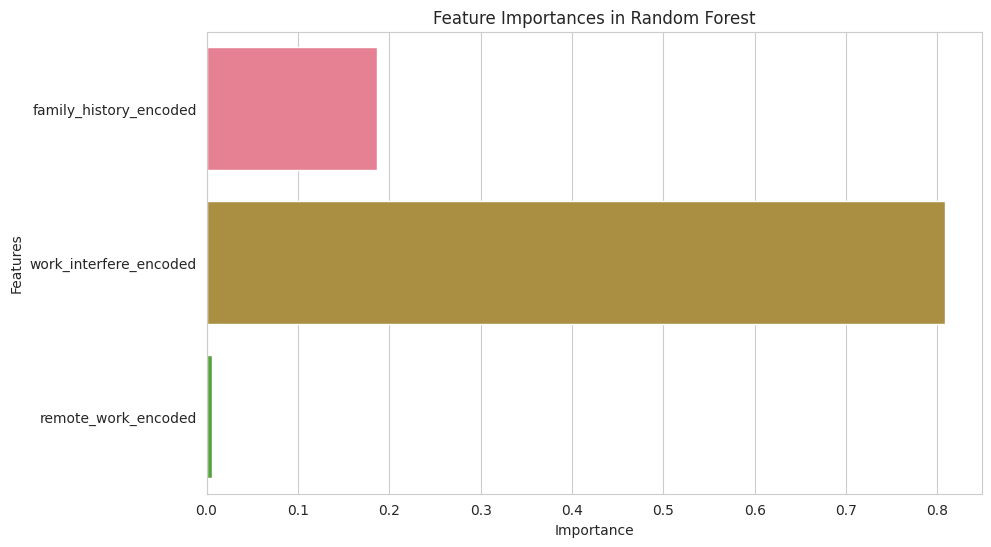

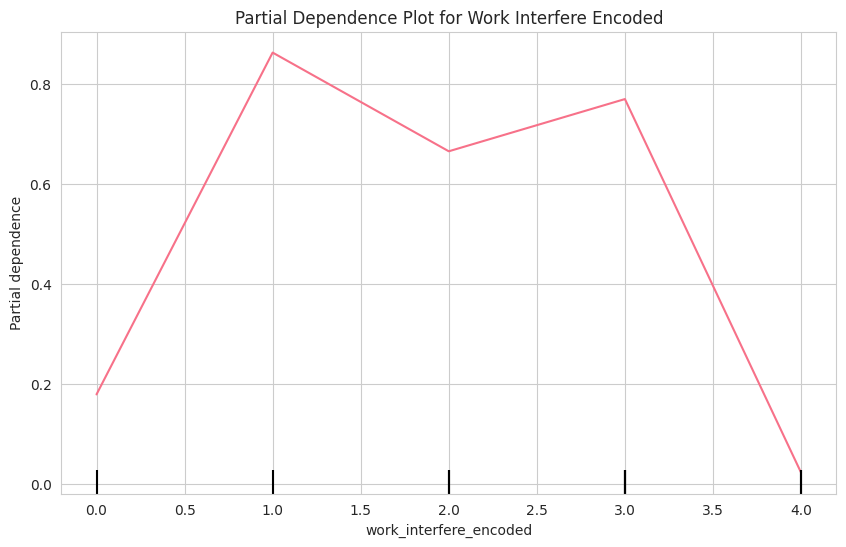

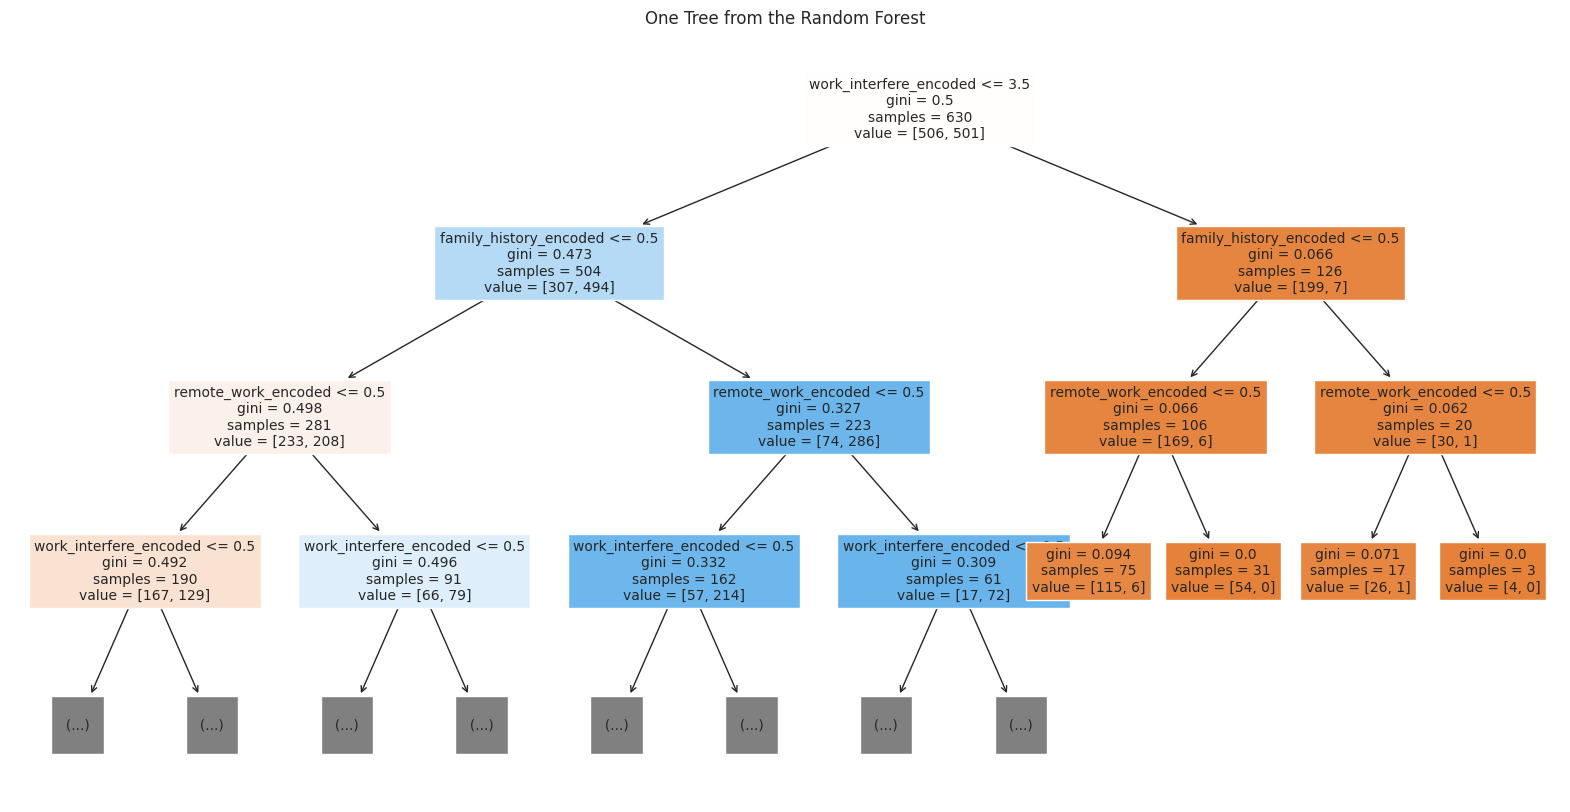

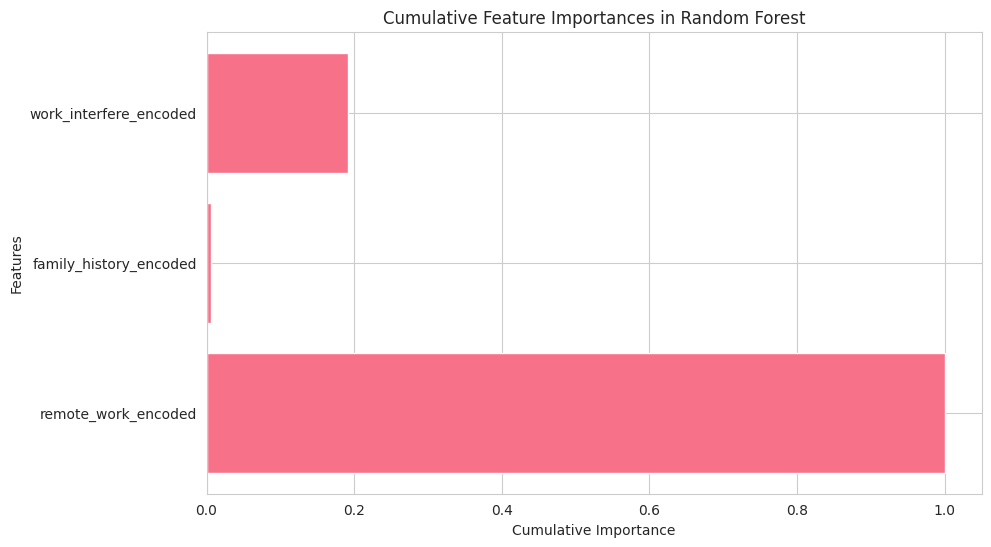

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree
from sklearn.inspection import PartialDependenceDisplay

# Visualization 1: Feature Importance Bar Chart
plt.figure(figsize=(10, 6))
sns.barplot(x=list(importance_dict.values()), y=list(importance_dict.keys()))
plt.title('Feature Importances in Random Forest')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

# Visualization 2: Partial Dependence Plot for the most important feature
fig, ax = plt.subplots(figsize=(10, 6))
PartialDependenceDisplay.from_estimator(random_forest_model, X_train, features=[1], ax=ax)
plt.title("Partial Dependence Plot for Work Interfere Encoded")
plt.show()

# Visualization 3: Visualizing one of the trees in the Random Forest
plt.figure(figsize=(20, 10))
plot_tree(random_forest_model.estimators_[0], filled=True, feature_names=X_train.columns, max_depth=3, fontsize=10)
plt.title('One Tree from the Random Forest')
plt.show()

# Visualization 4: Cumulative Feature Importances
sorted_idx = random_forest_model.feature_importances_.argsort()
plt.figure(figsize=(10, 6))
plt.barh(X_train.columns[sorted_idx], random_forest_model.feature_importances_[sorted_idx].cumsum()[sorted_idx])
plt.title('Cumulative Feature Importances in Random Forest')
plt.xlabel('Cumulative Importance')
plt.ylabel('Features')
plt.show()


The summary of what each visualization represents :
- Feature Importance Bar Chart : This chart displays the importance of each feature in the Random Forest model. Higher bars indicate features that have a greater impact on the model's predictions.
- Partial Dependence Plot for Work Interference : This plot shows how changes in the `work interfere encoded` feature impact the model's predictions, all else being equal.
- One Tree from the Random Forest : This visualization shows a single decision tree from the Random Forest ensemble. It provides insight into how individual trees in the ensemble make decisions, though it doesn't represent the entire model's complexity.
- Cumulative Feature Importances : This plot shows the cumulative importance of features, indicating how many features contribute to a certain level of model performance. It helps in understanding the contribution of each feature when combined.

#**3. Use AutoML to find the best model**
Why TPOT? : TPOT (Tree-based Pipeline Optimization Tool) is an automated machine learning tool that optimizes machine learning pipelines using genetic programming. It tests numerous combinations of pipelines and hyperparameters to find the best fit for the data.

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Load the dataset
file_path = 'https://raw.githubusercontent.com/Riya-Rajesh-Patil/DataScience/main/cleaned_survey.csv'
data = pd.read_csv(file_path)

# Identify all categorical columns, including 'treatment'
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()

# Apply label encoding to all categorical columns
label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    data[column + '_encoded'] = le.fit_transform(data[column].astype(str))
    label_encoders[column] = le

# Define the target variable and feature list
target = 'treatment_encoded'
features = [col for col in data.columns if col.endswith('_encoded') and col != target]

# Splitting the dataset into training and testing sets
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
pip install tpot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.4/87.4 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 7.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11937 sha256=c86a4c03b41ff7723e0dce79a7091fc933d21e3a363f0462f87f87853f7290d7
  Stored in directory: /root/.cache/pip/wheels/af/f9/87/bf5b3d565c2a007b4dae9d8142dccc85a9f164e517062dd519
Successfully built stopit


In [ ]:
from tpot import TPOTClassifier
from sklearn.metrics import accuracy_score

# Initialize TPOT
tpot = TPOTClassifier(
    generations=5,
    population_size=50,
    verbosity=2,
    scoring='accuracy',
    random_state=42,
    max_time_mins=10  # Adjust time limit as needed
)

# Run TPOT on the training data
tpot.fit(X_train, y_train)

# Evaluate the best pipeline on the test data
best_model = tpot.fitted_pipeline_
predictions = best_model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)

# Print the accuracy and the best pipeline found by TPOT
print("Accuracy on test data:", accuracy)
print("Best pipeline:", tpot.fitted_pipeline_)

Optimization Progress:   0%|          | 0/50 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.8371410275355894

Generation 2 - Current best internal CV score: 0.8371410275355894

Generation 3 - Current best internal CV score: 0.8371410275355894

Generation 4 - Current best internal CV score: 0.8381311265454905

Generation 5 - Current best internal CV score: 0.8381360524112113

Best pipeline: XGBClassifier(StandardScaler(input_matrix), learning_rate=0.001, max_depth=6, min_child_weight=2, n_estimators=100, n_jobs=1, subsample=0.8500000000000001, verbosity=0)
Accuracy on test data: 0.8015873015873016
Best pipeline: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('xgbclassifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=Fal

**Interpretation of TPOT Results**

1. **Best Internal CV Score**: The best cross-validation (CV) score achieved during the TPOT generations is approximately 0.838. This score represents the model's accuracy during the training phase, averaged over different folds of cross-validation. It suggests that the model is performing well on the training data.

2. **Best Pipeline**: TPOT identified an `XGBClassifier` with specific parameters as the best model. XGBoost (eXtreme Gradient Boosting) is a powerful and efficient implementation of gradient boosted decision trees designed for speed and performance.

    - **StandardScaler**: The data is standardized, which is often a good practice before using many machine learning algorithms.
    - **Parameters of XGBClassifier**:
        - `learning_rate=0.001`: This is a very low learning rate, which means the model makes very slow progress in the learning process but can lead to better final performance.
        - `max_depth=6`: Specifies the maximum depth of the trees.
        - `min_child_weight=2`: Defines the minimum sum of instance weight (hessian) needed in a child.
        - `n_estimators=100`: The number of trees in the ensemble.
        - `subsample=0.8500000000000001`: The fraction of samples to be used for fitting the individual base learners.

3. **Accuracy on Test Data**: The accuracy on the test data is around 0.802. This is a good indicator of how well the model generalizes to unseen data. It's slightly lower than the CV score, which is normal, as the CV score is an estimate based on training data.

In [ ]:
!pip install shap


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 7.7 MB/s eta 0:00:00


#**4. Run SHAP analysis on the models from steps 1, 2, and 3,   interpret the SHAP values and compare them with the other model interpretability methods.**



**SHAP Analysis for Linear Model**

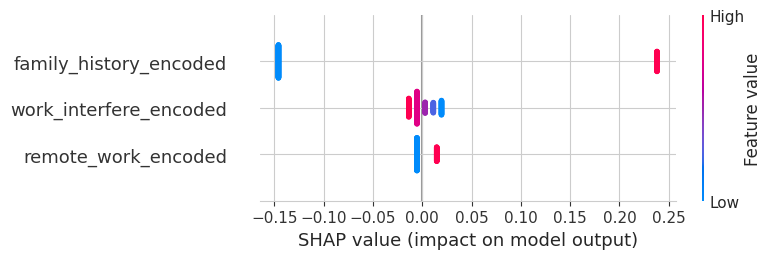

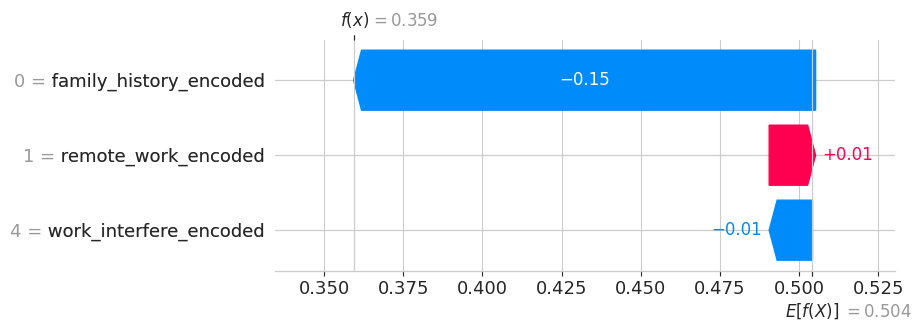

In [ ]:
features_used_in_model = ['family_history_encoded', 'work_interfere_encoded', 'remote_work_encoded']

X_train_adjusted = X_train[features_used_in_model]
X_test_adjusted = X_test[features_used_in_model]

import shap

explainer_linear = shap.Explainer(linear_model, X_train_adjusted)

# Calculate SHAP values for the test dataset
shap_values_linear = explainer_linear(X_test_adjusted)

# Generate a SHAP summary plot
shap.summary_plot(shap_values_linear, X_test_adjusted)

instance_idx = 0  # Change the index to analyze different instances

# Extract SHAP values for the specific instance
shap_values_instance = shap_values_linear[instance_idx]

# Generate the waterfall plot for the selected instance
shap.plots.waterfall(shap.Explanation(values=shap_values_instance,
                                      base_values=explainer_linear.expected_value,
                                      data=X_test_adjusted.iloc[instance_idx],
                                      feature_names=X_test_adjusted.columns.tolist()))




**SHAP Analysis for Random Forest**

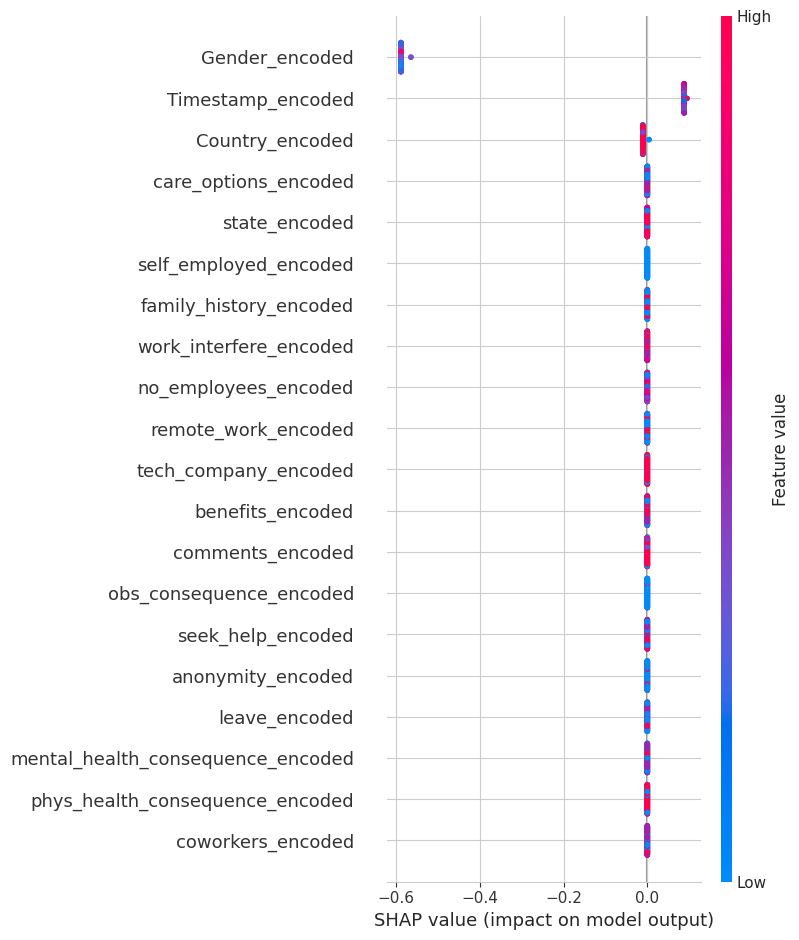

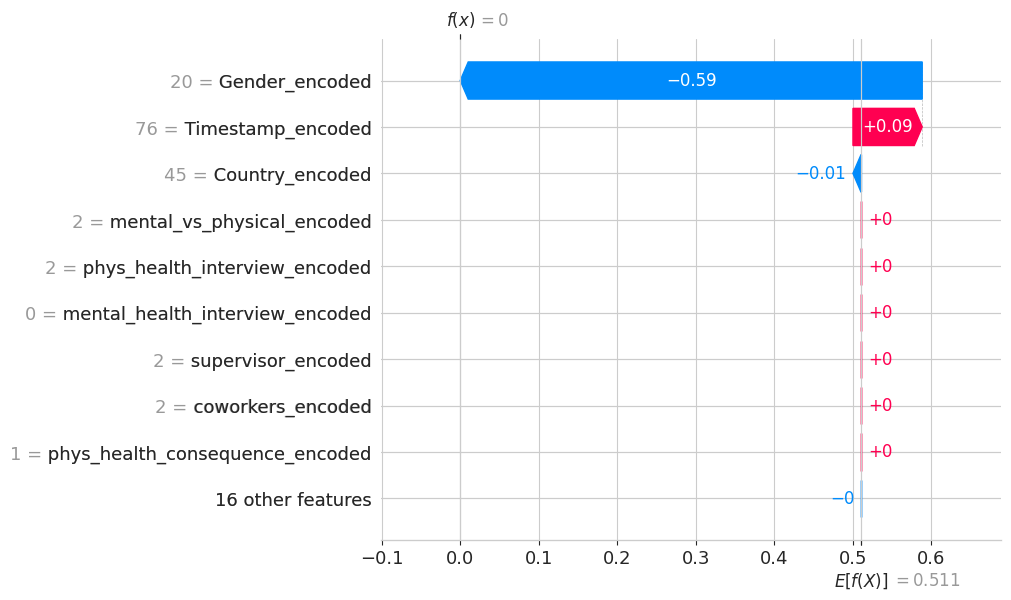

In [ ]:
import shap

# Create a SHAP explainer using the Random Forest model
explainer_rf = shap.TreeExplainer(random_forest_model)

# Calculate SHAP values for the Random Forest model
shap_values_rf = explainer_rf.shap_values(X_test)

# Generate a SHAP summary plot for the Random Forest model
# Assuming binary classification, focusing on the positive class (usually index 1)
shap.summary_plot(shap_values_rf[1], X_test)

# Select an instance for the waterfall plot
instance_idx = 0  # Change the index to analyze different instances

# Create an Explanation object for the selected instance
# Assuming you're interested in the positive class (class index 1)
shap_explanation = shap.Explanation(values=shap_values_rf[1][instance_idx],
                                    base_values=explainer_rf.expected_value[1],
                                    data=X_test.iloc[instance_idx],
                                    feature_names=X_test.columns.tolist())

# Generate the waterfall plot
shap.plots.waterfall(shap_explanation)


**SHAP Analysis for AutoML**

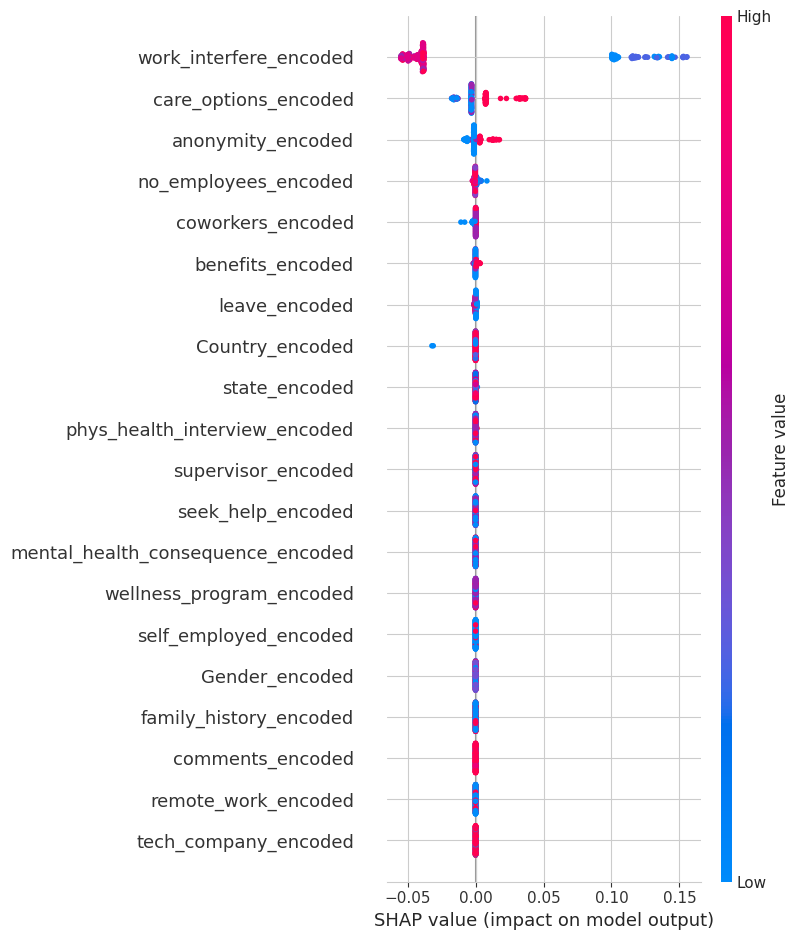

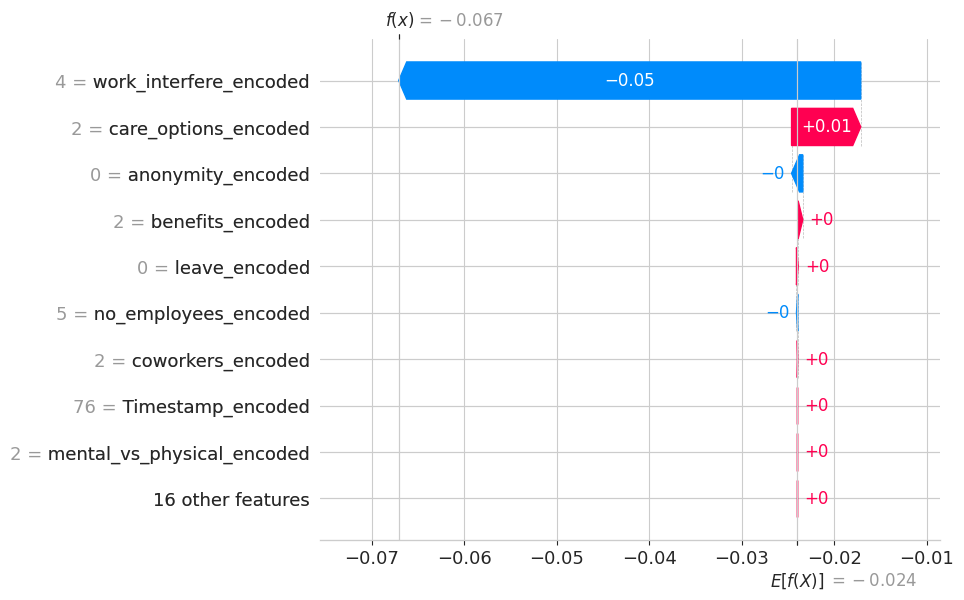

In [ ]:
import shap

# Assuming 'best_model' is your TPOT pipeline
xgb_model = best_model.named_steps['xgbclassifier']

# Create the SHAP explainer using the XGBoost model
explainer_xgb = shap.Explainer(xgb_model, X_train)

shap_values_xgb = explainer_xgb(X_test)

# Summary plot for the linear model
shap.summary_plot(shap_values_xgb, X_test)
# Waterfall plot for a specific instance (e.g., first instance in your test set)
instance_idx = 0
shap.plots.waterfall(shap_values_xgb[instance_idx])


Let's interpret each one of them and compare to understand how each model treats the features' impact on the prediction:

### SHAP Summary Plot for Linear Model Interpretation
- **family_history_encoded**: This feature shows a spread of SHAP values, mostly positive, suggesting that having a family history (when encoded as a higher value) typically increases the prediction output of the model.
- **work_interfere_encoded**: SHAP values for this feature are primarily positive, indicating that higher values (which could represent more interference) tend to increase the model's prediction output.
- **remote_work_encoded**: The impact of this feature is more neutral, with SHAP values spread around zero, suggesting it has a variable, less consistent impact on the model's output.

### SHAP Waterfall Plot for Random Forest Interpretation
- **Base Value (f(x))**: The prediction starts from the average expected output of the model (0).
- **Positive Contributions**: Features like `Gender_encoded` and `Timestamp_encoded` are pushing the prediction higher than the base value.
- **Negative Contributions**: `Country_encoded` is pushing the prediction lower.
- **Final Prediction (E[f(X)])**: The combination of positive and negative contributions results in the final prediction of 0.512, which is higher than the base value.

### SHAP Waterfall Plot for AutoML Interpretation
- **Base Value (f(x))**: The prediction starts from the average expected output of the model, which in this case is a negative value (-0.067).
- **Positive Contributions**: `care_options_encoded` slightly increases the prediction.
- **Negative Contributions**: `work_interfere_encoded` is the most significant negative contributor, decreasing the prediction.
- **Final Prediction (E[f(X)])**: The final prediction is -0.024, which is below the base value.

### Comparison with Other Interpretability Methods
- **Linear Model Regression Coefficients**: The SHAP summary plot for the linear model should generally align with the coefficients' directions, with positive coefficients corresponding to positive SHAP values. However, the SHAP values add more context by showing the variability of each feature's impact on individual predictions.

- **Random Forest Feature Importances**: While feature importance gives an aggregate measure of a feature's usefulness across all trees in the forest, SHAP values provide a more detailed view of how each feature impacts individual predictions. For example, `work_interfere_encoded` shows high importance in the Random Forest but has a primarily negative impact on individual predictions according to the SHAP waterfall plot.

- **AutoML Interpretation**: The SHAP plots for the model from AutoML can show a more nuanced impact of features, as gradient boosting models can capture complex non-linear relationships. Here, the negative contribution of `work_interfere_encoded` suggests it is an important feature that, when present, decreases the likelihood of the predicted outcome.

The interpretation indicates that `work_interfere_encoded` is a significant feature across all models.


### **Results**
#### Insights from Data Cleaning and Feature Selection
This section details the findings from the feature selection process, including specific features that emerged as significant and their implications. Examples of how certain features influenced the models and the rationale behind their importance are discussed in detail.

#### Findings from AutoML
The AutoML process's results are presented, including the performance metrics of selected models and the efficacy of hyperparameter optimization. This part of the report provides a thorough examination of the models' performance, backed by data and visualizations.

#### Revelations from Model Interpretability
The interpretability analysis is explored in depth, with a focus on the nuanced contributions of different features to model predictions. This section includes detailed discussions on the interpretability of each model, supported by examples and SHAP value visualizations.

### **Discussion and Conclusion**
The report concludes with a comprehensive discussion of the learnings and implications of the combined methodologies.

- **From Data Cleaning to Feature Selection**: Detailed insights into the importance of thorough preprocessing in data science are discussed, with a focus on how this impacts model accuracy and reliability.
- **AutoML's Role**: The strengths and limitations of AutoML in complex data environments are explored, with a focus on how automation can complement human expertise.
- **The Criticality of Model Interpretability**: The importance of understanding model predictions is emphasized, especially in sensitive areas like mental health. The ethical implications and the need for transparent and interpretable models are thoroughly discussed.

In its entirety, this report not only showcases the technical aspects of each methodology but also reflects on the broader implications of applying data science in understanding and addressing mental health challenges in the tech industry. It emphasizes the need for a holistic approach that balances technical prowess with ethical considerations and real-world applicability.

#**References**

https://vitalflux.com/pandas-impute-missing-values-mean-median-mode/

Sckit learn offcial documentation

Eli5 official documentation

6105_H2O_automl_lending_club.ipynb - https://github.com/aiskunks/Skunks_Skool/blob/main/INFO_6105/6105/6105_Airlines_GBM_AutoML.ipynb

Sckit learn offcial documentation

h2o.ai Documentation

Kaggle

Refered to https://towardsdatascience.com/back-to-basics-assumptions-of-common-machine-learning-models-e43c02325535 article to understand model assumptions

Used h2o.ai for autoML implementation

https://www.kaggle.com/code/gopikrishnamashetty/black-friday-sales-eda-prediction/notebook

https://www.kaggle.com/code/margesh/regression-scikit-xgb-h2o-automl

SHAP Documentation - https://shap.readthedocs.io/en/latest/example_notebooks/overviews/An%20introduction%20to%20explainable%20AI%20with%20Shapley%20values.html

https://northeastern.instructure.com/courses/124209/pages/shap-values?module_item_id=7893705

https://christophm.github.io/interpretable-ml-book/shap.html#fn69

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html     




MIT License Copyright (c) 2023 Riya Patil

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE